# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

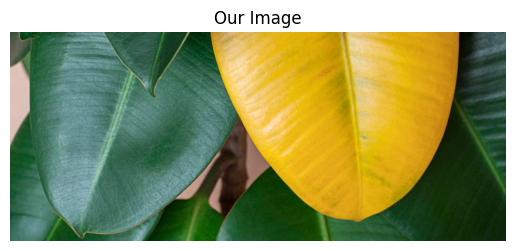

In [ ]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



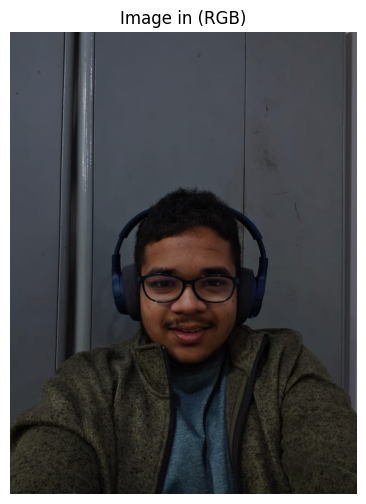

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
import base64

base64_image = f"""
/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAYGBgYHBgcICAcKCwoLCg8ODAwODxYQERAREBYiFRkVFRkVIh4kHhweJB42KiYmKjY+NDI0PkxERExfWl98fKcBBgYGBgcGBwgIBwoLCgsKDw4MDA4PFhAREBEQFiIVGRUVGRUiHiQeHB4kHjYqJiYqNj40MjQ+TERETF9aX3x8p//CABEIBQADwAMBIgACEQEDEQH/xAAuAAEBAQEBAQAAAAAAAAAAAAAAAQIDBAUBAQEBAQAAAAAAAAAAAAAAAAABAgP/2gAMAwEAAhADEAAAAvnDUBAUAChEsKlAXh34eiOfHtwPLLJfo+vy+q5uN4rn5/R5zqFCAoBZQCAAAAAoCUCAAAIAAAAACKIsGdZNAAASgBLAAoiiUEsAAAhKIKA9Xm5pfVvl1riLkAAFsoABJQEjh6fN6l5cO/A8ol+j6vN6bm43is+X0cJegAoAACggABQAACKJQCAEoiwAAAAAAAY3g0sAAAAAIoAAASiKIsAgBKJLDIX0defWuAuQAVZQEABQEsk8/r8nrXlw78Dy2WX6Pp83quWN4rnw9Hnl6CgAABQQWUiiUAAAABBQCAAAEsAAAAAHPpzOgIsAAAAAAEolAAABCAAIDAX09eXWuAuQAVZQEAABUo8/q8vqjlw7+c82s6l+h6vN6rmY6cqnm78JeiqiwAFAJQAAAAAAAAAAAhI0BLBYAAAAHPpg2BAAAAAAAAAAAILKIqICLDnZV9PXl1rgLkFsolAEABQBDh6/L6Y5efvwPNvG5foerzem5mLKx5/V5pegoCKJYKACUAAAAgAAAAACZ2AAICoAKgAc+mDYIsAAAAAAAAAAAgKCIBLDnYX1deXWuAuQKlUAEBQAElOPq8vpjjw78DzdOfWX3+nzeu5xz7cqzw7+deiVAAAUAAAAAAAIAAAABAUAACUAAIomN4NgSiKAIAAUgAAAAAABABLI5hfV159K4C5AUABCpVLABKjj6fN6Dj5/R5zz9efWX3+nzeq5zz6c6eb1+SXQsWCpQFAAAAAAAACAAAAAAAAAAAAJjpzNrAAAACLCgSiAAAAAAiwASyOYX1defSuCrmKAAAWVRKIADl25dY5efvwOHbj2l93r8nsucce2K58PT5pdCwBQBQAAAAAAAgAAAAKCAAAAAAEBnWDoCAAAAQKAQAAAAAASiWIubDmF9fTn0riLkAAAACoAAXn0xuOXn9HnOPfj3l9vs8fts58uvKyef0eeWixZQAFAAAAAAAAAACAAAAAAAAAAJjeDoBAAAAiwoEogACgCAACIKSw5WWX19OfSuIsBAAAFlIogAXG82Ofm9PmMd+PaX2e7w/Qs48e/nsvm78JaKUQFAAAAAAAAACLAAAAAAAAAASiLBnWTYEsAAAAAAEolAAgAAELKIDjZZfX059a4CwxtAAFhQQUgVKIljn5vT5Ynbl1X2fS+b9Kzj5+/Gzly681AoAAAAAAAACwACAAAAAAAAAAACUmdQ0CAAAAAAAAAAgAAAJQSw42WX19OfWuAsAAAAqUlCKIQM6jl5vT5odeXVfZ9P5v1LPJx68q86UBFAFAAAAFIsAALCAAAAAAAAAAAAIsEuTYEsBBc0qBZQAAAACLAAAABLI42VfZ059K86rAQFAAqUELASwM6jl5vT5ovTn0X2/T+Z9Kzyc+nI8u8bAsoAUAAABZRLAUSyCiAAAAAAAAAAAAAmdZNgSwSiJQBZQAAAABKIsAABADjZZfZ059K4C5AAAABQAEsM0jn5vR54deXQ9/0fnfQs8vLeDy9OXVZSgAAAAAFgqBYioCwAAAAAAAAAAAAAY3zOgEADnsKAAAAAAAABLAAIiyuNll9nTn0rgLkAAAAFAAZ1kCOXm9Pmi9OXU9/v8Hvs83LpzPJ149lCgAAAAAAAAgAWoIBFgBQAAAAAACUAmN4OksAAJZQAAAABKIsFgoEAABLDjZZfbvG64C5SgAAAFAAY3iKsOPn9Hnh14dz3+/we+zy8u3KvJ15dpYLEoBQAAAAAgACooWEpIAFAAAAAAAAAmOnM2sEsKlAAAAAAAEsAFlEogAEsjjZV9m86rgW5gFlAAAUABz6co653g4+b0+aM+nzek9/t8Xts8/Hvxrx9+PaWCwgoUAAIACggAAAUQQAFAAAAAAAELAY3g6QEBUKlAAAAAAEsAFlCCwAAjhZV9us6rgLkBYKAFAAAcuvGO+OnI4+b0+aM+ryew9/s8fss5ef0eevH349pYLJQACUKAAACAFlEoBJYAAUAAAAAAQoIsGN4NgmdCUBQAAAAABLABZRLAAADhZqX2azuvOLkACgBQAAHDvwj1ce3FOPl9Xllz7PH7D3+vyeuzjx78q8Xbj2lgslAAIC0AAIAAAqAEsAFAAAAEKlAAAEomN4NgAgAKAAAAACAAFIAABKOGs6l9m8brzi5AAAWCoWgAef0eePZw78Dh5vT5Yns8fsPf6vL6rOXPpyrydePaWCwFACQALQAkBQAQAAAAAAAFSiUAAAAJjeDYEAiKKoAAAAEAAABZRLAADhrOpfZrOq4C5AAAABQAL5/R549fHtwOPl9Xliezx+w9/r8nrs48+3KvD15dZULKhaAIACgkABQAQAAAAAAAFAlAAAgsBjWTYICCFxsWKoAAAAEsAAAAAAOGs6l9m8brzi5AABQQFAAvn78I9XHvwOHm9Pmie3xe09/s8Xts5ebpmvD249pYLAWgAACQAAgqFoQFAhQAAAACAqCpUBYsAJmjQIQubIms00gtiqAAACAAAAAAWI4azpfZrOq4CwAAEAAABXHtyj0cevI4eb0+aJ7fF7T3e7xe6zz+fvwrx9uPaWBAtqUAAACASBQFlAABCpQAABAAAAAAAyg2CAgjDWDoxo0lqgIFACKIsAAAAJZThrOpfZvGq4IsAqChAAAUBy68o78unI4eb0+aHt8XtPd7vD7q4+T0+WzzduHeWBAFltAAAEksAFAWCgASwoAAASBQAAAABDKU2QsCLBjciKLZaAAAqUAgAAAAJZThrOpfbrNrziwACpQlAAAHLryjrz6czh5vT5oe3xe093s8f0K8vl9Pls83fj2lgQBZaACIFABAAUBYKgLBZQlARABQAAAAIDFzo3LAACFIolAAABYKAQAAAAgOOs6l9tmq8wsAAAWUAAAcuvKOvLpzOHn9Hnh7fF7T3ery97MebvwPN34dlBAFKACIAAAAAFWEsUBZRAAIogUAAABAA56zo3LCkAAACUAAAAqUSwAWAACA46zqX22arzCwAAACgAAcuvKOnPpzOHDvwh7PJ7D29uPWznx7cK8/bj2gABS0SSywAAAAAAAWUAMaKkNIKzoiiBQJQgJQA56zqNyqAgAAAAAAAAAAFgsACA46zqX26za84sAAAAAoAhy68jpz6czz8uvKL7PJ6z2deXSzHDryrz9uPaAAFgsAAAAAAABZRJg6c+HJeuefOPZvxbr154ZPR38ej0vJk918mj0s6AIAAI57xsooAAAQqCsjQAAAAAABIoqA46zqX22WvOlsAAJQAIFARy68l6cuvI4c+nOL6/L6z1dOe7OfPpzrzd+HeAAAAAAAAAABC54+dd8pmEFi0zVCglCC3I7+vwdrPXePUAACOW8bNCgAEACUAKlJZQAAAABLIoM2U46zpfbZa86LKgoAAAAAhz6czfPpzPPjeYvr8nrPVvGrMc+nOvN34d5QoAAIBAAAACQcXjVCWwElFQaghBYNIFyNb5j09vD2T2a83atlII5bxs0AKAgAABSUIzooAAAAEsAJZTjrOpfbZa8yywAUEKlAgABz6czfLryOEslvq8vqPVvGrnGN4ry9+HeUSrAWJKgoAABSM+auvn5JbjWZQIolQ0Qlgi0yokotzQsFzTffzD6W/m97PWxs4dOfSXUpApLAlAAKlEoxrNNAAAAEBQDNlOOs7l9llrzxbIBYLAWUACAHLryOnLpyOAlvr8vqPVc6ucY3g8vbh3UEAAAWUBRxTr5ePOt4yl3LJazQQayGpSZ3DOg0lJncM2AtJNwksCUtzTp38l1PZ18PrjqABKMgqUAWCwEuTaUAAlBKICwJc6OO8bl9llrzCwAUiiApIoAJjeDXLryOCWNery+tfRrNuc894ry9+HaKAABZQAeOteaYLl1zcaFAlgASwllLYLNDK6MNQk1k1INXFNY1CAazRn1cTO+OrPf2+d67OyWVLAAAAABKCUoAAAEADOs6OO8bl9es2vOLAAgAACoLAY1zN8+nI4WWNevyes9FlrHPpzs83bj2lBKlAFgp56x5rzB9PN4eX0ec1LFudQhRNCFJqQSgWBpcull4zvDjOuLMiypRLADt6fL6DzcfdwOXTjvU9/X5/uTUslAAAACAAqoKAACLADOs6OO8bl9iWvOEAAAAAAAmdYNcunM4WI36/H7D0WWznjeDzdeXVaEEKCpTHh6cKmXsze3a+ezy85ZqlIlBQgqIRpZb0l576bmuOullxaDSXljvLPLj08tY5LLkSqlNe3w+8x259T53L6vy0328+9T6Lh3lAAAAAAAAWUAASwAzrNOW8bl9dlrzhAAAAAAEsJLBz3zOKJde3xexPTc2zGN4PL25dVBAAHPpzrx873l5fU5dR5fV5jxllgBqMkLrXrm/Fr6PTN+dr6JfDr2ReLvDzzul896ZMOkM53Dny74ufNj1ctZ4zUuIqn0Pne8115dUvk9UPk7Zrt7vne+zVJQAAABCgAWUAASwSjNlOW8bl9dlrzhAAACCoLAEICc+nM4CXXt8PtT0WWuedYTzduPZQQAB5PT4ax9Px+2W2Eeb0eReEqWL1lxrt1zvy9vXc6z2xua1YSpLEzpWWQBmwZsiS5rM1LMtE4Y9HO5803jWJ7fF6K9Hbh3Qing9/GPD9D53qr1gEKgoABIooBZQQoIADNlOW8bl9dlrzwRYKgAAAAQM2Uzy68jkJb7fF7k72WzlnWDz9uPVaRKlAOHk78K9vaWFlJ8/6Hz1wqXfs8vsxvW4x01clusU6ITUgkqpjYyUxNwxN4iRKrKzUDOOnO58+d41ibxuz0+jz+hAoI+XvfKvpueywFlAAEqJQCgFAQAAzZTlvG5fXZa8wQAAABLCoAMazozz6czhYl17vD7k72WuWNZTz9eXVQQlKnkrOcZl+prn0QDPg9/gXOpc3r6vN3x063Os7amhWiaUQpFJNQzN5MtwxN4jOdys56ZTDUqc+mE4Y6c9886z0s9Pfh3QKlI83l9nir29vP6AACgAAlAACkAAAM2U5bxuX12WvMEAAEKgqUgAOfTl1McuvI4kl37vB7072WzljeDz9OfRQFlR4/Z4q5Z1mX6XTn0ATPg+h89ZrOs66d+Hoxvpqazu6aJaGoCWiQuUCU0xRjcjC2sTQ5txOfPpmzhz7cdYx0561n2dvP6EAQPBz1muns8HuroWAgACKAAApUgAKCM2DnvG19dlrzBAAEsALAAA5dePc58unM4xJd+/we9O4rlnWU8/Tn0UEWC+P2eOuOdZl+j04jrnlDXm7cSb59s66dpvHTXXMzrrrz6s7vPo6zjDtniOrnV3MjTFNzmOk5ZTvPPLPTPNLPVPLTvzajlx74s82st493bydk6pQQ+dlae/wfQrQgCoioKgoAAAAoASIlOXTHRfVZa80EWCwAAAAEsOXfz+g5cuvI4wl37/B707iuWdYThvG1oQB4/Z5K5Y78l9GuHaAJz6czHp83qxrvqYz0358Z1jriLDlDo407dvP0mvTvz7zrq5pdMQ6c5zszy3jWJEubcq1rFjp6PJua9GSXySzeN3NOnTgs+hiZPDrO6v0PD7pAlAAAAoECgAACoIzZTn059F9VlryhAAAAAAIDl249jny68jhLJenv+f8AQTuLOWN4OG8bWpQgcuuLL5uuNzHXNxbElY3gz0cpfRyz6peOvSl4XtleOO0s457yzjevM1rz3N9F5amtTGTpnlbnrz1qzjrcC0cuujz30YJ18ozenOy1QK78+eE10XUvs8vqyCUAAAAoiwWCgAAgM2U59OXVfVc6ryhAAAAAAIDl15dTHLpyOMJenv8An/QTuLOXPpzOO+fRRCxRx78LJno3MNYzQzpjWSY1uN9JrOpznOtM+izzERrPRZvn0l1y75l8tnouOE7cq661M6xmrMTrzSanSstJXTGpdeb1eezXNLnVlUKc+uLNWrO/fl0zaiAqoKgogCwAAKgqADNlOfTn0X06zqvKEAAAAAQAOe8aM8uvKOAXf0Pn/QTuSzny6c149OfQQFUnLrys0zdSc94lsTOmbDHr8v0ca83t8H0pry8vbzPLO2bOU6w5uiXGumznj0eMx7t+8+T4vr/KTvNU53pVwZTSWiiVoeX08k546YubZaCrnU1LYT17zrNAACBC3NqgCAKgAAAyDHTn0X02WvMGQUQqCoLAASwxrOjPLrxjiF6fQ+f9BO0srlz6czj059CWDSBy6YTkxNNsajWdZlZ1mXP1flfWxvy+nfz1+pje868nP3SvDPoQ8O/Ujzu3Az459TWPXqazvy/P+hwPmezx9N8++m87xntTzPVTza7Di6crOG89rny8+nOy2WwLLDRZ0j1UgAQqAIWUqUEAKlAAAMgx05dV9NlryhlYAWFIolACAxZTPLryjiRev0PB707SyuXPpyOW8bCUoIDxzWbKzTpCaksjP1vk/VxvrnbHTwej18tY6PN5q+lnwK9vPx4jt59+6zj9DHTHTe5bPLy78pryeH6jWPnerHnufp9Plbj6l+ZV+jPnrPR5fR1OeOvDOvNz6ct89JbKixmqvp8vtjogoEogAhZaACAAAFgqDNlMdOXVfTZa8oZBQBCpSWCwAMwJx68o5Bev0Pn/AEE6y5s58uvJeWs6FlKgA8/D2+IIOlzREln1Pl/Szr1o59d756Lx6SvPz9HFOGOm69feSVecXvOWU68ZyXV4Wzt5esTydefS566mprNtiayLy3zs8vLpz3ztlsEsiC/Q8XvIBYLALABZQIAAAJQADNlOfXl2X0WWvKEAASiLAABLDIM8uvGOYXr9Dwe9OudZrny68jlrGigoBB5fTDxTvziazVEJ9D5/szr374defWpF1mZJy1yTWpurjPmTvPNqz1vKPRz55KkuemsdVlsl6dPN1l65kKziumGWfPz3jfOoq5uUqq9PolAAAAAFlAAgBKJYKADNlOfbj1X0azqvKEAIKlAEsAEsMgzx7cY5he3v8PvTpnWTly68q52aAKgsQlmihM8e0XxzpzlenzdZff04b59esyl1hgzmLO/Th0NYec3zY1m5sQsGsDteGl7TnI1cD0Oepq5ssSLPNE1zqdK569yzx+nqAAABIoAqoKgqCgCIBQlggMdeXVfRrG68gSoFgWCoAAEsJLDPDtxjAXv7/B706Zua58uvI56zoAARDVlEsIguaOfLv549u/P259t3Nzpz3k4Vx3jq4dLOueuJcOnQ43rqXm64Xlz6Szk3Gec3zs3rn0OmozuxEmNcrnmN5vu83RPTJQAAKiolAAAKAAAqAIAAgMdeXVe+sbryhAAAAAAEuSEM8e3CMhfR7vD7k6Y1muXLrxM6zoAEIlNWC5sIACebtxzd+nw+vO+vTlrO951mXz8vTy1jhrpbMTS1rnDtM4jri0ylsxjtDne1MNpdyyVzubm8d89ZLUmmTp6fJT2vHK9mfKj0zzQ9Tyk9Tzl73z6PTry6T0Oeq0AKAAssgADNlMdeXVe28bryhAAAABCoEsGdZjHHtxMhfR7vF7U3nWLOfHtxWWUhRLDNlNIEABm4icu/GXn1zk914dcdd3CVmxN9MdV5OnK3We3S3wT3K8N9cjzXpyTKaY1KlzZE1JCZ1y1nNluVlKuRq0qg1zM3lsXdMXVIozdQuuejpvl1QKCgAAgDNgz15dV7bxuvKEAgKBLAABLkudZMce3GM2VfR7fH7U1z6c6xw78BVMrADNAsgZjWRZZ0jjz2rGO/Avo8/WXsyzvVll1vmXeWSM5s9GvIuvTnhlOuMmd7xosSLAkYsmI1jSUtBLTc1k3vCLx9HlqGa67x0is9ImswLkWSuvTn1QKCgAAgDIM9eXRe28brzBCBZQBAAAY3g3jeDnx7cYllX0+3xe1Nc+nNOfHtwXVkNTmOjlmXrmQtg3loiwbxYxWTc55OzhD0TlodOOl7Xj1z0rW5eHP14s8c9azyX1Dz76yMtRcyxEmLLzTWZYs1rO4KJWjeenON2bOfDpzrCWu3XG4uiMZQ1NZFzqm+Wzu59LAAoAIEIDPTn1XrvG68oQBYKgAAAc+nI7c+nM58e3CFll9Xr8dT08uHM9XPkNwUtM5vMlzDtrjo6axsvPryO3HeIxnvk560E3CZ1gmO3Kr04ba9Xo8XoxvsyzpnUMqrMuUYuLllysZjWCqyDVmotU3si4dFy6edOeNY0m8dI7biOmbyMdOPStSoWQx159qtyjqxrUoAoIQIDPXl0XtvG68oQAAAAABy68jvx68jnx7Zlx3IrImOg5WDdmjaWM8O3KuepsjdJqdDXPtxMsdC757jGqOelJOvMxz78axN866dvLuX268u8dOziO85Q6c5izWJi5uS5WaqW5TKlazuNdOfSE1pa0L5O/nszm2sdufWOu+XaHn7+Q3uWmqi8OvA6dM6KsFg6XGtRULAAiCdeXVeu+fSvKEAAAAAAcuvOOvLpgxpmXRIuVBBz6Yqbzo2sjGO3KuXbl1OjVjOsStctcjHTj3LFjcajm3KbkHHcOeNY0ShrCOjmXo5k3M0FotRqBjfMVTPTnuXrZ2hrMjeba83PWNM1YvSaOm0jPm78a6blhq4Oec6rtrGoazRKJvNNs60BEsIDPbj2Xp059K8oQAAAAAIc+nM3xXNsaEUlQbxRNU5Z68664z0MZ65OPTA9PXyemOeOnIxz6c6z15bO/HtyN6xI6pYrWSZ1K8+N50yoAAFBUVozbSLKnPeI0ozublXci9OGzebyM8940nbn1i6x0OmdSOXPSuqWLy6eap1z1NXNi6lJLDNlHTlo6DUSwgM9uPVevTn0ryhAAKCAACGNSXDpiMzcLLomekMakNb49DM6czHTnqrL0jz478q115dS8enIxmhqU314+mPPNUm+XSLEEsrljpjTKkloi6MNiWgLKmS2aXim4t6CqzY0MLszyuamdSp6Mai3n0jed5OOpTrnWTHn31pqyGcc66zmN9ONO947jpLS6xqrCyBc9uPY6dOfSvKEAAAASyGbmVLkrKOmc0NQ3ZTLpzGsDeOvMxnSr15omO3mq9vL6x5+vIymhq0deVjrx7czNxTbEO2VOfHvxqUsKFmqgRc1bmCmi53xkx6vN7amdSWUzbmw1WTlNY0z25eqMN84tU3vKOG+XWjpxOfXPQ35GTO+m65a2iY65OGuisdco63jo6pdSAz249l6dOfSvKEAASwWURMhqXi7ZOZKSw3efSJ24064tMZsNa59CcfRyJZqr5+/mJ7fF7jjy3gh0Ma0Mpo105bjM78DIFuS8fT5q1NNZzUVYLELIir0szve7PPw6c8617fJ7NZ5WazrNzc25o3x7eYLnTXp8/eJlqGbDWoOO+XcmN4Ovm3knVsS5KFjRItOU2M56jHTCurnsnbj2rp059K8qVIsFgpBZRjcyzvNl1Go5c+quSqjA7TOo6XGyc94Jrna68+kjhqyry6cTp3xuM8t4pqdDLWCN5Mdc03uYi89aObQ6+P0eenTjdTti7s4OuYxN0xrdq6ztE6eQ5V1mr6Ofa542axrKWWbzsnm7cquNYr0azuJvGoidTGdQ4d+WznYqbtjHQDpglDO8aJdZWFJWShI3k114d6315ddPIJLACgFISyWyyN1Imdq48vVwMQq6xo6XCO/LQ4rK665dI557cTXn68q9XTmjlNKz0zsTWoxO/ExGa7dOWocumjjOo58vTwrAs115ddQVJVrO5RubTl5OnPO99Jqzfbn0ufPrOue41Jcdc05YNHPfM7+nx+rLNsFoWZOG2zz9uXYugihIGsYN656OuEWsjXPQJUsuTXTlo9PXl128gkACllhJZSyKg1rn0hm6OUSs43gymq3vnY3GjjOuCbzsuNDnx1K9MsjJTOqGufYzjpzOc3iulxs6prLXLryNeT0+Ws01Hbl21EsstlNFTZ55eFz1mt6W510ls82s9Oe5myXc1yOVNM5uierz9o6LIzqWJneK5aYNbxTczsTUFxRqUXJdMaSrkZtOd6YGd5J059D09ePbbyCQAQS2WWSKkKoaxDrJgsowuTFit75bjri0zM0wK1LTjOmDt0zYwsIsLrn1GPRzOXHsrPTPSJrI6Y6ZjPm7c65VrU1o1KLGpsLpL4fb8+W9sbXdzU6bizjrn057zKl3w7+WqSs7x2jO4O0zqLrnTfPpI4c+nLTvrCL1yDOiY6YFz1OU1pc7pMSwahazU1eehNZO/q+f6q4ixCXOoi7zzLrMNWbEQzeXYxqbM2YNSjnz7c6b59Y1ZDOd8yVamwzz6cj03nuLLgY1onXPQc95MY3mrvFhvNOnPpgvm9XlOfTG9ztjtjWcpR1xtNWUx4fZ5M67aaszrRN2Dzbx0xvG8dJc8d4pm5rW51jGdZO1z1iSDbOYzw7cNO3Xh0jSDWNQzcw2z0JKJqQ1vEOnOAlW1lN4mlaxU63NszM4l3ecOrjk7vPTtrjk9U4Du4U7dPP1JjtzGoObfIdeXY3jpg4zrxoU3KMY68y7xs1nWIu8aOt57Lnrg4zWabxuGpoiw6eL0+Uz05dtz15641jzZ78JddeXSutztOPj9Pnzrt05dtRemEssPN15b57nTnuXzpdJmw7defTLnnpkz24ekmN5Gswnn6863vOo1LCXIoNLC5aI3TGegw0IVUsRNZVNE3ymCYkrWVJd9jjeqOd65Oc6ji7U4a3gu+cPRfPo65tOXXFOuNw58+2DmmqWbJz64M7xsssJ0zqN2i5lJw65J0zDdlNY1kef0eWp34evWfVjTWeXH08DlvKX1a57s4+X2+Ka7d+Xe5mekGdZPN0xrG5Wc3mTTOsdC9+cjcSMd+HU6y4JLyNcO3Gum1i51CLCbz1Jz2JGjn0UhQCZ6Dju1YozWUxy1ioWr011yl3kuNUc95MNjFsLKMtw5Z64prOT05zY7M7icO3OubWRVMtYqbx0JNwzbTWrYznpzLjUJZqtOfSM6zs5cO3Gp7fH7956xLiZu18/L1cTPbz9V35fX5o334dbNXOyY3g4RnG+vLtwlkuaz0x1jprKLN4OVZr2+brI5rgnPpzruzuI2BCVDbFN42OWwy2CUzvIm8jeKMW5OOOmKdc+iNUiZ1mrZTJBQk1kTpgzGyLCc9U5akr0a4bjvlY5894qVqozTHTns0zRYOm8I78tQ5dLzGpotuDFz2PNzudN/Q8Pu1i1m5RldQMc+sM8uvml79eHaruxGOnE5Y3zzvtw78M1nWKvXluPRrG4nHtg5Z1K6bxqOWpCcuma6dJY0mTUwNg3ILrEN6zCZ6QxpscumDOpTUuSwOU0N98bM25iswrUM40rl01guuey89C4oY6ZMqpmjjreD0b83aGOuDCUJaxvGxLC6zTesaNzOoylNMU1npzMb56rzivT6+Ho3zZ1guLAzow1gx5vR58679OXazp0xu5vDrxXlz3jOuvHpzzpz6YrXSdI105I6SZOeOmKno83ojOeuDjKrpc6ialAJc7EUrWCy0xrI1c4OzMLcUTUNEOe7o3Ii3FJarCUzqCUMa0MyBrI1AxUrOguNQ59Mw9OZuOZCs057zaalFaJ05dItmDUuiXI1hkuO/nrnVs9nXn13hzuSLiNlM56ZPPw7cZvv159LntYuZz65Xz46Yzq41nOpjeK32xuNVYzvIxz3kz056rpmyOOenOum+XaKoxtC6wLeehZSaUzZTNsLLkWUluSxDtqWMzXNdWYrZEShnYluBYJWTWaJjWamoCBKGN4N9OXaM8+vImpqsazS2aC0alirkjHUm+dEsN+T0+WnXl6dT1azdc5m81XNla56NZQ83PrymvR15dtY3vNS8emF8yyazmzGpnWa7XO41vnqNcO2DE1Klzo6Majny68q7li650WUgJVLWTbOTUg0uS3OhLgtmiFOmQmtcjXLYZ2JnpzNXHQmdZCaMXMOuLTjbazOmSWBm6M50Md+PQ68enOJc6qZaLYOkmiyQ3nWYoOuc0Js4cunOnq83t1ntm51hJiXWVWaZLKPPy7cZrr6vL6rnbS5wZXzy2a4jNmdZXr0zrK6kXpm7k5ZuK50rp049I5Y6ZrpJYs1gtsEoazRZSKMXcGdQqZOjOTrATI7VmEkrRSc+kM2iA1m7OOrgtzRFMWhAkqrEiwrFmjpmo47zqs6yOrOhqUzcQ7MI1WjGkMb56rlmyt+3y+3WHPpizCWVYS5pcrTlw9HGXXfj0s9WbLGbk4TXOazNYzWdZXrvnqOrKHTOh5/Rg4LK3rGo1y65MalrUSFkLrGjUUhSSgsGpQzk6Z1SLzNZlO2sczqlMzpDLWTNoZbM53yNs6Mag1INSUkbObeazbkEM7xTszIyKlzs1FLnVMVsy6oyUmbTOOvCslr0+nl11zzGaw1iXUDUsJKM8u/Fbvlo9ssuZLzjnz6c5qY6YWZ1mXe+eo6W4jpcaN8enIwuatxs0ljFvOuojNmjO86JAu8aHPrgmrTNgTWS75w7TloZ6bMW6JcDUQXNDFLrODUlNSUzOmSFMNZqy0iZNSwjQ5rmt9eWozN4J059RNQpSJTQiyaMXeDXDv5qb5+jU9NmNY1yYl1rlsrOwBmjGd5lzpK9tluZjWY48+vJq8+nOMrJpvOotmjWd7hnSOGOuNM1g7Xn0jPPcrVliwCjM1mt6mozNZBC3FFZNY6YLQ1c02gzq4NS5DNJcyt42jOgjWDJa1KjDXOtkJNDOoFkJneDW8dCY3gnXl0KUi4N3I0YNaSKx0M8OnOnp83s1m89crJlZdazo0mrJNQvPQk1mM2W309OXRlmw5cu/BZnWZcyyaojprGo3rGxZIzz3jTE1mtdOdjeNSM9Oe63FiZoqaFzDUyK0M56ZCwqhYGN8zvrEN5zk3EBiumcaGiKCRKs1Bmw3AjfMgLJCoGNYN9eXUmOnIdOWy0KzSpRrFNMaHTKOObNNenh0uZz1gtC3NOllsFLzuRUjKat7duHoZyQ58enJWSXM1mVVV15dI1vG8rLkzjVrjNZq3OikCU1uIzQazDeNZIqrc6hILGi4sNS5rUQ/8QAAv/aAAwDAQACAAMAAAAhIFAU8BVJAyss309Q+88oA88c88AICCCC+6qCCCy2rIIEQAV8wwgU88+S8p8cV9NcQcBhHy0s3JSCE888A884AAAwgCCS2++uOOCCB0shM8N5AAAQx1/iS/4w998oB9gAX+Qkbpi88884EowgAAAAEgCCCCW+++CCSC0p9899oQgBBBffqrAI198oBdpAQGEEzlew084AgAAAAAAAAAAAyCWu+++uSCc988888AEBBNRzujoo98QgV9MAEmYEjpiAAwsAAgAUICCCCiCCCCC+O+O+6Ix188888N94ACADvDts99IMF88MYOoIb1MJBBAAAAAU88OCCCODCCCCiCCy+46QA884899tNBEEtH8099hV5008KOQ0L1u9tJAAAAAQ088OOGeuCCCCCCCC20+CCA1CQ89999A09fEkxxBVs4Q8I+Is/wCevfYQMABDPPPPvvrvvCgjjjggnrgugygXQBfffffQEL31EAQQdffTfaOqNAjZvaQUIAAJPPPPPPPvvqggoggggvgigsgdQUffcQfIAvPeFAAQffacfaJvAKHdvIQDAMNPPPPPPnvisogggjgktqgljgggQAUYQTfQBEaaGAASTbPefOPh9OGUPAAPPPPPPPNPPvvgggggtvvgiuyvvorgQQAgQfPPIIQaOAFOOPCIMLCu/MMDPYQNPPPONPPHvvvvnigglvvitr4ljiDaQQAQQdPPCAArAMEYHPCBHPCo0PppvQQANPPKFOFsvvvvsuggkskqgqglkQTaArLQQUNfaBKeKAQTXffPPAPi7R3zoAAAMPPLDLjtvvvqgnvgggggglgnvzTHqnYQQQQFbSpfKAQQfffPPHHtyww3gAAAFPPPKAvuPv7/AL774oIIIoJ1TD577z3kFHW0F32gXQAFEFX3zyhLr8/9VoFEAATzzz474zpP/wCyW++CCCCCh1VZ8+889BBV9pR9sWc059pBBQwgWKTjfJiBNUs8++86+++6f/8AoggvggghnqWWRWffLAAAVfaTXYQ/FPfbQQFLAAps2wwYgYVfvPPPPvqkg7//AIoJJIY4YLa2nGXlEHIIEFX2lXygDhD330EAAABJdeNsG4GFH/zzz577479/74IIIZoIIJJ2kElWEkoMEH33n30hCiJX3320wABIK8P9VIEAD/PTz857/wD7z/8AwwwkoggggobWe1UQfqgXfffaVaAYHAQQdffPPAjkx7wXnTAFqhP/AMIJf8MPPMMMIKIII54mGlsO0FK4EFX0HX2kECgEEFT3zzw6KMs9n73wDzgMMM84NILpL4IIL44sLapkG1e8uUAIAH20H3zgYDwAADXnX3yooP8A1Zi/8I88ACD++qCCGKCCCe+8+++CNBNj3LdBMhBx1599ooAsM8MBBB88+G3zsJCzzoQgAHfqCuCCWCCCD+++++qE5FZlfbd888IA9N98opAEww8IIA88iqXD4lCrDpBD6+zzS+uO2qKDf+++++I9JF9pZx1888sAF99Qg9gQcA88oA08We/LtLmrHhBDv/zDTSvbCjDDz+++CCc9lVFhBBJ1999JV9t8AEAQ4AA88AAEq6D/AN7F434B1/8AsMMMP+stscsfP76LjzVNEG0EEFXzzn33210BnQQAABDTwBIaK+dH1cMe9/8A/jDDD3rX8jddI8Q+qoEeD995BFNNQ9tBV95GAQUUIAAIAW6DGWHzr97DT/zzjDDDH/I/skcQgMWxogd739wAdtt8IowtB99XCqUWMMAAAw0+qq9vvciAAACDDLDPLgQwYsAw4kM8vkw/XzxB9994g9Ax999V9BWQ084EICS+q2UWvpCEcvPDH/7woWs8kQEoYcMEsiGIUTBRZ0sIQ9ABBxl5BFSAY8scoACSWO0mLDa//wD/AOsL9YZyyjwBCwBSzjgDgpSywACln2xykgAGFH10kIDzzjDwYIKLB3q9m8Pf+sMXk8AiCASgTBjFggwwiQj7EJSAHX3yl1QAABzz0K7zz7774546TmPBXrcPO8WF8fBzzAgRDt28pLkBBQByxFYEE33670wAAHX2mJ7Lb7rb7bIZAUEGtYNfNuMffxjjBBt6u6YW+kFOzxxTeP4EHGDTDGygABUEWr4IJIIIIJKIwyc0eb/vegFzbDyssg91UHqARgEBvDw971GEEEAEUHygEFVDUL4IIII456aLDw/yer+NezScjjbAbyO/JbZX8TiG8PzMwKoEUwAENX2kUH0D1ap6477r6p6A0DlW+4csOHGtRCk6TgErhwj3foASG4B/wLEx2kAEOf3yEX0DlaD777IIY77amytB+CNt06FfmefkFmOz6hDHfwPxq1huCMVb3wAAGHzwTzwCFYD6oIY4r6ozWwuFNTqsW2heUbPU2WfgBWF3viiJoaT+o51jgIILNf7yb7yIdYAIIJb576JgkyPisAOcHnibswHoIpPnAlFQZ5n0ttReobuzjA449KLL+gAd/IJ657777pZn1gOi9QP+VCbONtHXKIyCE28LZe38I9R4XClcJb7/APDeDzjA/rCC+++886C6UQ0LpxUIITZ/dt0WHCZF99gsKn9pJQskyci3PCT++/y2vDDD/jKK++++OCCqYNIfpRc+eiRlscVHW4p6uMrVjH3t7WZNK86iGOVMcy2ef/PP/DGqiC6yiCegd7g/tc8c60ZwMY3sJRdeZixPD6zljbybqgov4wA+Hl0yzP7zrXG8DCGGOYAU5nAD844kOPU7x+CARoE/xnLTrjJ77G1iqVQygAEN37KG/LDDjXe8/v66xhB45jE2osQYqubLQyCS3+MyJ+j4waD+RkGOeN4GMAR9Pp9jDz/vP/ec/wDohirHAHWwK5dFKCvsvdfEbkQD9v1NRFO5RKnjHsIfcPJHNfaPigw2/wD+vpRKIBLb65T28DdAB3wBSh9KC6rjDZxvKVbcH3JXQdNz8FSADDzyhCINO8MMO74IIwoJb5SlMDMLRBQ4yguwhBgE9Yk5jO+9zd9oBiYxnDAAAYLQw00EPuO9forw6y477pAFsAswADjI4jIxwsi5pRCREuBDaLETv+CUo4oDKI5rzzzwz7/9cJ5Tz77wAIW2cQdjwgARiRgDwp6TZedyRdaFZhRRmVIJqj56/LodHvDDxb8Psr7gADrIYylftze2ADgCggQxGDUSS8kT/Xp29AUrGoaTSDBqCwjRRsIDTwLOtLKADwBTzymkGDNRCCSiSecw7iZPWe2rOnVe1VKa94Dkku6Shovcxe4ACAIOcbIAygJzzzFn2g5e792bZRigKMPfcu4oGpbdjoKKwqjnOeKSgJ96jD+4AAMfdJbzywzz1T0iUZPMfAQyY6hBue9WNpiGKLjpGK/DjLUViMwaa61OcENWMAN8MYJTzzz21T1yyAiyxQ5yb5gRSkE0VAQ3R1HTbMiXTp/SglDJx6TOf+PO2d+M8IoBTz3333tuQtuKACrT5qDB7MP1kMhH86+shkYPnJ1+1zYyXm7KFscuPytf+r4ADzzznOdPrtOuvRAwo45qoh1/8njQwxglqZQPmw/l8yKTGntFG9H1ecNfO6IBzwDgAMaPtcnOv8mvSBSIboks/wBYNj6+GNNAHMD1dsQ0OluOhLxV1zbufCqCI88gAX4MqijxR/7AusUIKwOsN1pS3+4Nocw7p6zVJE2G/Dvq/PhT9hTX1DuC4QgUobdGEwjLBLT6wAQYIw4msxlKVgoAeV9WJhD1DE5Ldd3/ANx5fIQf28TrgiNLBKA+Z4yHG9f1f9YV2WLJNRQafCGM3+CoeWk75WkHC4Zb4Z39WafIhs9/rPnvPJjAc5Z5BO3eU+2bfWIohR1fdXxP4ZNaBNY55TDJ/eZa2+UXc0yBHvz77OonKluDOw2Q6byv48iDq8z97PP1z9+fbRVgKlWww8KLIf6V22XS8XGaUd497AvsZN76RdS17Y5AsAEAq6+xca3Q/wDeqDjl1QqVc8QBKAuVc2kUFXVKG1T2H04L7TVfVVudX3Hf7JXG0M9OWCB8/luXRSEgu7tv+8oiz001sGn3WvvuMedodqsuVXdsMPcnSjO8HyFGmRaIkDWcmntwT+BB7yhi+3wDKvv2llOmt9M8HH2xHQMJpIAv+v8Af7HyLNSxMQ4dzJl/bDvKzEZHUkRIl16Mo9LvtVYnVqjd779ZFAw3Js39BJXesLMQRrx3W0kJ11B/NXDK09u1YGBy0Wwk27lNRncTxFvd5fbdJxB/VOL9hdlBT7Ga4F3fxkoI8XBPHRuEsp0EJzQ0N0wEGNJxyuypFHVhRBlBtXXLHlHDnZy//ifU0mNJf4wUo4T7lxEwREMZtjvTFZQQxl1R6yyn5DvV5lDXF1HRV3/px9nDTbLsYUm1rSkc0Tb/AJ54J8Dd+/1Ii1U4sIRZX0e+v9Y6u5ZfQ0493wxiLSTQZRVmMAGAq9sAPEI525TXIJ5EoilBZ1SFqHLT5WLloqsy10RV61Ryx+VfUd/S9W+oHLCHODnGvPFd/wA99Zd2tqACQbsXCnSJRO9RDnZbduu8/tOLI08O123/AP53XCHrdOAaysWYo57qDNQfwiXIA73chELU5B1d7ufhH/8Aze0xunljioTdXPXYzqukqsJFKmuMvFKGtHuCl6MgMFQDNIwmFMj4bRFahUOju8e+wtvzugZRYS5zwpuzEJJAjLKsmIBF26hqbENaeJdpIE/B4OiZYwJ+hNi6eWTSy/huqfDWfjd248VtOBmBJslJsJLFMmni7G2ndVc8Jz2aytvxY8QJEsCr+Rb+8xwzl/HpuFMoxSEJKHJilqmnrDGFOEtEl47kcXa+F45b45KT7zxhqCbK02xc+i15TP/EAAL/2gAMAwEAAgADAAAAEBOfKBAVSQORoii7TBjGKAHIJDDACAkggupFPDgMNLN9+01UPdfYVzYQu6UPqKQMZEJKYR3mBltOruBCFAPPOADAMIIhmtvjGMMDAFp20Mw4MCdbUeJDn/5pcAABKBQ3AF9LCulByAAPOBKMIEPPDBIPvrglvjAPCNRdyADXLB04QPAH7njkYDbXKHo1wmGnrqpJsNPOAIAABCAPOBPOKLUlLLHLEOdTxHaQQQfeTADEMu5qfEYEIqz+vrOjNoaGqAMLDAJHKNPvvvnrgsVgPDPDLGZ9OL1yR78HBQQ3ek37OHHTEu0gsvDgMKeoCQRQMJDPKAAMvvvMLQgMAoAAMDbxBy//AOt8jhDDzm1jsGS3mOsd4YKJ+3BGotW13zzzzSwgADLLiRIAAACADADSYj3wPR3s0wxwjnWypHDFAKNLJK6ANk2nr8HXDwzzjAABCYKpBbyZTDDDiRywinzWpxebzgTzSlG4oEUEX0s/8+sT/FvjYMGlGxzzxhTzzwzwpL5YhBzzwAC2h3U36QJDzzACl2u0y08Dn0NevO9CdFUoQcCXzDwwgBzzzz5qDQxzDTzDznW0gXH33q8pKIAyD2VCzbIDHXM7/v5RGY0Y10xDQAAAAwzzTwIILzzzzwgAAkmiH2hxH7L+FCzmUEmBRbpKIYYYqLKz252LTBWHAgADzjTzx6wwwiLTzygBSzWQkVwfiDz+5TjXmGUFfs7K96JYoZ5AkoYS7rUEDwgQyhThbKzzygwTziQyxQD3hX7zA/1NDyhHQxUXS8INXGNPb6qhYrdUfKABTwxDywiY7bjSxTyIAhDzTzwH0EBLOBWJuBDAFRDfCfoID0MdaoLAJ4HmMowBQShTzzzYIgT20AAAyQgBChBre8UkAMASpDSwByBVh8IJDCoMYpb66JGmiL1FzzgDTyLAIThH3gygADgwgADbRih/EHEDoBTyhDxGedbjy1vO45ypAKXBCbA2hAAKrARQwhh30hzzwATyAV3IAWWwINPuMBTygxhjJdZAC38ihDwab7sWAoiGkoACAAJKpAG3EDTyyzjCgX0IQWnG74334hSwhQldVNpGwMMDrAT3vIvFramG0MAAAKIL4z10ADzzSATyhRDYSnHBzbXxoPn3nzjVUMikENa84IAd6XcRO6EBQM8gAPKDX3XW0H33hCTyDCDoAU8QSABSpwBTCgRVAvZHftv+LzwMaVemdZ0xSpbgMHjSkH00032kACDyAxgBwz9uiCxCIAQDzjxxSuoEEG7sDTx3j2Y3r73xQAT/AP7NMRs44sA8MI8MJA0UAsNf1esT9LA8QMARFDr+AA8JHJR8pI5HTF4T0cAA86h4yiSwE4wwwc8+wwwotp1DdHMCPiCy0EEMVpvuM0MRw1A8oIoNmEIPP0sYQnbU8mAAUEEMB8wc4Q0jE0M4Dv1//wDy47PHPQePxjDECCPAAHYACctIF/zfY+ujzbsrDNKCAXfACAAIxHUBAJFKN/8A28MTiz11B9KDwBCjwgCnyX0pI5fvX2OsM/2myVkCEEHHwyjzj/x1ARxzxQjTzQhRCQkHH9ITTxTQBThUT30AX9+PSdcMf/8A99VpxB1pB1oA8jhsfQAY84AoT/Iw8sMY5kKG8IAkIwQG4YhdT0h97vf/AITwXfSSUY1zMM8y+HA+f4/PJMJANJUMGMKBN7RaliPCCNKukxNMcbOLf78zz3fQdeVbg0iMAigqPRr5LsaD62OBPW/TUHAANsp6gDHIAFDGNveN0bIbkMMAt/dfcdZwnjJhgKCLOuzebgSjIPOIOYdETAAKOHIPRtMOBCFrkoUJnLYIhHIz9+QS/UwEkllgPDnNqmjoCbuvJLFUSUfBfHDHMAOOVmPLHKBPrvHPuGans4w/6/Gi1YinopNbWUJNHdPvAs870dFNLXTEffBGPHHKEvPOMPBksKBm0BQLcSwYXbBnXoljqPQVaeITTRHOIh4tMzTCMMdHK+deXfaLLNPPvtuDGCbxwTkAGUTRWFxy1kinyaPR/mNpSHRPEIIQ+PPMABu0FYQQMINXHjighCACDJX8xwVtEZUQ9H/fsAEAQvHOOHQvryqSILmRatPDHSTRCaQQQMLEKvvruMMMFAVzhTckPRyvWrJDCSruB2/hTLtbFVHsWMR1M8JOPfPNAaSAAPXPIAgogjDmjDS4jUCuAXau5YQ0lBjCOESkuXN8bQvdnB3d/fLDVcJ4fKJAKPUKFHrjuhMFGJ0Jv6dANWfFT9ddAxfgt308yYNoIANKCOob3jzKAfGkgNYBLPRIHlqIDOMDIBUPobPGkfUKa9cKvut5/GUcxda/YVPpdbnQptdPVeQNAVReYcWAPglPLDCOFO2NiSRepEZX6gfGGpqUqHd7KSGiXryORann2qOQ34sgg0ZogXrhAkMAFPGIGN2HCRCQtTYh4mhF6cravGydLF02OdGrrXlimmJfTjzr0j8lfZi8IHLEMKIBNDsKJRDVlUaipTHB3iweW6Fd3jWutAWjPSCReA/q37vgntj3vel/PPPKAgxfLA7UHDa1mqkLpRV2HEoL9/auWj1NsbZ6/pID7O87ggls47s/6+13CAIAAMaQOOzGANaytEP+LOCBClT4nKfrkEKc4IP7M1gPc3D2AbQ3j7vzz6o0oHOBDHCGC9pnDrTKiuK9LSINB04aQkaNClkBQlMEi/nEIdjfW4jCT/g5z1l0PtSNCLV/04DvCkLrjjEyttRv/b7YkEfMkRGJ/CnWwIq6NqQVfLru48mtk30zFtbbOfrAryOjL0BozlEEQTOJkZ2/dacAbliF6uS7JHK3UhSUDMzEOtnkrrqiNsQGBOL2+1HgBjXt/vNOEoUoxRqMLMePRiSX6Tx7/GlfqyaXdKLQ9/uqkstuNrGJkNBGbwBCLrEIF1rll5JKmUDFtBm31h6bq8iAXRi9eXeRQQebX8srssopMIIDiAFIP+KKMtuU/jAv0dkpyZmOLRcaHOlxtykyL+tDzfQR02TTDAArorshENzb7DOJL0HfAiOAhnNPmK1YbLvtCGuvcSO6mZmc9e1097ershgUdcTb/tovji8lLA+7ULBcWDLQ867Xg/RcqrXoBjCTg4ilFEDiKxc9Gvuwqh9riRdV4v79IhPOhBNb/OrVTgUD+U4WeQTe+6J1X5CKby8Q77wYTc3y4xt9XRUY/wBAgH86e6p6P/pfPuQys1LQBnWmHD9PO90HIY79eytZj9vmE09Zy50h5vzqkFP313/tsawM/uh8EMiTNXkO8L64S4hFk44b0bD4byA9qI8wXlc28jIwzlDfl0hL33oMtKDf+c8sCsSl/uuUn2VueirEbBDLXVjLNdwMubsATVgMdHA7F0x6pB717HIveZikP/uBCkQHjXlH9EcuEE7XcKGemuGnrBx2U4y+akTDlbWX+UmS5YxoGZpo8Iz2scxwwhKgVi6t/dEFFeX3zRfIH42x/BFbQ+dwNHgI7h/2qDuW46VwBhfYe4jf9f8A/kOdG5I8k0ddx1lPRP8AeUyylCCvijzX6DUizHXPOeXjKPLHN7siudz9mlY3w54choMIKgHOBAv3XfSRztz5gHzOT0sRUNL8Oql5Nu6myXvFEkskBCfrtVQ88YVrXezxr63HGWxRSXbx/wDnQx6hoD1hzAO9ijYLTisRoTXh6hxbDIbXvpQ2FNWlOL1knrnhwye2n33vf2W1JancDSQpHjfUjwoabwb8XgB4R+68N/syv9TnW0GlVBpCUVaHEzJS7ZBHWHCS2P2UIkVUWqC72wAVY1T82bDaT6bfADQFHfr5LGEMAAnjyNuj7yDIabRVslzz33iW34i0mIzQeCZDrKNmGvNUeLRXr6zkWPoZ6UvjeO5cuqzaFIqHu8qKjDc1fUyGxCLNZCNT0EAKRX1e0oO88Q+rv3+VGFj8OwHBzr4KyYyret3WOUybJJDJcdjOj1a5WUcVkwXp0lClOSvnQ4viuOZtt+P8ZM7nkxAh9Ji6UdhTIJAqJs2pSGWR3nccj+sp1Se7vAZL9zrXeXXFTg0S0S/n79g9nHSqMO57pViD4+9th0B5ZPLNZLQ5Ojt2+qi2uoyx0DBLzJnGc4OpfZm8U/sba6KKYhFhgtDFVdiZCy6bRR11rkaYSvcxy2YlQ4YT7FDKWH+xA+1d4KF4EbSVZCXew02Ir46P12QCL46QAB+g9j/w8fE26Xz1n/jaz+jpZFclHg3J9/V5+Jln9raAw3MtdpjjmsU3BWzBOMRt8p932jZEyNrXFeyGskYjy5H23c/dRDQ6DsO+q/TA9plDkOJ5G9d8XVGfbG52JExVlqVQcsEL5nXcEnyIBxr3e0y4aibkv9FU9jALKKVkZ1Ji/e9/YTgBBMnthlWcwtWAQy2BolqhDU7rCVB9csDiQ0AkpCUtOrPNFU3PJBI/m9tNrTquusqV0xiirXVh2rk1+khH0Vk0i7xcfWWohQBXHetzJRPyVOdeftdv10dsp6Igy+pPaCotru0gmtHMTvgs/J/mSjRQzLynFJkM+UrCDpgTdKoA/F0fumO/56UBTbzsgGoc6W4zmYjw9QIQkRhyISIh4dn113s4Qg/Iq5Pee+8XNPu7tmvdvHu1fLKH1dOpQZo6fVDkQYa8qFx/nl67TA33yHUZyJLgR4FMYMF9+RGPUnPm1CCWUgVfp4sSv9F6D2LpzXuNQ3kHCbwpqRZ9ddLEZLHRahZptuUmOvfV+EMM13+s9FOJZv8ARXgyWFGsXuJnp1Hbl1ICidgCkMF+jJfp5zQIBDAoDtJL5xvWTnD9v6fEEvraRL0r6Z4jxsjbUj5p2/0o4FSb2LMl/8QAKhEAAgEDBAICAwACAwEAAAAAAAECEBExAyAwQRIhMkATUFEEYSJCcVP/2gAIAQIBAT8A4V2M7Fina+2/pLHEuxnYsUefuP6KwuJdjOxYp3+tWOJdjOxYEd/Sv9pixxLsZ2LAjv6VuF/SWOJYY6LAjv8AWrHCyOB0WBdHf33V8axxLA6dEejt/ffKxY4lgYjoj0LL/WrHCzoYsnRDoWX+sZHHGxZGQwhZf61Y4kSI5HgjhCy/vX51jhdJEckhYF3+gSo+NcLOiRHJIWBd/e7+w6MjkYsC7/QP6zxSRHJKke/2zxRkckqLv7T22LFi31HSRDJIYu/1q4WMkQySou/tPdflXCxkiORnQu9q+q/uMYyGRnQu/tPYtr+mxkiA8nQsv9s6MiPJ0j+739pF/qOjIkhYR/f0r+i8jGRGLAu/27JERiP7+27QyREdP7+4kRosHfM2XEy5cuX/AEbGRzXt8jY3uuXE9vf3O0MZGvb42+JF/wBB2hjI0R2+FQZJ2fKmKN8DTQvvMjRHb3qLZeMCWo3zp2FKMlZktO3tY+6xka/3dGNyU0vSG2/o3sQmSj2vusjwRV2TlZWR7Y+C45JH5EfkQpJ7WIhMku19xkadbvihu7MIb23HIc7DmOZcuKbRDUuJ7FgwRd0NWf22Leskm36IodblyetFMeu3hHnNnvZcTE7EdQTqsUg7EmmvoPiYxUW2OGxe23R0lKyJapLWm6ITL0dUhUhJiosUZH2vtMYt8vUBYpLFNaQ3Vb1YtSJGkcV0x5+08i3RSbNRipLAzVHsW9OkSFFisPkSz9jujI7o9k8ixSWCRqD5EyJB0WKwySx9jsdI1XdY4ZPJHFJYJuyJO543Z+NngzwZ4stWwoMWm/4fjZ+JlmmRdnRYrEljiWxcq3Q7JwYvUUXprfFii2Q00lgWk2fjQ4ImkSRZliKIpVdiUbnYhUeSKJcy4lVbtL2xpeDNVWtWUVLI/GGEfkZ5yIybEShGw9L+DhJdC02+haaWWXisI8pdI8p/w85do8ovKHpp4dFR/JHikieeZZ43RbtH5DfpmrhVk7Nf7ZJrysRjE9fyiaJ3RGT8hySE08HldisXR6Lokabzsa+P/tJ/LmWR8KHRbtN2lTU+NdeVvH/01m/KMl2iOqz8jPyHmyWoaXuRqyu3Y0JXuh+meYmK4hkfUZMg7xQhHcaSy+ZZ43Rbo5Lj9xdf8nCINamn4f8AZYPaYmy7G2xJt2R60tP/AGyPtSNOVpXJx8kpIZc82ebI3k7I1JJWgjT+KERyqN8/fG6Lf6LjyM/ycIu07pkdaE0lqR9/1C09OWJ2PwR/+sT8OkszueUIL/iicnKV2Rskzs09TxH+OR+JdSR+F/1C09KLvOZLWgrrTQiHxQiORjbtzrPG6Le2XJU/yPihiYpCkXHIbPKsXYkxsuIRD4qkS51zrPG6Lgs663xHWJcjCMuz8cT8YoFoj8ei40ISEQ+K+msj4nRcLGjUV4skqJeyx4sjFiixJ0sOB4McfVEIWEIi7ST/AIN3bfb+gsofE6LjkTjZsYiEbjjFCauOTQ5svITkXFYkqIgvdE19JZQ6Lc6Oi43K7NaPu41SMjzhhi8DxTPAS/0WsJqw9QcqRRBWVU2jyZ5M8mXZdnkeYprhWeN0XFKXSESXkrEo2ZYQ2RldEXHts8v9jm/6XuN1SIK73IaL7YPrgWR8Tot7kkObG2M6EakUxwf8pYQlc8GKDPGxJlhCVyMbLdCj2wy+BZHjidFRjaPM8mex1Zdns8Sw9OMlgcWi4p2Fqo/KOdy4iMbkY2o9sVZUY6KidhST3rI+J08jyY26rdcu6IjgnG5OOxCRCFxJKrpekaPFFkey7Iyvncsj4WMvuQy4xDHVEXScLkoO54CgxQIwErbGSrBd0eBkcjpHZCV9qyPgY2kN33ql6IZKl6RzVpM8EeKLLY6Swe6IQxukcVt6HshK+yOR44G7Ib4pCFtuRzxPNG6NEc0Yzs6ol7G9q9MTrHI8cEnsvSwqXEx4FVuwxiEKtixbYvbNRWWyKs6MdOhGEZFEshotSDrHI8bpOyPK9bVToqMQxVYixakccDII1sodF7aESdG6dCfsbIq3tjkNiL1TvSOR43ahcTqx7E6IkLYxO9YMSutqTZ4jyaa9Gs/+VYK7pLOx+kqJWG916KRHI92o6XE62otiyS+QtjPVLmmRZZMcGeDFFFibshK5FejV+bozTXqjyxjplI6o6vamQfuw903d1TE62O6MTFk7oy4qNUTRBoRCli1Ju7Ir0LBqfN0eSKslSa9l6/wlssNCW1OzHsZKY6Oqr2XqtjFRjEQyIgtknZEVd06NX5Uj7dGSqqPY9t69KrlYcm63olse51YmJjYxEMkci2arIKyrq/OmmqS2rFHRPofBGXVJzGy9HVlm6IdFVDVWxCGMRD5EPkixcQyfuSEiw8Gp8hkF6o3R0sRGiwvW2wlbbOdq+J4njc8SwxOiGIVUPYs0ddNeyHyVUMl80KjwauUPIsDGJkqxHmltly+1D9sSR6HI8i5dnkXTLFqP2hMTqh0Y6LZA0/lRio/khV1lgXuVGP3SWBCREedio63L1jRyL0W1MtctRF6urFVjIYNKrENYFijNXCIZo9i9UQy/IiUqLhyNexCpbY1VmTojg0sbZMVGanxNPujGIVUMt6LV7pcbFsuPOxUYqKvpkk0xbmW91VYekts8kaM1PiyGKMdES47bW996rY/ap1texEfbI5QsD2SyKjJfFkaM7ohnoRLOy301sRIQzrggQV5Uex/IVGf0XdGMVeyJ3svSxaqrYyK1FRD3YpIQzrdakcGktzyRr2x5dHVUeRcXoS3LfcVFR4ozrZbYkaeNzFRnZJe6NFh4IujEx1e61EqWe5bLbXgsdHWy9Y5pH0tzqxkqNVQh4PRlUY3R5IsvWxazPKxfZYtVNbLUvRiwPG+BHKo2X4GSGMZewskXRoQ/lRCsMR6qt1i1HYR6tRUuOiJCHvhggN71VjHR5HSNJIQ13RDpai2KiVPRa3dVjYqWrIjge9EfSHwLFGMdJDohDEkdDpa5EuhoSokIR//EACsRAAIBAwMDBAICAwEAAAAAAAABAhARMQNAQSAhMBITMlAEURQiQlJxgf/aAAgBAwEBPwDwvCFR5osP7BdbwhUeaLH1FhrzPCFR5pw90vO/C+l8Co8042SXgWyWPHLgVHmixslJrwrYrHjfAqPNON1xvXwKjz0rcLoVV511Orzvl1LxLofW8io80ePrF43kRwcjOPrF43kQ8HIzj6xeN5EMWacb624Q8iHg5GPC3XHU6LasQ8C3nGxXTx1KiHgVOFuuN4h5EPAqcKi+0WaLJLAvo77VUQ8CpwvoreJeJZoh4FThbpbxUQxU4W6WN4qIeBUeF9sqIlgVOF9sqIeBUeF9sqIeBHI8LdceNbFciEMQ8jwt1xvFzRDxRnC+2XNESwKnC+2VESxRnC8yiWPSekcT0lnbpvsl41RDxXheRRZbwNfQrmiHivC8aXjt9AsMQh4rwvDcivM+wn4uNnwIQ68LrbsJOQopbBprApbzhiIjrwupsjExspRE+H4F4F4+KIdXhdLZGI2kLwJEYNntHtMcGulUlEXS9rxRDrwuld2YRli6bCjcjpXFpC0xRPSiWkmamlYa6GZGrC79Vtqh14XQxJJDdxZrYsaehKSwL8VL5MWlBdhRiqWpYaJRuT0nwOLTqxDQlZ+ZePgQh1eF0ckv1RUhByZDQIfjwXBYZYsW6GMaNSCGrMY6JktzwIQ6cj46IZHmkafjxEvE2xuk8E13o6ywLG44oh1eFVkUPNIiRoC8bRYngmqPNXgW44osDq+OiOB5pEgaKF1Wq30SNRUlVnPlXjeFV1/XQsD+RYRpK8kQikOSSPdQpo9cRSTEy9G7D1EPWj+z3ke8j1KSuTV0MadWc9FqOiLVRz43xWVXVkZHLr+P31EOSirsnq3eR6r/AGe7Kwpy/ZCTRGRdHqJz7E26psjNpl7oeaWEM56nRUt5nxWVEOshP+yIO96xm4vsRU9TMmLRiLS0x6WmPTiWnHDuR17ZVhaqayiWqllj1b/FFpvLseiPMj0af7Z7ceJDhJYYtWS7NF71XI27iF0XLi2L4rKiHWeCOUafNVFtSa4NNP0JolOR/f8AZdkUyPc1IL0NkYSlhEoyi7NCjZKw7scWhJnpYjWS7Fqrmi61sXWVEOssFiHyr+NH1etftWPxleEovKZLSQ9NHtL9HtojpH5H9YW/ZoQtFXR+VC1mRXqime2WXKLIsJGp/acYmorTarwywutbSVXmrwWErSVfxMyNS+jqqf8AhLImmrpjSLISQ2oq7FfX1b/4oas0asFKDRpy9D9EhFkz0RPQibjFNs0ouTeo/wDw1fm6PG7YqSoh9Sp+HmRZNNNXQ9Cend6cu36Y9TUja+m3/wAP5L40ZD1tZ/HSt/0Wlq6j/vI09NQgkh5Mo1dBT/6W1tN2ye+1nTkfyYf6yHr6krqGmyOhObT1X/4S7dlg1fm6SwLdMVJVfQiwsU/F+TENHpHEtdpCRY9JhF1c1EmiIlWRq/N0ZbdMVJeC6r+M7TFVsRPUnHg96Z75LWPVPhic3l0TGNkmT+T2XPiQ8ipKiH1Kmk7TRCVGz1dxSRKcUSmhtUTFM9xCl3LkmNksujd1sOV4lRUlRD8EHZmnK6QmPBOVhTkxp+kjpp5FpRse3FE4wGiV0QkcDZOVlRp7tHNZeNKxoT7WIuk4dxaepe6Yoaz/AEXnHMbHujm/2K8sXJac75FpftijSTNSV3bosWRZFkWRZHpQ4sWzVJUXgSpGTi0yEvUkXHkilYXZiu+FYejo/wCiFo6K7+lElFIfdlkMbJuyH5GPoXkVFSVF02YkunS1HHsR1YvkQmNi1fS8n8lW4H+SiWq5sRcbG7IlK76FR9culeRUVJUWSx6S3XasNWaku/YjO4kS07j0GewLTsNWGSlYnNvqfgaGrdC8ioqNXPSi3lZpzwac7itW5OROaRKTfUldofPicS1F5EIWxYjT1GiGqmj3B6iJahPUG79ak0Sfja8yF5l1qTR65HrY5Oly4qLyLoa8qEvMvBerY3SOBCq/LbyIWwXVcueou+h9kQd+h+ZrxpbZ9cVdmq+yNFdqLdR2zG7N9LaQ5EVZGq/7Gn8VV42NvBGltoycbiumKSPUhyY2aa9UkSkkSd5EPiqvZPqQq22DFRjJVYzTVokndjyQ+K6V0rYWEtuxk+iMbyJOyL9z/Ihij8i8aRar2rwSwcUbLmiibu6ckPjR7R0S6XS+zZP4sT7jHTS+LGy4vkRxR7VLdIZqfFl2LuSVIfBklRZIYF52LqS3bNZ2jSLY8U03/Rk2Jiyaf2TNd4rBjXJB5RLNFlGn0L6/Wz0JsgrvBJUja5DPQtqvGvPqO8n0I08EsUjkhmi21t03ZMk+4qWEQ+JJ0iyOV9izUdouio0JEfiSpEv3W/eyZrPtRKmVSODUxRHCFii3d9prPuKqLsgyeHRZOCOPO/opu7EhdERrNELBF/YTdossRiNdCo8sQiNV9bqvsiKo6qjHliIMWRfX6neRFdKrLNIoWRbG/R//xAA9EAACAQMCBAMHAwMDBAICAwAAAQIQETEDIRIgMkFAUXEEMDNCUGGBEyJyNEPBkaGxI1KC0UTwU8Ji4fH/2gAIAQEAAT8C8FrdDPkh6DJE8iyaQqMlg08z+qLrfp9CQ9dRikPUkyL8Jr9DPlj6DJE8kcmkKjJmnmfr9UXW/T6Eq6fhNfoHiPoMkTyRyaQhjJybSXkafz+v1Rdb9PoSrp+E1+kl29BkiWSOTTEMZLBpfP6/VF1y9PounjwmvgmMkSyRyaYh0ng0vn9fqi65en0XTx4TW7epPIyRLJHJpiHSaNL5/X6oviS9PofemnjwmtmPqTyMkPJDJpiHTUNLE/5fVF8SXp9CR3pp48Jq9UP5E8jJDyQyaYiVJs0sS/l9Ev4BdcvT6EjvTTx4TU69P+RqZGSGQyjTEN5pqGj0y/l9ES8AuuX0JHemnjwkvi6X8ieRkqQyiAjz9aa/DtbyNHof8vqi65fQkd6aePCP42l6mp1DJUhkgIlTXzg0fhv+X1RdcvoSHmmnjwTp/f0vUn1MZKmnlECJPJlmu25O6NH4f5+qR65fj6Eh5pp48J/8jTNTqYyVNPqICJ5FlHtMYx1HwyuvM0vhfn6ouuX4+hIeaaePdvAnde4X9TA1OqQyQjT6iJEnkWUe2tvWnxKzNL4P5+qR65/j6EjvTT6fCR/qYehPLGTEaXUQyQ7Gr1OntLvNml8Fev1SPVP6EjvSGPCaf9VH0JZYyQjR6iOSHY1epkOqPqe2NPWm15ml8FfVI9c/x9CVYY8Jpf1P/iMZM7Gjkjk0+3qa3WyPUj2748zT+DH6pHqn9CX+TvTTx4TQ/qX/ABGMnTSyRILp9TWVptEd5L1Pbfi6hp/Bh9Uj1T+hLB3pDHhND+on/EYyYjTyRNP5fU1uuRHKPb/japD4MPqkMz+hLB3pp48J7P8AF1v4jGTEaXURNL5PU9oVtWSFk9t69Qh8GH1SGZ+v0JYO9NPHhPZev2j0GMmI0skDRt/0/U9pt+rqepHJ7Y5Nzcnd+ZD4UPqkP7nr9CWDvSGOThd8+A9mz7R+BkidNLJA0s6T+57Tb9advMhlep7a7vUI/Dh6fVIf3PX6EsHekMeE9mx7R6oYydNLJA086Rr/ABJ+pE9pTSmmR+HD0+qQ/uev0JYO9IY8J7PjX/kMZOmmQNLOkat+OfqI9o6ZC6Ien1SH9z1+hLB3pDHhPZvha386SJ00iB7O/wB+nZGt1z9RGv0SF0x9PqkPn9foSwd6Qx4T2b4Wr/MYyVNIgezq84Gr1z9RGv0SF0x9PqkPn9ed+Ljg70hjwbPZ/gz/AJjJEqaRA0Lccb7E+9PaOiR2j6fVIfP/AC59TZX8WsHekMeDeD2f+nf86SJZGaRA0l+5b9iYjX6Gdl9U0/m/lztXVvFrpO9IY8G8Hs/9P/5DJDyhmkQNJ2l+CWJU9o6WeX1TT+b+XP38XHprDHg5YZof00fVjJD6kM0SJpZ/BLH5p7R0s8vqmn838voUelVjjwc+lmj/AE0Bkh9SJGiQNO3+w+l+tPabb2+q6fzfy+hLCrHHg59LNL+m0xkh9QzRImn/AIJW4PyI9p7+v1XT7+v0JYVY48HqdDIf0+l6DJDyM0SJD/A+n809o/yP6pp/N/L6F2VERx4PV6GR/p9L0GSHkZpESHf0JL/p3+4j2j/9h/VNPD9X9C7KsceD1vhsXwdL+IyRLIzSIke/oT+CvUR7R/8AsP6pp4fq+S/juyrHHg9b4bP7en/EZIeaaREjh+hP4K/kLJ7Rn/yH9U0+n8utvH/LH0rHHg9f4bH0afoMkSzTSIitZk+hepHKPabcW3/cPP1TT6Py/oS6VWOPB6/QyXTD0pIlmmkRPlJbwj6sh1x9T2nq/wDIefqmn0fl/Ql0xrHHg/aOgniPoMkSzTSInykrbGlb9SNz2nr/APMefqmn0L6EumNY48H7R0mr29BkiWaaJA7EsLYh1o9o6l/If1TT6F9CXTH0rHHg9fC9TUyMkSzTSInyjTdiG04ntHUv5fVdP4cfoXyx9KIjjwet8vqavUMkPNNIiSvYd7rsaXxY+p7R1r+Q/qml8OP0L5Y+lERx4PV6tP8AkanUxkh5ppESS/aXal2ZHeXka3VH+Q/qbwafw4+n0L5Y+lERx4OfxNL+Rq9TGSHmmkRJ34V6jNO/6kbGvvKP8h5+pvDIfDh6c9xeK+WPpREceDl8XS/kanUxkh00iJqX/Tv2uiLSli+zI8PEuJ2RrW442/7vqjwyHRH09xfcv4n5Y+lERx4N/H0f5E+pjJDppEDUf/TXlxF/3S27MhbiXE7LzNbqh/L6pLpZDoj6c7omX8R8sfSiI48H/wDI0fUn1MZIdNIgS/dw7b3QuFznddnTV6ofy+qS6ZehDoj6e4Xivlj6UQseD/8Ak6PqSyMlXSIj+VrzRN/vm6avVD1+qT6Jehp9C+hfLH0ohY8Gv6nSJDJV0iI5bR37kpfvnLFNTqh6/VNTokafQvoXyr0ohY8HH+p0xjJV0iJ1cD4lmxP4k9t6anVp/wAvqmp0SIdK+hfLH0ohY8HH+ph6MYyVdIQvl9UT69Smp1afr9U1fhsj0r6F8q9KIWPBw/qV6MYyVdIRdpxf3NSXFKb86anVD1+qavw2R6V9BZ8q9KIWPBw/qP8AxGMlXTEXe2/cll3pqdWn6/VNX4bIdK+gvB8q9KLIseDh8d/xGMlXTEeTJPdump1Q9fHOVi9L1T8Bq/DZHC+gvB8q9KIWPB6fx3/EYyVdMRmxqdUtrU1OuHr41ysTncWrYWr5ilc4h6iI3Ey5xDfvNXoYsL6C8Hyr0osix4PT+PL+IxkhU0xUl3pq9cPXxXEcaS3Hq2HqM4qKZc4y6IuyOMcziZx7ENT7id/davQL3tzfy8G8M+VelFkXg9P40/4jGSrAVHTU6oeviZSsici4+VU354TZF7e51ekXu7Fl4V4Z8q9KLIvB6XxtT+IxkhUgKjpqdcPXw9yWskSm34FOxGTa+wnv7jV6fyLC+gvDPl/FFkXg9L4ur6DGSFSAqOmp1w9fDM1NS3hE+wpbo40mX25tXp/IvoLwz5fxRZF4PS+Jq+gyRKsBUlTU64evhbmpMfunn3dyMsHELl1cfkXgX28BLDPl/FFkXg9Hr1RkiR2pAVGM1OuHr4TUlwsepuN3517tc1yGp5iceTWwvUXgX28BLpZ2/FI58Jo9WsMkSrAVGM1PiQ8FKcYktZsbv7pD5bFi3ukyOs+5GSlTWwvUXgZYF7+XSzt+KRyLwejnVGSJVgKjGT+JDwDko5J6zeBsvW/LmifNsW97cTI63mTd1H1F4Je/lhnakc+E0P7vqMkSrAVHTU+JD389VLA5XL0XK/dXM1vVHb3NxMhJNeC7+/lhjxSOfCaH931GSJVgKjpP4kPfamr2Q2Xoku7Nr7Y5XR+Cty2GrUTEzT1L7PPgX7+XSx4pHPhNDGp/IZIlRERUdJ/Eh73U1b7DdFuW/Tzkz765d8vb3kVGaJ6Tj6UTLmnqX2fj5YY8Ujnwmh06n8hkiVERFR0n8SHvNXUvshukYuTsjhjpx2e9F7mxYxf3Fve6Zk1NO26xROmnqcS+/jpdLHikc+E0n+yX86SJUREVHSfxI+71dTsh0jFydkaekoR+5r57eDSOE4TgOEcS3uYMuz/tNXS4d1iiE7MjLiV/Gy6WPFI58Jo/Dl/KkiVERFR0l8SPupy4UNjpo6XAvuPBqyvLwCRYsW5Giw4lvcR6kdj5olr5NXT4JfaunPhfjZYY8UjnwbNH4T/lSRKiIioxkviR91qSux09m0vnf4pquy9/Y4ThLHCWpbksNDXOsi6R9UKThxxsNWdhU0Z9vGSwx4pHPg2aXwf/ACdJEqIgIYxkvix9zqytEdNKHHNKutfHvOBi0z9MWmKJwHAWLVsWqxoa5lkT2H1Qr7RD5qIi7O5nxculjw6Rz4Nml8H8ukh0WSAqOj+Kvc6srRGjR0VO7Zp6UYYrq+5hptkdAjoI/SQtNHAjhOGlixYcSxarrwjiNcsN4ofXCr3RKDUmqJmmmo28XLA8UjnwbwafwV6ukh0WSAqOj+Kvc6rvIy7EVwxS5NV/blSOE/TbIaHmRiL3z5rDgNcmj0H9yPLrw4Z+tNKV4eLl0jxSOfBvBp/AjSQ80WSAqOn91enuJO0WM9njeV/Ll1nvyRgcNiMNxLkuJ8zpflvzsddF9hfEXLrxvD0EaD/dbxcsEsUhnwcsEPgwLjf2HmiyQFR0/ur09xrPCJGjG0FyM1L8VYoghrAue5el6d+a5cvzSHWHUN2nHma4ZNEXZp+LlgeKQz4OWCPwdP0pIeaLJAVHT+7+Pcar/cZklysn1Vhkj7m1bFh8zRY4eZjrDJ88eb2hWn6003eC8VLBLFIZ99fln0i+Fp+lJDzRZIC5P7v45/Mllmm0p3YndckiWawI1v4SxbkYx0je5DrXN7Sv2xYjQ6fFSwSxSOfBz6Wf29P0pIeaRyQFVn938c+r1jpp9EeSWCWaxF7m9Lc9vdMY6aeRfEXpza9uBoRod/FSwSxSGfB6nSz5NP8AjRjzSOSAqs/ufjn1Otjpp9EfTklglmsSPgFyWpYtysddPIutenNq9chCm0abvFPxMsEsUhnwep0sfTD0ox5pHJAVWL4n459TrY6afRHkeCS3qiIvA390xjpB7ketenNq/El6ipo/DXiZYJYpDPg9XpZLEfSjHmkckORi+J+OfV62Omn0KlxzHIdIiiIVFzXG0Xpel/dX5GSpDJHrXpzTy/UVNPoj4mWCWKQz4PV6Sfb0ox5pHJp0dGL4j9OfU3kOmj8M4r8jpp0SEOZ+ofqH6o9Q/UR+ofqUuN8l6XOM/UP1T9VH6p+ocZxkZXHSWKLItXe4tWLLrkeRUWyXiZYJYpDPg9XpNTNGOkcmnR0YviP0559THTTf/SfK6aVIk5nEcQ5imPUP1D9SRxXIyYnS/JcbGziZely5cuJinejHyXFqtU1Oh1S3XipYJYpDPg9XBqZox5pHJp1ZIj1v055dTHEsQbxz6FJSHIuKLl5f6iinf/qRQ/VFnVCExMucRcuXJP3G9ExMY+bTd4I13+ysOpeKlglikM+D1O3qanVRjzSGTTqxkeuXPw/uZZE1Yiua2TT1OAes3hHEcE2fovzP0EfowP0Yn6RwS8zhkXtk4ziLly5cuXouHvKw2uxv5CU/IX6vZnDqD/VaScY/6I/d5FziIzRdD5tGSV0zVnxMSLGn1rxUsEsU08+DnmPqanVRjzSGTToxjI9cuduzLk8HfmXw5eqold2IxSrcuXOIui5sOCLNCkKRt504kcRZsUEbI4jjOM4zjOI2Y9NDi1SKvzoi7DZo9XipYJYpDPg5dUP5In1UY6QyadWMj1y55ZpLB83NfZqmitpMucY9Q42XZd8l6WNSFt670UbUbo6pM/ci9ENXpHPP3ro9/FSwSxSGfBv4mn/In1OjHSGTTqxkeqXO8iJ9I88ro4/9NM9n3i/UlEdLCUWqrNLEaanQLcWnp26mOFsMjmro9yxuR2HucJYVJdT9x81dLp8VLBLFIZovA/3dP1JZGOsDToxjIdUud5ES6WM78jpw30fwey9TQ4j0zgOA4WcJwosWOESprbQNONxaWxqadjEqWLFqbFkcKLVSpmZPq511Oun0+Klglimnmi8CvjafqSyMdYGnRjJEMy55ZLl6d+R0itkR/wCnr2+9LDiWLFi1VEsWNeV5JeR7Jo7XZKJqRNSNmQ3iWLHCWpcvyzdommjVzzqsOle6v4CRLFNPNF4FfGgPIx1gadGMkQzLn1OxcuX544R7TDEzQnxw+5Y4RwZwM4JHAz9IUCxYnPgVzQ03q6hBWSJkke0aexpSs+SxwHAcJYsWLGqyKsjVyvcrxciWKaeaLwMfjR/IxjrA06MZIhmXPNftpcXPDA4pppn7vZ9UhNTV1SxwnCcJY4Rk52JyepKyPZ9H9OP3pLpGTRqw4Waep2EWOE4ThOA4DhLE5WIR4pX7DNX3Okry8XL/ACSxTTzReBh8ZejGMdYGnRjJEPm9fcNe47mlhDJQjONpH6etou8d0Q9sg87HGmro4jiOI4x6pPXXncbnP7Hs2jb9wqNbEkSRONyUGiOq1khqRfcXLY1dSMERjPVe+CyihmrnnvTRWzfi5YJYpp5ovAw+N/4jGOsDToxkiHzevuJ7SfIuXS6VRCJ6GnPMT9D9OElB7/ct7Qu3+5xa3/43/qcWp/8Aj/1ZbW+yHB95ENPyRDQ/7qIQ2SGM4E0amicAv1Ox+p7QvM/X1/8At/2P19f/ALf9j9T2jyZwa8syIaMFnekqaufc6fQvFy/ySxTTzReB0/iy/jRkq6Zp0dJEPm9fcayw+Rcul0qqoySGMbLXZpaSiqPNOIuMdE6asO4iNN6qjGaufcrZLxciWKaeaLPgdPrn/GjJV0yFGMkQw/X3E1ePIuXS6UIkIuXo7EkNGiv3iasOQ5HEcRxjkOY5ikcZJ3QkREW5LlxmrnlddNXmvGSJYpp5ovA6XVqelGSrpkKMZIhh+vudSNneq5dF7ITrejkNjYhbM/VHrD1T9Q/UOMchscjjOMvVMvz6mfcaEe/jJf5JYpp5ovA6edX8UZKumQxRjJEOn8+5tcei+x+nLyLPl0XsJl+RjpFUcLktOSLFjiZxF6WLCiJUZcT5L7jpPPNdiTkxKyt4yX+SWKaeaLPgdP8Au/ijJV0yGKMZIh0+91Y9+TRZcvyMbEIyNDGkMsWLcly5ejE+eWeRkFG7u7WX+p+nOT6bGnp8Hr42X+SWKaeaLPgdLGp60ZKumQxR0kQ6ffSg1XTe4uVjYhMU9iUhzOLYuXpbkvS5eiFysddOPFIcIvscEV28fL/JLFNPNI58DpdE/wCVGSrp9iGKMZIh0+/svIktsC2YuVjyXSOM4xMnkSOBigKFjgOAcBxLVuJ0XLJ1SbexCHCvoMv8ksUhmkc+B0vhy/lRkq6ZHFGMkQ6F4BjNN3EKrVHRIWCdrkWkcYmXRdDmjjOIujYdVyOknWM2sC1/MTT+gS/ySxTTpHPgGafwn/KjJV0yOKMZIh0LwDGabEJ1Y0WGLUP1DiLnGcSLly5uxpj2Ls3ZwiQlyMY+VbEZXrdeZxxP1In6iP1Yn6qP1Ufqo/V+x+qjjXgn/klimnSOfAM0/hfmjJV0yOKMZMh0LwEiQiLvROrLHBc/TP00PSOCSFs9zigXiXh5jcUhTfkbs4SwkWolV0k+ZM9Djl5nFThLPmt9yxZC9RSYpe/f+SWKadI58A8EPgxoyVdMjijGTwQ6F7+TpKkJCdL0dIosOIjgHpO17HAjgR+kfpo4Swxe4fPYSZbzOCJYex+ozq9RxZalmWZwnCxIVE/fPt6kqadI58A8EfgwoyVdMjijGamCPSvfNjo81hLmVX9jT1f2uL7nF5HDcUFdbHCWJbDfupPnQjiErsv2JN2tSLLnEb1tyb+/fb1JU06Rz4CWBfChRkq6ZHFHkZqYZHpXvXSxNiyNUTsJ8qL0vTjYpn6hxDmOVVzyfuEq4PwSzz73O1dzPeix719vUlSFI58BLDF8LT9KMddMjijGanSxYXvrGMEyI8U4WyMZI3L8tx04jiRxHEcRf3Lfu97CdvQl08iuzsWo7VvtRL377epKkKRz4CfSz+3D0ox10xYo6avSxYXurUtaktjyJRZwM4PMsj9o5RLoyKTwhPsX5GhotSxYSLc7Y+Rcio9hLbamo9rUdEI3LDpvySIS96+3qSpCkM+A1Olj6YelGOumLFGM1Ol04hyZxMcjjZxFz0r2pfckv3HGcZ+oziOI4jctIzYTcZXJTi91kUhUscJwnAcBwHAcJYtyt+6Rge5HBixN3dUJckhKly9JZEJ+8fb1JUhSGfAanSyXb0ox5rpl0kPVifrI4xyrscNGXLkWXqzuPc4btod0WYonCvI28jcvR96ITIsVbe5Y37pI4NzFETt+S46RFSI7IYqWovuZYqL3b7epKkKRz4DV6SdGPNY7DY2cRcvS7wJVdUd6K46Jl/3XJbmBDuqtU7OlxMTIuly5erLly9G/docjyuKPc7GpfFx1hS+TC2Jul6bm5J7ETsdhMv7p9iVIUhnwGr0mpmjGJFki+9LDVdxCq+VSIlhkH+4Yy3/Bajubmf8AQtYvfIsjomRkJly5cuXLlxsuN+4VFu6XMkVa5fidjsPPJAR+NhMnkVFTsTe4ltcycNb+5fYlSFIZ8BqY/JqZoxQuWLcjLW5EOkhCRwMsWFRncuRGcI9hP/gWf9TYu/It2Gv9x96pikcRcuXOIuXLl/cqiFuWLbEMC7mpJW5Y4EmW+5+0eSPI3YQqIdI+58iVIUhnwGp8vqanVSxcsWo6IaLUQjc3uSQhUxVsdEXsdy5w3Euxa1Hk2sT7D5LnEcRxHEXOIvzsdUIsK4jvgwLfcm9x1R2EheTJncRYVJsRel967G4ufuiVIUh4CeY+pPqpey5uxh2Q0OkauqYo3LG59xbDdIskLBil0hNDW43Y7ol0UfgXypkWq7jlfYlZIeR1tRHFvglgiKve42Qpaljb3XkSpCkPAS6oepOW5cfIrtjddi2SVMjPIyjuIg6NIb2LsdIm1hUyjZijuzO48/8A3tSSbo/fWLUlyosKTQpXrN7UdIKiyIezJ4IUfoRNSQiwlRKlrUvVcvdEqQpDwEhsWMctsjNzZ5No7C7bblnmiPIVkMZcTI4sNIY8VRHckrM7ERJDe9JSGPej95blmLkSNixwkX2Z3J55EbiFuxtXZPBFUubom9yCraiuORkxVcvdEqQpDwDLOuTB3+7pbcxsbUT7GMDudxMtSRsI08jGOqRG5a5AkrCGOx3R/wCjz2JK0mh+5sW55ZFRK4olqdi5tRjqjYVE/sTIrYtYsS6RbiiWuM4rbHGcRxCkJ0ttRcndEqQpD396XHu6/mmN63HI4r4G7bmS29E/+SxLLrptbjl//Ek/LlW1J7O5m4hPc7WHsJ37CluT6r8lqWLe6e1IocdhbKqRf7HzDsX3HkdIoszLMCexsuxqMiXGyTuRikLdXMDmXpZ8iE+buiVIUh75l+a3c3bMn2L9kiwkiyHElG3cfmJiubf7Eh7HEjTwydtkM3EKqeBq6MOwy9nsX2Hex2ZYmnnwM3SESWOaIxdqMjHA9iwlSLL7bmpkWCyZqPYiu4kSsichJsscJwnASVU2XE/MVe6HSFIe9ZYtS9Y1TSyJXtct/wCzuPejla3+4+G471/ch7tkhI0rcBN8T2G+TsXExO9iUHfJely5xER9Dpb38siyRJUVewieBd6LdnDikriVLU1MkcHn6mobpCbS3Jz3IwbOEscJY3G62VOIUjip3Q6QpD3uclh7m5sbKqO9F2LlkzvTiO5PJg32pbuTEL4aJMlycJaifctsTh3pMicJ5DXvkhIm6Q6hWHS/25Z10ldjvml/scSE9z93EY2NTKLXWxxO+5mTpKRGBHypfYRbzHcuXLbDTLDGJxEzuOkKQ942WZYVi5w70uqXsJ3pKTVLZHmiLlh9xTFLa47knuIkOI6JUdOxFjkbMkjNd9je1I7li3uEhREbIm7ypp5PyPqosmBio8uum9hS23HfsxXGrliL3G7OxJ3sQeBvZ+pDBKRGHd0STHcsxDpbYsWsMW5YeC1LmaQpD3t2i+wkth2LRW5Y4S1s1yqKjt/gfqXL4E9tyUt0XsKxe5qGiryQ/NkmPJY3RY3GxOkbNi/YKSsOPdGKRW+7Gv2sfUxOwqNcthRFXUdlWBY+ajrHA6vBFKyO5bJuSZmnzEuoUdsk32OKyEXLHcVbo3ujc4mti9LJGK25IYpD3m3I0kWuyVGMuIjmwv8AAv8AlHD3LXR+RXFa24+HyLFjhJns3zSJEy9F/wD2WGuyN+41uMVkftHC2DiE7qxLTfmKD7ss7ZJ9dLkaOxwnCJUVEqaj3tSxE7C6hnfkngWaSNJ/tNji3GzurU9Rk8ouamSKvuxIksU32LD3FsXR5HYdslyzLDRflVyLpD3veiWxLYeT1OBWuM8jcuLZ3Q//AKy9lncu97mKJi3JLbYtsXdJmjZQPInmlyFPQi/sNWGK1yyRdDSpc4zie48qq5kjvRGo9qRVI+RZWyd69kRzSdZGg80lbeisbit3JcI7seB7tHYijY2bLNWLb5LHmh2ZgVjaxsXox/Yzyxe9Ie7br3FLIm5di24oJDifpt3p3ojIu5DFL7iLsUth08iWRbR2Gt84M0sIsiJuMkyNE0/9De4lc/TOFH6aJrdelV7hU1H2osUgfKLJktSPejy6s0tpFu55HC8Fhy7F1+DbzJrA8EVvRvbYVMF2eZwm6oiyZ5otam3mW2HyqkPfxZui/wBhpnFvYUnSS71wbIvYkcI6L7qjQx5LOCN62pHc3Qv3MbMi2Y5OyQiJwb38x7Et+x5E+W/MiU0kMiJFhEsHelyTFglirohMvbsXJSYiydxje52ICNhMvubvJ9qK9LmBMViyLblkjtYatyqkPc3ren5E1fJc3Vi7Ha+45JbUlZKidLPbYV3+DccdhoVqZuNlxdRkaHn7F/8Ak2GtiJb9tj/0XJM7CE2qcQ0Nukq29xsa0qRQqRsSltsZde9JioxKkN42EbM/BFGyGiSRI7KtjhHgi7CnRnEk7nE0KVy1POti1LDQhYIc96LmRdHEhu1xSTJb9iLSM3MUQnmksZPyOu+1JUh2G7VTohRfmSjaS8hrtTcQkIUh+Q3LBuT7UQxciq8Gp1CVFRDQsjO4up0lnlsRvcZZy3NrZE7RJXx2MXJM3bEi25bcicX3E73HFCRfsdi5cithbDZfksy5YapBkOex+C5eip2Ny1zZDmmbDl2Lb3O+1Ub3FIzvS5c7nYVtySO5HGC247YsW8jtgdrC7EUd8ErViNbIVxCH9je5qdj8EMj9xKyQ8kVVECaFkY8ER8iQqbjvJsTHGzPsdrEh7ZO9Fd3I4NrEYliNyRFXLKxJdhJGxsW/cWOEucRdjvmnYuXNLU7cjP3CLEpf6URmlqX+xFtkpJ2HG4lYxcscJNDFRo7HcvRdzhexiI8CyI47najvRP8A5EO2TzGuE4j0pH/JajuLpNT/ADSGSw1yWrqX4aJbUtSI2d6diJN7VZFFnX7qjkXE97UaO4jYueQ5eQ33/wBRyZxU3peiLUfYaPOl9ziL1vW9VdkYu5L90jdMv3O9Ls2a2H1FxqLtYtZWOLzL3Zej8iSEhDo6MVEyR3FYVuwzsfMbEVgVk/uS4XtcVsjLZEKkWYY+5b9pPIzSyWY1VU3pqtcLQs1VqRROwsjR2pPkidi6ppyZtbbscNi5fyN7M7DI0XI1Ytfk/BfBve9b3Z3OxxCsPdV7lqvKL7048oc3c4vM4txNHF+440zjW5GRtcTV9+xBn/8ApnOWWtiu9zcR2JdKbPPYbdHRIxSWTJDYdbiZezLWs+4zLbr5UWS5LvSb/cPLNISHEaa5FmmutnuRzzSirGC+x3o88kMHcmhkXuR2JtnCW8jCGMgdy+wqXEh2o2XNyxZl7F35GOw3S1GbU3L0v5ksl7DZcTGy5cYnYvsXE/M4rn+RSWGLe44m2xcdOHYWC9o0dqLk2JCL8mS1hedjZk3m1L1uKxYd72+42fMM0lWVEIRY1cMhk7iFaw8iuSZuIWeRiEXqsisSz6Uujd0kRxVl6YqzyLFtzG5a5tYR5D70taljvRlyTOIuXrY4Sxw3OA4ThZYsX3LkZYL3QhnkONy5AvszZjSoy+1FuPJPAhNjyhIWXS++BSE1Zkv8G25JWdFYkjjp8xI+Y/JpG1GiUd6RyRTvTVvYiIQxUdMkSeBUYiN7rkuQ3Rn8Fi25cZIjyWLUR2N0z/JucLubjvY/c8mBPZbiy1el9rU4thqrlsduSwoigKLHshFmXsKjRwosbl9ziwcX+hxLdisNd/Mi9xLctuOPf7jR35LkhYLly9NyLujbjG1uhYG96WsXdmX/AGm2B/tRBMli9+9dFYLPyH2LvyHRPcUrnYndkMkS5mm7whp2Gi+xHBqckTiaN2eaLjNMl51u0y5LIhUde5Y/yNO53pezEdhD3yJWuYGX7Utk8qNkrcsYlhU4b0e7yW+x2wbnEbWLb04dxouRYsmcGyFff0Fklss0tTYVGyJalix+4jtuR8yW7TMfkW6Nti+Eb+QuG5ZXucTuR77mpinc0r2Lux5UsS9KRdqPB3kRLjomTYz5aTzR0RZG3YSGh0d1H8DwRGPLO9ELYyIdG6Jlqd6b9i9dzFy/2pfA8idHyQiW5vIuzyGrnCY7CRbYdLIta9IP/Y+ZEXeQrfk1IbokruqLjGLPIqJDLFmdyQ3RXwdh9hYNV3VFkj2N7bHCbPYUbDJIwRkWuTjbUIZHaiexsTosUlmjEI7Ed0XQ2MsJ/tNkbMv2GMvVIsY3ENG5FMUjho0Iud6LbJcZZ8jvbkii1lXevYdNi+55DbN7H2qkMapxO9yBfeRLctj0HTB2psdxO9i9LCR2pc3WTeltiO6RbcwTjsLFzUe5+DTW5HFHcwOV8Ua+xws4WmKUib/ehdjtW6wN07070YqK3CbEreZklSOCTe2xZjiXGQRbvRDZxLcTux5LDdhZ2G7kTtSJ32Zvej8izFe1LUvRCiQVh2Ll/I3ZgwPzLFx3HbZUtv8Act2FdXZfen/o2sjsWpF04v8AU+W/2GXqztYeRFtx8jE6WVi1r0iPZl07l9zFhu8nTSyRHbcZdCybFy9OIl1FxM2N6Tszud+eIjhRYa3LEdiMh5L7Wpl0uSewnce9Fk7cjbFgvuMSElTqO6Lu7LPanem9LbkFxeiNlSxYXc9abjyd0Z2LI8h7o33OxY7nEZq96cRC2RIazXFXkXIi+6pcfqXsJpj7HY3uW2O5J7LaukqbssbVaH6lxuiIs3ErjXkOnzDwKsRIt2LHYfSZGy5Hsf4JUjmjwJCVhFzioh4F/wAnYX/JaiZcuXHS4xR+/Ja5p7IZsb0yW2wJFnuJbjsb3EJ/7n3PIu9yxYtmverRGRfYlgeKpbjHS9i9LCwdiKOxa5bh/wAlzKNrjYr3JbV0o7GMlx+VMlvuWpvcnikcEdhF7UnTuPpPMeKQEziybnF9hj2M3EQJPcdLrk4jLLXMHalv9j/6hvc+xdM+xYw7ciZel0XMHD58rH5dxLclM+Uv/wAm2RNDltZD7kcti2HYwbDyXyXHzQZxdNLcjzR5LKx2sOkT5juj0HeidGkRRqU7kewkOt6X+xvmk3tRYQhG9e5LI+mjxRXseZAZ2dHTuQla42s0uMT2FW/lTvR0u8HYV/8ATksLYt/pX7CvTanDcjHcZcZHJZXOxLc7CiW2ZaIsYPm/B5DyxR2HEsM7WNj0rczRZEXySFV0Z2FRl+4h9j0OxxFi+C7EibxSGSNH5DL17G5LBqdqqqRKP3HkmfKdqxwIReKyfc4oolZ4MV4XwlqwW9Ll7Fq/8ql70t/uL/g+1MbeY8I7jvTuJjo9ywri2QhZO5cXqMX3L4Ln/AlsN2QnY8yzGkdi9mbF696NCoxHaqdGIYtqLJtctSw6X7s7FqSwd6aZFHDRrakS9GxtmpkWVSKEWOLhGx5JYPl5I0V9qSe1kqW78kZolkdI7IY6PsW8y4ixZf6nk6X7ly92Pe8f9D7j22E7nnR7CZ3qltmqLCzX1p3HYQ5dqYRc8j7sZbvW5xUudqxEItV17FtuRNW3JF3GQrXZJbCwLAsknT8GkJ7bH7rjyXENiuJU2NTIsi3EKmxJ+XkMd2hYdHSLotj0G3Ytk+xisUiUR8lxV7HcRanY2Lvb7F6IeC7pY4Wy1jJ3Hmly1y1jI5CZwjRfpOLf8ncwWPsdi9xPLGhjuXrZU2dXSA8Dq6Xrg4i5sXMswJ7Em6LNydO5AWxc2Gi1bodNSncjV7n4J5os8qQs2EqNdzh/2HTsLYvsdx08uTtVPFbcje4i+5b/AGOMTGWO5YXI2KFrnAu5byVOxY4UjYb2ubi2bM4GqIvsNdy1Gi4xVsdyI8Hy1Yi3lRM+xYweZbexil8l1SOCeaLJEu6tm4iVjenEiW9dN4q1SYkfNyKiO5HI8G6/4G6MQmSX7iSFgWKIdVtS/ely6Lo2LG5aljtTtR3ExIwN7HkSd8HcZvTYYjuK/wDqPKOLJfFGXvksK978lzsPkTE3VjIjLlqJ0uLqpuWO5fJe2xJ70gt0KxtTYWTc2L5pYsNHemkxnqIexI7EsnnVUui5exB7DeyJLkVqMjTtXuXqjsKlty5doW9Llkyxiveu7Ni3cWUdxyHuYSLXZczTa5ktZU3tSxwlqf8Ao7VfIuV0WTvVqnZie5mjGeQ8uukKzVxjdeypbaiox5EQycNZEhEqeVFX1MiRZbjjh1ueQ6d+W9FT7V7oYt1T1p2L2E9i1N6XLU2Wxf7G9ndjF2JMvg3G1Te2Ni4ntguK1xPa9OITrbNWN1ZEXceB5oyPIxNk+woiRix5G/ESI3e5J5rp4Q1setL1vXerzSGa/wC49ojo+TsKxFdqdtu5uhq25u/wM70RfYvcYt1y2Eb3O4nvVsiu59zPIi5dDs2cLLbnEcTtYiu7pcW5bY7GN6JUv2Zwlt7FkYVyO1OETpf3Kq6xXKqKneivYZ8o6dxRsjelxUZsX5HbuSohYLeZ5jHejHyIurDIobQ7tV7jFgR3JC2YqW5NyxEeS44iW1GrF+RyL0vYzk7/AILb09S6L2ublh5LlxPuXufMXt2rcuO+Swr0sXparohUdY4LFuVO1OHvSzTphDzTTW4ntg4vMbLiNi5emxYsWPOsHsSN+yHsN0a5LCr2MsXSS2/I+1VVsZB7D5rkaO63HcucQxI+1e4j7HYucO5IjdC6hiQ3Rys7FzscXkK4sl7M7eo/ItR0+1HkfM0IjkuSrHBet6ISreljayrpZHuMbpesbcl69qafTS7HyPkYh7CvYW0aS32PMdL8sBi5LJmKI22O1qWQy+46ItuZPuJ07jN7EY2RtXJw77s/aZLeQmxGwmXEx8iHyqjomW2GqxGty9cUdxPYjdMfdl8iY8OungbLjlSwrFhc6ppv9olvc7kmMZ25EMiWL7Ig9y33Hg3GrOqYmNUi96uvat9qKqN26uxbYuLaj22pds3q2xXEXbuyJsLHqKNqtDEPke1i75EMvVER8l1yepcQ7mBvFEidO5BEn5Drc2pZedLUfLAvemw2SEOqGIW9PMwzcflf7HlVUyi1FzIuN7HYWKo71R9hF7De3I+w7WLl8lz7G1s0SdNx3HTCwLbem5c2HRCr35EIdVuWFy3ptY7ltzexLNI5LjfKq3dHSxYappCsWNkhtEqPlRaiRvew2cPL3LlyTEKjVU6SMo7CfKqX3p3pYkMcj9zYkcJZZoty2FRipLAn9jcs7U3LOjj9/dIROq90u9G2OkKPmRer5tN708i5LmVEXscREeB2N7j5EWLHCRIjzXFL0Q1V0VNxIZfvX//EACsQAAICAQMCBgICAwEAAAAAAAABESExEEFRYXEgQIGRobEwUMHw0eHxYP/aAAgBAQABPyHyXwxfF8AYtZ6r56/afD/ot3cSS3AxlsmXlV9fwJg1HowPiv2nw36LB9x50w8pmPhPAGDwo42yv2s+H/Rbu48vTEXlPDseAsX7rI/Cfolv3Hny1j7oyXbwBi8EYzh0Mf2i/tP0Sx6jy/LWPaPo1Mhj8EY5GPd/afEfolh9x5eWfg/BuYweCsxR8h+0+I/Rbu48vLOD0eDchj8GY5nz36TLyHwn6LB9x5eWfhjLq5PwZmdNKpdj5D9Gxk35D46/RYPuPLyzidBn13l6bPSpalyNxnm7xnufJftPhr9Fg+48tVeUnJr7sxmYtIo2MRKrJQqY3vv2nxV+i3dzJphF5FosTlD8QishsGYSaElY1oHhrsJd9f7T4P6Ju7mTVXkogX2kddRgMjaLDIaHTFipZtsT7Z/+WrB9zILRX4naaCIf4Pum258CxGbFmCU5ROrMjcTTKXYnC9//AJYMX3HkIwC/GlH4L94fK1sDCZDDuOHHQ3Qxp9rOFu/afS/RY+rHkIx+Uv3J87Xw0Mx95TvjQ6JoKIhN2fJ/8sGPqPL0x+Uv6xm9O4WGlmEKndGhnUkkzNuxff8A2n1v0WPqHkIw+U/r9TN6dwsIwGbJodB0+YsOYoSbnyz5T/afV/Rfcx5CMflHaatv56+4wRj0zKVx8s5E27MXv+0+Wv0X3MeXcRh8pH0+rvMFobxJS8mu2oyjEOmzv+1vwX6L7mPLuIw+CfIQ60Y1cGYLVbs4LEoMFxeRFhk03Ph/tM+x9fovuY8u4jH4GiS9HkG1hixY1DJQMBUThgZYkQsP/aI+z9fovuY8+4jH5N+Cjv1MRX0H9EZ1PCRE2k92ZMFMkP2gz7PhTnzv3MeQjH5Nmd0eFZmIuByLaHWP7H7XPq+Kcibi8+b+5jyEY/JvAlvQPUeDJmCGJ9iYzuyFmpPgHxn/AJbvXux5CMfk3gZ9zU/zHjRgiArLF9yS0HwH7vtEd/N/ax5CMPk8GZnVqZruPGjBD2TSGm0LfeJVoF+0mPj6vBitLzWP1HkIw+TyHzTHpwd9XYTJpY3dzDS/T+0x73jUxhKEl5rF6m4Rh8nnPt6nzjDTghin1jVdZFjR7dn7Pcw736Jg9Td9xGHzCEDFmCNoqy5kZBOD6Q/p+0w73jSt+b+wbsRj8n8AT339+AGDMEYIuczBWyAiralZOO37TDufovvG7EY/J/HPs6mAcwRtIKZCWw59uh5nCVaHt2/aYd/9Ht2Ix+T+P4IcOnBG0hch4fRGPQZftMO54l5xKO2bvRj8n8ch4W/E2mAVOqZH8Rl6f+WMvjNxGMXkvglOy8CZGKNpVE7hjfYktG3sMvT9upkpei84vjORGPyl2ejwtijaMb5ojCeRUl4iZftM+s0eSPPIG4smPygqrp8KYo2jpMtjB6iFyqSpaMZ/8vF8HRGHym+JH4JitKpn0EXLUnYVtCyMP7XY/wCl/ovgaIw+T+wxfDTabSLDQryOj8Jsi1jGBf0ftPnP9F8DRZRg8n9qGl9jVyathUyLWrXJdPXR8v2b8fvze2iIWUYfJ/HH16uTTabRtTq6FCLhjprh7GxLz+pm/wATwfE8D1mxeaWkyRh8n9cbU5hG02nBWw9C1jbM8CTHl+zeGfA8D0ZaYn5wZIweTxOjwZzCNpmhTnvKsSvIplu0yCZcG88Ec88zL9nk7eIno0LSfLvW5IweTujpIVauQRtM0b1srihXKrZjIxknNTgZtPLLz+zfE8MMnbRshhoXmYjIweT+OHnvamTEbDNC7Rwnzg9Ew3sTTEttKYOkowPP7P4z8HNo20cMahoqvmTF8ERkYPJ/AHzdXJiNhkiVc4MdhumQhqslVIZhMGyL/Z/B8GRo6ODJFKIYz5EF5dERkjB5S/I1MmLJsMkLCMYHQaS7sQrZ8UPP7P5zxQ9GJc8oS+zAvLr44jJGLyaBm1HliNmmESU1F3GTrdzp8GPP7P5g+D+BmxDli8sxERkjF5P5zMnrPLEbTYMbfR2HTnJpxByfFjz+z+MfB0fiXmXhi+EIyRi8n9ozes8sRtNhFqVqj4joI2q6N0ZPjB5/JNtfp/jFe3+heGL4AjJGIXk8Z6j3EbTaPDwpzHa9bDnXX+RuP1B+L+heGIyMkYheXMkbNKQdQmw1vlpoenv9pfi/ocGL4YjJGLyf2vCkbdKwORdx23tbyP8AW6/BCmfDfh/ocgvhiMBi8n874WjbpmINmNfOkfn/AFXYqExJElDYjnR/hXivxv0OTsIKMkYvLukI2aUm0uSSRuYH5y3olGyT20K5oxCKGOdcWID2fFnK8jnexEigV/j+sfG/Q5ux9ARiMHl7eAtG0Uodyw/Nk0WR3gtJORxuRrtvnRyhHSOSQxU27ZBVJCkkyeBvQphhf4mfujFfkkiT5M+BqMRgvL81hCNpt1vzfVK6G4w51RK7JGJZZckibE2tzFTEtGT+D7ULS/H6hcHlfjajEYLy0O8wQsm3XmPzFNLJBTY3t0MZZAkQt0yiKIH3ME6UJxItB0gOutidj8X1h/Y/Q/GNhRiMF5P4nVxZghG3wb8vTC1hZG9ydZ0lwTKEmYJJ0knWZMnMII+oomdiDkLHhxdhgu36H4xsCMRh5P4rUxYsIRivBPytTZFNohVDS5Y9W29ERSZHUwj2IHhE6WInWSRPInDIl5GrPhw9g9LyM5h5D4ZsCMRh5P4a1MWLAWTbqz8q5iUNksxlmSWYI0gpZmiuaLGlNDI0nPgQWTohOuBKSXIaUp6vyac+/wAh8AZIwCwvJ/U1MWLCFk2+GfJ8llGY6hzW5JotqkYLWi6mGNt7imNGHg9NSSI0TGRotJGrDFqsYZj/ABkX4FkNX5/gjJGAw8n81amL0RgtL1Pm+QVSxTUWjYWNUjlPR7Da2x2IEInVHBhwyMSNMsZE6RJgyl4jVaYzHvFQrkYL8CYvwsp/P8Mf1EYBY8n9LUxEIwRhrZ8j89bZj2lsZbMtNtEfyENQIkRBGkQUWROVlcj6asaIQao4Hnw4EGqBeW4vFuP8XD1/P8I+kRgF5JmHZ1MdFkwXgWfM/LhEvDovQ41Upvkd1+42gg30zEjZ21Uk9dMDIgUkaNaPAuxZNDkhkaqUDqMnQYnKE+RhNxfm+AfSIwCF5F4fhY7mRivAv8slJSzFY0GxGySUtkWonx2RlLctj4KG0MTZb0uE36EaJayY3L1EtyFC5MSMdo/QRyJvTYTidI1TIQy7zy1EI24KePIR+b4x9AjCLyTx4lGRivAs+x+TojQbEREsmclW/wDA8lPQedIOxAqkS5JsWXQQhUc6PItNxkaIZH40uXgdOkEPePUTKh+efEMvYRjFjyTwRdQPwGZt8Cz7fghzM+OJe8MNiCiWynOytlYfASJ0R11b2KvSLFI8mdYI8SjBh/gie7KIaMxfL+jrJ8aMPQ0K88pn7CMYseSeGfMj8BmbdD0s+/8AiXLvsTWxhJtwKneeRhUcE6Jm4mUJCQosfJNEiII0UEVASEiBexjjSZa8bpBGRs9xIjWDHxbsMTEzsO5M+d2btpjF5LA+T8JmbdD1vt/hmDt+w2mwaHZdELc2GJ1psSPRmRIU2IJkJBBrwRoihkD1c1q9cQlL2Fn1hUKa/oPc2UMIkU9sed2bTH5PAzajJaZmC8JfAf4fUBhs4A3EkkksDGi4IdeHYexIiFom7DlsTELRSjgOOhqNLCMDQmsx4cQhofKes6j66MNUmwmkTW/nhMfk8DDrM1qbND0M+K/wyfUgFMmNoJGTc86OSiMsgeiIGLSUwcHQRRE8DkRILDUa+B2iBNGhoyHQjXDLAT5NUTE9yLDoTglaRIDnzeczaYxeWuM1pgNmh6GfBf4fRiGtBaHZatk6aCNjYgvJNnCE0wlCCI0Y2TgbG4L58MFo9GQOWstatQ63NeG4WLCILlV5vMZ9MYvJZj5L+9WLTEbdD0MfyPwTwbLJH+z8DgwoFpDbGMcy7rRJghCEUJLgkc8k3ED0yRI0gklauBTGiB6qLeucJf0fgsl+baY25L8if58pk0w6LyOU+8YEzGARgNmh6GP5H4KgY72vwYDNYsgmYhQJfqEFpMCcCGJDuJsYkamWrkejECGxPjXpVCR9/C1MnSRnQRi/Gkkb/mzmbTDovI59UcxaYDZoehmz8CR+gl1xiUJLwQix02jVaaJ1Q8izoq3kSEeAwIIGQQJGZloTJ0elbHqJTPw/Fe8BYJD081nMumHRfkhMT4cmu5a2I2anuM2eMk2mWyljWMRmUhSGvA8IyeBgSTQpFncQuxxo+hNaWOyBjIJfAzbRhiDHi20Mno/A9O0Hoa64fms5l0x6L8keH4gvi+EYDZoY/wAIeWWjcv2vBmJPQlelxCEtbF4EiGPSipIsoxj1dkEaPw6amO8VS8TPIUzpfHzWUy6YdF5H4Q/ieGYDboYzAX5pEVugsOLVSBCEiNEhKdIKJRI2MYl6tDDRCNDUDRAyZiPV+a8Kdj1dR2mmizTGvPM5TLph0XkfjHwvhmI26GMwMv4AzFk+B4MxEEKzMTQlYkRRGs60hskkdiE2MbD1ekDHoXXFiRo5eFaBkPzRzmTTHovJL4fxS2iHgeDAyeNQGWka3o1RwD2h7YhCJ6FFqiNGShiVCd6J0TomhMwOWSSNkkogNodjEE0wkKvFs/UWO15n+My6Y/J5z6Rt4JiNgjBjMfwQ6ZWp6DfsG9GJoolrETBQVTPItLJ1kQc2RxInuZXxoyPAnFDkiXyQQ05O8hzoNNmMe0mJoxRihjwjKMNo0hO31eH2M2pfReZ/jMojHovJWDsbac9bYIwYzH8FfI1RisLVmAhZGJQlKEXZUaxiORkpOoJnzYlTJydEkkj07xhMnRLQnISIkxiyjIQhMURzdoTTHjt6JLg3qp81/GZdMei8jg7rTfh1tEPRh42kT3CoYUT2MWrHjS6ekFEwgyaTWFNovsWyjLef4QlxN2OAhiTE0sg5XpcND0JRjQ0QyD0IZATjSk7mDMnovB2lRBDl6ISe/wCa/jMumPReR+oZh+HG0Q9GJ8JeOwc4mUECQtJGck2m4IWJIyh7uRu+rFtUhO/1FvNneH1hqsNj5Ljkj2FiRoSCR76V4HZbE26e7J24vuOEEVRAu52h6AFFIfwNJuQuYuaN2TKmZCF4FDkbi1RhDWyqFnzV961cOi8j8SZB+GGKF4D8BeOQ05SKIT8HJ/TdSEMiC/AkVpZajQZRJbKHcUMlqnHIgngG+pRkbMXTG4s4khrqduhKyMyQ7ihyIQ0NEC8DQ1kolFu+nmvuRn10LyUMw8acmLQ2iHr/AFfHnEL81o3ffwcjbqP41BQoO2OppNjHNWJuSxHIhgMMWktUuCBfcRoS2I0pFozg5UReUJtYYwhGhUx6Dy+4vBsiPmRotP4Jjy33Iz+DWfI4HRoHjTkxaG0Q9X6/hWmcQSwgeX38EJ9Dc9ZiQRAIOWKBwCh02nokih9BgIzCygYtIRm5DD3JGNLFWxVEEyA8SWmoiCQiRNtaLwbEal+Xgd+Wxd0ZfB5LyRzmGl5EZGKF4D9Hx5dFuwZeg8tW9G5cXcMBT0nocbG7ykRcEePBKQ8PVkwXkiA4EED0UpRAm0IaRoYR8zFhtF+AY/wMz5HF3RnFq5eSDLqvIjLQtGWj6fiZUrRmkPQxmGntJ26nozI9M3JaYlGdSjEIrKEC2mOOK9CDDZEsWtAkIkGXNmAXi3vrrTt/iUvIYrujN4HJeR+/9GYw0vOmZgLwD5+q8G5qKhv4HovtFSuzFqumRhsdGPROmJ9xK211t9ncsPdiFIMCYkkine5TIFoeiivB0zSRD6ReJY0SWkL8O4n5DBd0ZfA5eR+H9DMw0v8ABD5uq8EzEjVGAn4GbounYUlTFmWvtCqwgYQZgNCBBCAhLEJW7IqHYdEgyVE0MWFPUTk9EhlVZtnQznTkheFvWB6fhfksF2aa1cvJKy8Tw8IzJ6LwPBY11KWxJOj0bHgfCNhBqvon5+n/ACjE5fApZTXgTVIUtxZqAzKh9kmSvYiJSLFmgtWNCvOEQYSFGkDmVhpvBKJLlyVqUJaMAheBi2Mn8cJ8jg7rSWrkvI5u7Rh4fD8Ai8KeoJ0RgPRm43sjEGgbzdyqY3lBnkOl8QlKxywVhOb/AGEN5BavIiGcSOxK2KSEMwkQ7ShwdMhy9mLnPSRK3CdRMJ+PgRwddy1t6koWU0YUGLReGiEJHZ83guzwxkvJC/EMNT8KLw2aiGHq8j+yhY0yJ0NEfAzGCZCFHkgRQJsUkNSI42UDsQlDRJbikkXozK05mDwvHgWF01n8K/Pgu68IYvIbFzPwmRj4R81qvDLLwN4N0P7I1I6B60WY2tJAkTd7LQOoL312j1RGjASLPAIKJKD0MHhbWGecwXdeGs15Bnwo9GGuwxFqYHzn4GVDD1b8BmCw3HgEgM5NKORT3EUzXgDZpRmxLBMPTQlEkkjY34tvWp86XnMF2H3+CzXkfjB6cNdnhjAzd34GNEhnWBp3kGz8PydJBskbGQw3qLwocCNcCRla7bfgVKIEE2jOjekw/D7PRRRNCilli1Jt5zBdnhLF5KPThrt8JYM+9+N6IQ9Nj6+ChoQVBskkbwSkIGQ3LxAgRIIgRIgkehvVpkkzpIx5fwnGLsJNTJbUTDUDFpOfOsF2eAEYvI5fQPThrt8BZife/G9FoxjSdD2lWiyRFiRMkkbSfQiFpcXGZcVsbHobjehNJFdMjDEk6tRk9YRbbiKGosJfP4Ls8IYPIPHhKetg8BiY/X8CWr8DfsFqiFB9R8CFoxywegciaJ30ZEInsYxBrTDY0eht+MGySh6xpBce+/6HBdnhbB5B4PlR+H2+GsfHGxeB+FpMiEhjIjSo5Y25bHsVIKDVaE6T5iKPwARDQsDzAsatptaIV4DJoLZT/QYLs0kZaYPIYHzHgVjTaYvBYv8ABV4H4YJHMhcDaCsgWixrS8DlsX3J7i6RIdYiPkyBwIQiyaa0m0LtWWZtGl6QJwSnkdvTErpJ0w+Tw2a4Cwjsx0GJ+/ktvZpIy0xeQwZh7/ArTaYvBYM+L4XovA/C06GiyBqTotyYIUg1gk2JNx4jGc6DblDnUTmxMDZDUlNBp6kaPJHBDojwDWb+KtMRgtZFH000+STw5GnbVClligEuTqMSGo0FLzX59vYYtMvJWY+Q/BLfTaYvBZj4PheiFpPhgQlJDYRE4JESITojQgbyFTG3Ay0sSTbF0CQg2EWq0JYlrOjY8jQNy/AtFfRLiOg0JV2GhY5qK6BwiYkxTY0G0HQobMFMih0x2H+b6hh6iN3krMfc8Gt9Npi0z0ZT4/heqH4YDYNyuCwgdEiE6JQmM30zRIsOQtYS3qsCrcgEWNGpwNUjOiGjyLR+BsnQWkCJrRKsfJwGQClOiEQIQnjImFa2epEE8OSIdMY30JpBuLH5fqDV5RZT443qLTaYPAPjHwR+B+KSSQ8iZtdEOUF2ZBjAydpyTpGq8DD5QknVG7FV2QDmzuLQ34WQ+GdNxxD3YrSOyxymt8jy7Hg3QlOWJ8I2LxIkjKSVg9EqZ1oUFsYvzTDzGwcxa8HgPiHxvC9YJ6DbOwnNja2LZWWRgJNCQhUIFhJlM0JaCEInUbOrShyNeSPOlMWs6Njeg3IvBGihsTe3A5lCWJjmczaijNPYzY3vwJ2QBKICkxQjcMLkzsJ/Yf5HTKYoaXf88xXlcPp68xafxMWpnwD42sEEDHJsxPBzJt0KScjXQbCa4IgXoEEFNjaUL0KYsnKh0xVDalawMtIljZlnRkhl6DRsQyYtKhGj1nQadVojTYVydFuPgROwu25EDpDbCEUCrDGmwQasgm1wboapAo3eDboKJGiDl/NMV5WL4XXloj+Bi8JMJDTYSFunUGjZibki6Yk2IZDjI4E8+o+ERbkgocehaeRhONMiHYkQ2qP5SB9mOHRoGqRKRKMteCBAgQGmo9GN6DfgQtGtz/Aro2Sx+Gg1K3QeL+tM0b4+i3HnjkmE3OjeKjOw4WJmK2zY4MdJfi302K8rNh2vDlpiZEB7iGpMNuLFCxZPqEzV+xHCGjgynQ1WnDFyE9iOg3BJSHoKwbCMgn2E7uxC3pQJrCoaOn1OIe5xcnsPp7I1FDaY+A14WMY2hPhWmBDm+gqI+SqkTsZfQyJvoHkzDRbJOSlRBoaaFsNL6GHQnpovCRVQG21ipEFBOfxZlt03+SspmuyH4IhmX8lJkyU5FcklUEkJQ8DU+4+wxbjNCsKRmJN5pDGxQoTEBadUQcjKvgTymuSOuJLU44H9DSv5MpjtnwOp6I6nBAYaDLcfgUJiQk24SKxYxShOYNsPS6MEKHuQOh3NaHognjsKklKkSkk8yh7yJWhJuZdGRCXpcignIkyrEE5/Dl3mzTf5I+w+genMexK0WgN16aHJyjEJMhrByJbaJSwNxvokWlrAxIZslEG8hG2R0kmtyL9UFZwObJJfMjrWJ/gScl0E7dWSZLkJiYbieoL8IsvWH4CtNjfVxAsAiyhD6CM0SJ2e5mL+5Z2Nj0xGlZ2FarAJxCgpEUWBPYSb9hJZEtRyCElkFhjpFFLgTlfgy7zb5SYOwyj0PuNWkoohAoSUZ/keJkSb+xZ7aCbTE8CJtsqqMvGTmJJyiCYmiBYFvJB44E0hdRGxs/uRqSjFGac3wVN9CX3EXQZ1mRolPJL5EgcmnGEiuUvRPxk70WWHLVCQ0PRrUzUQPaUJ1O5No17FYZnYhjQlBZ2HSG7EMkqZHN/Qo5cSLR7GcohWb9BKWn0gfJFmS4FUas0NXUmCZ8bz3G3Tf5I+iZB6KUt6GzSHDat/USiXNiTFCzSMSeSaY6EaQ/A9z5HV2+ySummLF3KT1F2FEiXgqokoWN6IMuuRt3Le42WUzOmSlPeY+ScKFOZ7iOPclm5iJMoP+8CYrK5IGtFD8AWdIEhISMtC0YudIqbGFMUJFw5ItmnIiRtOSbtHxqkiw7iPUetxP4GhfyKxJqxbJHT+Tng2pJUiCgmv8jadkyk9iEl0MCQz4J8T+U2eDl5D4MzaOwLP2dR0vj0Emu73LToTbrnYvkbLsiNNKOo1KjRiWO/QZXH9gc8iUaCE6jd7EpCFvAWEiFKJsqsavn3GnpE17hLrFpktVwMwkupHlvI1E1mPljld1yb0RcjVKijJK/BBAkJaIvYSJGLVyGhNDSfQldxCSXYwPFjS2lCUiRLAtoHeIuB2OzWRjkWQqEoWNqHm1LJM5OQuRo7MVEkErE3mhpLCFLJjLE/E89xs8HLyHxIiYmkak4ngin9lJTwP+BBQY9BNtNJeo0lMOIuRUrayVxIaSyJv5Jh/diPN0JrZmRSisGA1Is+xuf4HnDb3RI8D3iEIgqxywkdqUdXwJ7gvs+iGTqO1rSYtA7T9fkUYpGULfiggjVIjRMymmBuIZAhfuZQXoa69iDr1SSDxSxocJ7COacqh3NTRCyUlEbHyJiPmuClrksKqgUUlEE3fgVjS243M8ilpI8rwsNmmOmXkMk+BjWCoTjI4i+So64JT9Fgw2KJQ1H+4oXCkSylLfuNEFKBNhaGr9Ro7tEJOW7+iB6EJYkegtw0eqPBOV8lPs2h6SzpPl6mcylSQBjwrf1KTb3LIe6+xklvCGULiZbKg2Y0ggggjSCCBXorYRWjYMhIeRI5iMoH0DlimNXIKQ054G6MiEiOwnKODvMxojjVRFFuxio0TJcULkmSZ+5YJNJowhQacyPLXyNByIj7K2DnbU5HRke/Cw2eDl5BRQTBHI+4pyIh1Iin+wamB4JwyU3QOyWxC3dC5go2Y02UrZMKlb6Dt43JXW9DTnG4ltbaFTwNjNDq7XBLPI1QQthK9B7pbjakWzLoSB5UkrooXUbaqpFYENKWThaEJW2fDGsMTkReCRRwZBSB7CIGHSRGzgeCiROl+jFVmR6xabEPByLkVTzBZuUDSsQMy2IJ7jk1Y0SXAjYihlnYZKuB/zEPAmT3HxkWk0U6dcG0SkO9/CbNMdMvzw2HESRSSRJFpIaUqi6kr6FU3E/yiUj7PkS3zyeuaOiZggShZQtj1bICGz2RLfXBt1KEowGiUzsxMFqRJNElo1hEmaSJDUWIWRIeXqTKxsSqbwNQg7yVlcj6ZJoyGat9yI53WyGEUj3A98FELRC0JCMGCRZ1kkQzT0GTCEJoE6MkotiCQSGD2pZkMJgS4LZYkXIlImJ0GbdhJPI2IE2sbJNuiZVgopCxNiMDaSZ/yiZ5GzIZAWi5JUvsPDdlbITwRArXgNmmHkDER2NtJQJp00RVETgbQvcZ3sJSjrBFNt18iVxAshbW2wlKeIIEoY1tVNT7C4yk5jqRThkY36m71oVFIVzC50shF+wJkZ+kKOmijY8/ejXBksiL2CkOCyJO+RsCFPrCV7xaM5t/I+68KE9IYtGySRKxIqjSpDLZooJpyTBc9BMseEWYnJkItyK9gmy9iN3sNN2SWnS+GNErT/o6fqL19xNKXhIhTsTNwyNbyNh+CVjAmIINIkbwJPgUpCF9C6f8AclUeENumP51EmyUjjJKiWxtzpasZrcf3kxawKG6D5m/6NOM0JSR8mShO/VDGiv8Ao2qlkixFmMZkjgoS3GgPOfgeEMltkDMezCcn+rRRSKHEp7CRt9EU+hIhMUOo9xmpFhwNCSwJHPqIqvESc+pwT2MPwuNUJaNLCSiKm0c31IQNSkSTHUVQ9hZl00RpSgqtjROzOoPV5FuhIv5G/aDB1ZEVdJC1dRbFeghyXQ2BYsVLUEd16ivKdaHQYubIhNjX2dQpJ9UVbo5GJNbbphpv/I3CFK9woDpqTYpZUIhqsoSmynRHUaug1WIguk3lllDP00f7FCMqxrKaN3RaHiBpKSV13GwSVIbc7kXAS1MKWNblx9HAZwLCXQp2slI50VkJwx7pISKb7DEnlkW1zYjHPBTSso+wipSNsrkUqXQckltFGwlKyR4Z0ketAwgT0SUESJKvJGRSfQTJUpsy1o8tI2zpIEzh2MNyMliw/wDB8gSka/qG1CNPfoR9QT0hAyuMOpTawT0MctmTgRiV0ZknszBQxsnG55I4j1JyQadEoQU3oSY7C4U0oEIzobDbphpv/G8CMGKGXS7HAPYSTy7gcZawjgMUNmrBCguHQkSQpcOMQxt/XJV5fYsWcindrYaNysCQ2dzZJcbsjk6J+46SowOYu0uWLKSW1QYnuUfJJIm+hH39CQsDTUQ6g2dSKL3HJqIJkhIhba2yhthwmoEphiWTDHGuy+zkqaGJaTq9WMQIoKCY0UpKLSxMCZTJeoht9maYtvR5cPC7D7P0IM7bMT1iM2wwyiIko/2JFBh9SZ3EyHI5BqfwFlp3IlBjC4yLFy0KqnM0N9zWGhMiO7kppm5wOf8ADKGTTGUJVm+GJNkNPoaomlqw/NauUNSCuGws2bEdvZDccpbsbNJQKECSTclYFCJ9wzHIyro/hmHEvYSUzYjnkSljnlMRQxUw2UCVE2tbi8trNsRJo7esVy2RFL1HJqr+jiLQKhJGS9hvdzIhT0X2Mn0Iaac0PaGU0WyWwuQtlKISbTdSUdgVVsjFOZlDIrjRsnWWkiIEqPbNEhYjuJmrEm4SNJJ86cDdY2EDqHJuMyE4fA1MXhii09hL2mF9RrgQl0fBDk3sIsNxG1ky/MhCKpl2xxUCRN/ZdPYZ2vdEzZlUJMKMqxQifTuOG/QyCG2IHFzgyEZSNyiE3eiKE+fQz+c4McYMuIpGXRllO4sjuVTh7EpUxktrLNNChTGvJB2ZWSKp7hJa9gnlmGZMRuRhWIcIkvWSRKJPFjVpWNohKtyEsaWJC4kTcb3I0RyxsLMCUmNynb7JmmdxJohMiHBLeCDhcIYYd5wPRNqzAna7MRJ2Y1hCfQWJ6jJ1PYUBpHwIHop0oJFw1CJegJCVCxoa3YioRcE2cP2Ir1FgaPWYCRqWBDupg7G4copj/WR4JT6gbhz/AHqSthPCS7CwKRJ90yN+uiIFtyJbQpPjgsxCfQycMxL2ZJH9spoYT2KOjIpuhoEiieSCeXfsboH1JWUOIHAyMU9N/wCRJyz5C3EQHilGYIQe5ujkGLhQOFLdlmXVDwZDBxAXox+gndGxtu9/9kOD6COa9iG9S3/JVHu0JOeSUmyjImeZ9jp711I4nT1G1jNqYzCE1MzgcqegbKkTp9ifqSNIoTk7zawOYp8DlOhZyxMmtyjsHs6HtnRjIrGlpEaUSFMiK4Rlm5uaTa7kxSk8jDVZTiWXfYewSYbHtLoLR5YpXIqW96ERtkSTWb3QqTTlDbTGckSEEc9B2IikKYS7BK+xpHSwvge0oTsMDdM11I6LomX6iEV6FU5VDNCe6Jjl26G7NQJHCzRlNEIOaGzkoaRURO5xrN/46ISKUCti9qJMMbjB7ZodieXhmWZIp7DkLf8AIp4fcmMxqBrijCGycIJCpuZUEpO4uho5c4EUi5iO27I1FWN36jlqGhVXShMGsWBpzfqNP+CUQ2cZFy7COpQ4fRKUo6kKosRFjBx/TLs32Fon0MujI3EbDYk0Qi9s6ZC2HJgWiNxXJSVDZ0LCHoUHTUSbUJDbZMRImQx5YbIfYyYzQxs2pRyJXLDIJlYtzeSBpF6ilTcdBEE/QZCIuNYJ57yXkQoNjHZmOdhQqexMmz4GJNV9GSSb6G0pHMwLnsNCthxRIpsmXD7jlEBUFLFsyc9h4E5Q/wCXDGrJiaIW6Jm1Bb0HNiCuRvVhDczS/gd7RIiWJNyXBqyWQs5Yn6rlCcOOhSJd6IUqMmEk7qUYnA20bCyhneBtlOagtNpuiW1foTmJoVTJ/IybHgZruofuNctXY1KWjaEcxCJXC7jKFX/RPV3DJGuC1xASTUMwNPuPfGiyJ0hZE6wkbEYnA3VsNLbEliHkcLI0yyQsibL+xzm9hCYsINDvV1GxGNLmpeKHQn6mK7KCnuRS9RwDxlElX1yKdORtTxgShpwY9mNlrglTeKZuS6k3B4+R7cCvU9zqRbwJL2ZMjiOTq9mTNudBZxGRjF5E1HqPM9BS0J1D0LC/CdEmJMmNEFS5CoReLEmBsFWG4smxKdtiwE96FzwIYoaTgzA0Diw4bTBuNi0gfoLGcidTrqIhwx2wXWR0Ub0IahYXzIjimIcQJhnkuxkklnAptK0rZSUoQ2wIaopy3LRZGrIlhxsU7dRTTeJJC7nDi4MPU5pEEk0JVo4EqMCOjEoTsUJaOgkRZyEkUEDUxJFtDhqjYekjLTPSahl7cK1b3FI2x7CTamZGy6Ns0IbbjUkKV0GYf2i5e/ImivcyiYMtwWFCncRvMNkzDW0ixaICHcaEZTwxSN+5bHf0IVwOP4Mp0+6FvKlEHQwk4hmZdI0l08adDtiQYJlkJjlbkKfsVWxIZfhkWBEVfLK6CGWtyl6B9BGF0Hpi1C+hDiFuhJ7N+g6E2hKzBLUwNqJ9yVMScsvl6kB88DadPljhvoIeVYnFNCU+w5So89diIbByST1ZC9h2cEZnqNduiShThIoc8EGrbiLhhNInYrQkIveiTgso4GcpDVaSLyeglLHSsP7CZiY1CtlosQlVmJLIji+SLvoKTHl+ht3GbiHg0RcdxG4v/qE1Qe4mDJWuS2i7BSyEi/uSUEJgSOUzH0daEQSSbIJ3g8k2SoiTBc6rcaTDBu7YGsiSEth7aVimNjwJe8FEv7QoeMbFz/ciHJQpNJ0NOdNUbJh4noiFXqGxEdF2UkxTKhNNi6fcdIgvc6fjoImkkGiDTk4f8Hal0Ut8lGKhdyBu6TQ0khzHoYcD+hkbEx8heB0fYZMPcJSbfYmgHF7sE9xbknUXlasbMSiVFNLVehLS3wJQre5DuhU2YjditMPuWV+sEfQV5TJDI+yZKO5jWQkoIpwIWioU+4ueBJiSLkeW7lUiyJwYCuymfki0u5G2kZe43saBuW3zo2SCQhr7KOZIBvFFENbqyRi0Q2tiYm8G9mIsmkFizYRjTgo3UbDcQ4YVcEjbbKVuMEyfYy/UOpNrKMpHKZUPYaUfGCcYwJ9sZOtTQviPAmWQ4FMdyS13QuoU7eBmsIs4Yg2bzQ9ztCEug23EZEVS7KZ7IhI/iTFe41ltsyYbUIcdglW47CYPjA0nZkmsx/CElOauhi4E4GtQ7IlrcRMQP6yNOTJ7mRIwse6yheoI94lBkljsZI2RDg6G+Cgli8QEUkMO8EtqFvY/yi8rBmRXqTTb9wpvrAqcG2nsibRPka46hrNMUwnQRJkUERBsNK3stFQIEIwQmJpDkse4sY5HSbGo7hKQ5OLPgXCbCUCbVWERjl3PUXCljXgc3hI2nZN6mEMk2xRTIf6E4k0IVIOce0M1sRhKXJOJwyWdeo204nsVdrOCYf2i3pkhuLpwRCcY6EKBcL5Gv8BbGNJubQlfQmBQa1aITtOCYeZEksRaWI+hsU1At5du4sH8Dd2vUoa5vsOVdPBt5G6V4SUlqRdk4D3yOOGcdhI57IsuhMXuQns0PsNkDXM9BJNuX/WWma2HG3qZDJMTlR3KEpJOWQwyKHdfZO3smYJKSkkifsIZThkLpc0KpbkK1ZOCBvoVDSkuliWW9hYtl5KbcVkj7l9HcjKehhvDRD3Gb/gRv0ERNuPgXchIupyLyyIBJRCS3gjECD0Feg7KN0LXuKaY5aLYQ9pGwzdCE9T0G0qTMASssF3lMwKO2C7nqLC5zJSPKtHYkk67jdKu/wDk3fsx1foxmAsx06mO6KmGs4FWdw/UFaGpj4N+GNpOBy+gatHI2EhjQPhPqOVcUPcQlXokVgWRWDcepRgjTkUI6lBiXRkq9h5BoQuT5RmjkadHShS/UlMoSQNVy2NwsQFWlGR0toRWJrdjpSl1HK+wm0zHQtPyKYfIswFqSZSUoUZUlsF7MdCkhUJbmWUUmDhEmrlIfjJmU8k3PWyEkq2ZGFraCTQOT3LNpLdSbDvgWGukiU01RKXchcohJtYgcW5uUSlXjYhKOy+zYcj9C9sEpZDucbHgqE7lC2LojiyyCuJKlQRKljjgtO+BS96MwTKYEzhFjtNHuPYYlZRChI1GwrIO8VviZ2IsJ426CXdiXEpPdf2NmO5d6JYQVVyXXsxwXwx02xJQRghckY6fRc5SN1SNNkkSnkLfuIHitjhEPkpKIEUYMmK6kpA2V8DkUEHbrlMiMbkaiN2dYzyKxKHJMJSQoJxui15IdFZcsTb3vJ9BZSZHTv7egubdRIsE9WPKFCmJE2mETa24RSUkZDg1YpSt7oW1qmOfUWy6NqZHI4tIW5LNCVbbFKfYmJoTVl0W2TYXEsRVJf8AJcs1XuOaSGBL237kFU2K5RCqunYa4SJHSGljNBgQPooHb9xsw3nBcyYhRA1LEymNQMPO49CamI9KVC74EsgdMNhAzA18hHDcmUeGZY8jdTORMHHLI9oktzKKYDs4aFai44QNqvY6o4I5+ybEIoJ5KV+o23of6Mj1gTtDIbvbYbX+UY4MSWNyRCkq8Dok3yiKetDhaU4wRltOjCDRD5FGZVobIhykWckQ32bkNyCI7Q3uNx30SyxOLmK+CbYI3eBvhDs6E+RsmJkP4DE4cCjLl/AyieXQymFhUJT8iUOzrBakRUwnY27ye1JsR2KQhzdDQa9hNmwmJKEY0L1H9UVQks2MP1G+QZgRY+WPcqHGwlod4IWBUoXociILQljGC4fyJMq16sqT6jwgu/Uah6Ey52Http7jE0YLQ0oIbDHcRnonLFtSJ0HcdBbliU75Kjpz1O7YTgq5s09Qok5Cq2rOboiyjpFGSbyolDGlqP6yNt9yapd/Ygv7yPYmNJyQvemfHDHBQRVegrb7oao/QSY6FOUHdQS0/wCFlmx8TIu2CSWMKC77Gi2CIcvoS7zJxMqhN6DO+uBU7GJqNhu6JI0PcG4y+4EKiW7a+ilN8kbNjLBCpo5dkJt9R3cCSVyKDJcGUNibp9wnKDshpcxnuQJBEUvDYSU5dMUplwaItzmPkTlopKYIFkNCcnVgaSqNkCcQtxqUrYXA3hCslVA65IQuzbckphOh9HihyJxRAh8nUtCmrRyiVCyLb3P2M3MlfWieo8rBVDkSk5FGiVDQ4ajOWQQJwVBuIIRHBXDcy6ChsOWxQ1HBMJXT9iIS+3QwSFh6ORFKFgrcdk9BU5JqUNVlFGNEw4EcfMmv56Cy7HZ8jVuiwSEiDQr+hP8AZKcdRKS6cCWKp5THUJ4+xYMuS9hNQp7EYJs2dRRJdSSmXk2B/iCEz67iSk+g0hskU72ODGC8j/hbEbEGBt6pEuRbUbumR2omhoybbElNKoyLJPUT2D3rBCaxPcvLayJ5HuO6BpwpGrEMs3EMIaEU5csbbKERNiTrz/IyNJjIRiETSXIm4SISbCoSpbQK26EbMzHUalRxgoiThyNbJHVmeBuNQQEho4dwMBKl7khklitYT3DoFEiSTbRZb9DfnIsD7PQSDoPARc2G3LTSNkJSWQa2JyJwWCUd4VznImjCGc+gl7kCaSsqTdMunYokLYc7IwET9mJzuhu+VEyVPoyuaFwxSNgyg9HP/Bk5sZNlQeJwPNDNG9xTGRKh/wBYybpdyIcty/skiKsalcr6GT2X0Ncrk3jKexm2SkndNYH7ApNJlxnBHUooyWn0FNuTS7aFFawIzA8p5GlSS9IJMkUkjZQJx7m5FcE1mv8ABVt3bFTCqbIbaN5tnWCRQNNo2DHn1GzltI1pzEEoUzRZSoE3ZNPR8jy78cCkT6iIuUySWLBYjoeCDEGUuhJ0YoqBrbchHqYdeoptNdhHxkjFv+oaU3u2NYLCpiOkthE4uRtxRjSkK4dR4X9bkWi92iI6HZHQ3wReTgiqhLDd8G4mZyjMQiTe1CU6cjTshW7wJvshjuxgkewrQ1bhvNWO42GhsOoth1Mex2mZWLLlytxZ4VyNC+yURRA7ZH5P/g0lzyNQRSVC4CUyNgSNIw0dSwbS3DgeCbQRc1T+CoxiO/UQn6JGNE5Fz7iJrGzIwmlgg5xTPicrbYklK5I30IZIFTJrFjzQ0vcgoh6QU4EgRKkwh+5k1CyzaNy39OxRdduxNpbFLRKQ2/SNuFxIpydKRNuZPI5TgaTEqCF9zcE4a2RZ5MaXwiFDwVY4KL1vcTI04YpCkJpK0UUkw4vJc2WZk4GSSNjwKMvFHN2uC1uiyON8sWFzVjhhciwp3gc+m36IlcYgkn2K9gmRcHuJFhDqn0OnT7mK6Y+uyVQn3NhITSMjYqx7k4MughsRlQJT6CRgOgbTZ/IWB59zcwdepAfJBJKRKTgRE+iGSqDRS20aZkAKG549mIiU8I3MciScFmNlQ9X6f4IfUqT2KSEJNsFFWw11Czv0KTwk4GwuYuBJPrLSan2MvU7wbZURSnehYVLHskMCWyDWYHMOhtt6nWDqJsl4aSMM72NXhSGpL2FRNZ/ySk6k53bCRtN77GDW0wiDhGAfcl5/sDRONnXkwQwDtdW5G0q4DdAaq5HKZQ5XY4RtylPcxcYYKjyqYSuCwnZtBnRb0BYnkVBghbcKTsJvBKUsDIuHYk8TlFWPQl3sE9LghjgWRdBoI8bDSMvCwNxaiYD6piz2HHcVOo3Dypl04LMvOzNyHLaHbpyMn0kJHPJTDG0nIoau2SOdCxNmLMsW49qEhTV+hBJIRpsaXZFOsEWRzkayzQ5vrBJ02+hrRPXSI0REWXXAp1/qGI+Ubkdyu4iSfI+T3wJvHBUISvpwS0oNzgnjgtDSEJt5kQzcEQpQ5ok5+x0zgdFclsxKE5FPcNvbBEsj6lQ13GCWNowYS3bZgIMnL19htJ9Fslbf2TK1SHmCxFCmB8lMpZIPeCUuxWSkQ+boRZdBPLkSh5fYdOu42mUqoIpdR4LuKGmmJoJmtxQk1UP1LG2iuw1HYX8jY6iyPQfqKS67jdephBNMjc3EhGo2Eu9IRvmIMuoSsZOo0mKHnFEO8hGW2P1KPU2pDSpxRDLwReuvyN3VUiNnsITt+oluKC2PgcltBMswUDIgTkMpIhUHhDt0YDQ5uNnorlVKIWrFGy2+DYbtk8kWkEQwWGaEVHkTabWPsQwjaCpkQUERtjfOSKihu24IbTTLNdSGDtMRXOwiEnYyDo3vuhN7uhlqbQrSNU4aFvkZJzmS2sDnE2Wn50TVkbiSWc8HF6Ctye+SCgUG2OiG3ViVFt/A1bMNTrbJkMkVKmXxFycCwsk1Tye7gWnB7wOU09WTdAlTUMvbFbAVw+ERfYvMh5iEQrcG4XCnJ7DUvKgTHgRn10MzNCVjmErREqSkGCSQhzd0PqzBOm8k7xvAcIgT7ApSxt7ilXyRYZx6jxb6CMtWx8C0sSSfBZSZCU8rA3DZEnnsMILUfQ4SGSbsIaosJOcCa7yY77neUngeJmFjQvOSCyLJOgmyzZduKbllHWvUk1FBl1JtzMCE0L+sVEiRNWIQnHsK3QSkXqj5WJfMtw3WOqEutMtcdQlTTfcSI/cSVx7DWUr/AKJW50xQvdZ7ErgNSQ262Eoh8odKDdg2Jeh9iTleosiWgoWUkoX9RMIhtXsLrg4SiEwFC6yx0pKYyxNvLqJsvqJZbG257CbkmgEkEsLCgsFlmSJKXuKycjqI4yE8pQJMsv1bJmZLiR/I8ysoQ8iRwdwQonqOAmTEGc8aElkJOFk06iUpE4XUnc7iyhQjMmENXLSNC/UVbY5FQlsb92OOFmBkQyUtddFeUkUrFl7QWaTIWWxSk2lJBZ33J6MjHqGDu2KktFsGfyVUrks0KlkbcsaCpIPYmoMVk6SK5QdeGoETnipHEy6SJqPQRZIQqR6Rto4pzsSTGFQJKBp1RHTqOLXsYozz9jahXcSj0x1QlqMMpQ/RlihWxKXJOuw+7LDu1uRHdExezVjVOs57mJ7MlMBZz3ISaRzwwxs2OJh7igmcEshKZoS5PiSwI3ZDM599jQkTsT53/gaPgwRYwizYEuVBc3m2O4EhDyId8E8GTY7/AKdCJGHLUREckQ7GYUo3IHgNU+g0jhJuRZDzJJtYnKiNxdxPKTZ7jGaf93JULp/2hIpi5Ekk1lkTV/Y4LdCon3KW9hcGTA+m5I7HqhKdxWcrlEnHUeg7ES5VVJtW6F0e5SVRLhpbiT5MRNVHFjd0Sx1ESIo7B6T2FnQm1O59iC4TPwJrBbyyw37HRkYQZLhCRbnBh9D7Dcj3LYdCgjN0+mQ/wbu6Em7mmTt2XyjfOcdxJnjcTmVuhJPYI7e7WVPB/BNz6NDibYwPWIa3ITZtgTbU7CToI3ViNt8EbcEBPE6gkxHlsSn1IvKW4iUSLrGDCmFZJwUSZ1ZKcbIigqHN5IC6lOm1IghLO4ghpSX9ocWNqG0UzkykeciVJ7Mc2ITSIcMqxzsUgvHexLlnYabyNxJYNHApDXEieyIItxRccDWTIaQ0nGwphdC87IdttxcicKs7dxInB0Jo5OqxV2NicjyIcYQrkc4xECZJMcziiPrKnHoZIhBKeyEJswKJND5Q8GGcCYLRaoczopbgedOsjYe1SIxodb5ESKtwJNzKvgYsRuJZnDwShJsRMEFRAglOSFk8MaBiQk67mwhfwNE+HDEiq0MtKjIjjsZR7GRBQoMoi1D7GM1imWleqMiO4jZncJRDdmPZPQhT6Mcto8cFYkuUwTqH6Cw+RJqUWoa9Sw32ITG0lkm5jEjimI3LYkw7eCkobLMNvkSh1hQL6JJJ55FbKQnOJwKlerORtyErewIlPwJcvQjPYr2KqDkzh9RwY9TxBdusIlCkYjcnQsCXInEIIy2ElIlRMS2PSHS9kUkCLyIfbrJRZXr3PgIQQu3O31o9hXbcYoJYlBME1YcG5ZlkdUKyiWNSUMUbsfUYuxgHkkJCJx0IuPccssQWaekYHQ2I1YiBrjcb2MHuS3bCs4vjuPa72bdSoihYnfoONUQpQ9xX/oiySBiTbkuGK44MpWGNw/U+gv8AUlTJKweCWTc5IKZGdYY5aTeU8m5bNGGHaIK5yQ3L4yPfvFCAqL3HE0siahpIcGXdBIw2makSnCsS8CZtyyRSuwrSWC0G8huXgaaQ92Qp9xpYZM+gojsR9BUURuM4Y3PA4JJe5sLDkgydcDwcHAmIpEPWYbJW5JWySKMUJll1Jx1Ipsw9SG45KjG639hTmVhk3EqXJuF1ZwrYpz2HeAw6zpXIVpIQZkyyXYtjSj1GsvJRHsWIUCCyjCCtqx7oUqp2IQrGSlMU5KicmYWBu/R6JYZZPuJPBBEoEk55Rbu57Ed2ELRFCpWOfVklNDJESNqBAnRlP3GnKOZRMNvZoipIHTJDG4fRjVYKmC052HTiCCSwxnvs6IrudkL5CSfslnbdDS1G5wKsKE6JbQpZsXxIzJYlV3MgkszZMNpJdzap2LPPqJpDaYdiU3sM0lgdub4EkkSGqyHga30VDhVWWOQoU1ZmVwSMxgyhiOxpReSBoIZm498GQoZM2NJG5IL0ENPGCq92MJH3EpCUSS6JFWMWZFS7HMWSu3uPPFDZiwi4N8izluVhO0dIlRb7lLgY3g7jdJRQlB1JW+BwYJI6FlEYZMHw+BJRPwOtyViBGUdzAWH3H22EPWNhOlDvcWGn7l+hkJdhqXsOGekilp7VJGxKDFyLpRuZHuQMc3sLcwQyRM/3caXuNy7izzBahmhdRuiQx2nctg/6IcG6fA71kbiY5dItpydJPgKBqQkORQomncvKTkmGS4RJw3tZMZVDW0y2KVcHCBbl5ZThshmcbilfUhgTcEsEJS+NhY+x5NxDkyGYI4Y20092QolC3RvqpqENzAxnwWLHjBuPiDYRlGAgkQ9xGZ2JUMU1jqSfoE3KWNxu0Z3Hn6e5WGDCXI4OChjHcU9CYkrsQidRQ/shpEY6yU2HzDmengeBRsHfRAa4PeY7aliagb2hxU6NgTlyJEQbq2GyLlMY3TqhHJcMcqFMoy0f1jSgbhYoRzyUbRuPIThI7ihMWViiTBuXJMy3Q0siG1yYbG72MiRm0sw4mhSlNQQJ4N04ZXoY287Mlp2N04GmsDfAvcGJuz6IRwcIUbl1P9gglMRew0seDstk06KxJQnyLItl8iStPYliX/ScNcUKqGbuSDSUELjkpFjbhwTsFsEbosypGNS0IpFv1Nh0zCnQn1OQTSbuLYxkbsQ0nIoz3JY3uJEkKiuPonOOw0K/7J9je4UDctsa6CRLLRkyV0MhCdk5sblkitlmkwnHJkmhtjYEKG0YW6HcWJJTe5eDEWSFn+D0FDUKJTxRKcdybT7GUkejLu8DRR+hGpMqRtCopBQmknPoOIaWzFCRyMnRjw0yODZbthXIhz9BNqHlHsDeBtyuRTnlEttGSi1A3ZJB5pjXsN4caR9DBHMZIzBUrcRcIIJKhHjzZCn1Elo2hIVmvcQiVj7MbWxwYIpZydmLK8kUFwOkj9CYyQtvYQoIE1EcCYYX8EtNDOdDDSHDMjAZeyBIk70lNo2FnDIv+BdeSbgdwl1GGSgOedvk28cmIW57IvlFCpRPckdJXoqUUsyMgmyIph0lXcosEp4dm1suQ6lFKjkJtqB4llEaJY9WRNjbbWO5ia5DKzI85E3haNx7VomokuXkbcuo8PqZlsEp/u4xE2V8jfzBblaK3FeZLx3mhcVirMDxCg2ELRyooJW4a6FLsf1FlkyfApymGWiU4wRKncdNNH9WnC3aErsKaLGB4iMe5V6pO8FIjLnjBZ9kpNUmJKE7DlF0US5peo2b5JabcdiTTZRaYwmKSKNLcsiR/YlBepdtoTXXU6A3KbQoS2JqVwPLGrk2E6wJXJORjCqPklvPJyE6Gbg+jKaojcyynuKG13EbjixxSTHa3aHA7WIfJMdAz0Uu1kRWBOHQaUS2Kgy3IoSdyovqO4jg9RX6FNiEJonA0NCt5CwbCwidyJzY8BOHJJ6H33NxNQWUCBabGqOCbEslW1MZ9S0lFrA6cEzYyJB+hCQeZGfeEizkWiBYG5P4LJsnXMjbUYdODG8yQIk+xh4zkkR7CZ3BUrqNNyotMnG8ZN6BWTRknQSgFHoCvceguEO25WSNL3KO6mS0XgUFMjKBYVnPuImWFhDzEy3CHQlbc39DvgeCXqWjoJKwnZA/QW6fuNsoVbIkcmQ4ol6HoeZIv0JCwTY2jsJ4wQ05EosuWOwJ9bM2rE3a4UEzxA+GNKF+jJ5npJItehHaFmHAXChDL8mfQaFsnEi6iD3HChyGqCtI4KBkmLIKmVUjehkDTHgeRZFRznj6FK9PodNOExJtovJnTwRaXo9IG0ThH1GEQSX2NpC70b5FvI0yVH2WqbEu5FD3GbsGZykRjp9F3Yyj6GL6Y6ab3JhysrJyyNwiUoTmeoiZmM8HVqSSTgsFpJ2U3skziKHJJIU5ZgU8kmp6k4MRIi9cicPQeQTluFWAlh/A62GUIahMyEoQqdNjkWlm2JqBzNChw+pCvUIJWxvBMQ0bNEoFj0EVT3Y2EvUSoTcLuLBtbEKK3Lt+7FQ4tm8jgXIaDKKnmx8ckiEqC1ZepQmrG09hdyA3CzpByh6nV7jc3cjyhxzRhkVI1jKE8DWi58QjJImDcUxAlpeo5+xDYmiRLokm7VoamIN60odTaSU4HvLFDYlCz1MnKh7olkrQn6BFOciR/AuIJJF0IxRbvcaugg6FECStDqG4klYdsaZt5ciGOTKc8G7Y/wDonyP5gtKTpE5Nl5YlbYwTuVbqTCMkCb9BtLbHtxIjoaTgm3uNXRBzwSRNIimzAmoGT0sIgJtCIeiLDGufBSRSPAkuqUSh/TJG9ZKTqJDdu6JNMhWMz/BBfHpfJVO59AzIQ9Q+GBkl1KJaNxzXAlI4sbKOBQYv6ZIwfJM3XFIVueBYgmQ4kZdEZUmQypcoc7Ey4MDZSiClZLAkxxDowUk2h7kmKTmN6RtLB7jROjoHOCGJJoxqWr9TZxngTXbG1H8kub+zLXA4llLIC1/sWw0G1gpRidrqUJ+5EOdhmCmZe7Gy9h1+jq3gX8GzVGGUTVwNAEcZM2+EURILkb9EJQneSVqNv5EUwng5QNNYF/fUap9SORKOhJJC5GlEIf8AwzKvRJUiWS+R69R40UIQVN86RK9RRYXI6ODAc3ZI/cbON1JBL4RJVBfBHApjFC5pBjpNihEC6iXhl9hponsWmM5PUcCyZHpjoT2R12M52wLacF3JhoeiH8CK9ho5yLLTxAmp6sjTRtQllHKY0RZn/Ac5ZgaKMitBRf0NRY82LEEWSpKWBOMCDtHyYDrqS0WKSj7O3qQ9SfSz07jSmJjgSM+pFP2HyPa3IGQ03uNPfRJCBxIZOizV7UTMSh7j2qDdQmWNxTvgVpnuOjUdycLaDiGJZBm4GSZJaGnN5s9O6R5G40Y0eShSBcMYhqDRQWyzvwRVDSsaUoVhKFkal52GpVNruScooiDgduHqKN6LSkVLejM6QKhiZSksoFI07DW43HgIRW7MGhqKBRrY7qCA+pJpFJENORVo4v8AOBp3HI5wXomKQ60hyfoNOmhuSBNCsNNhSYkbgvI8EiIiEbEiRFm2DYJ9W4xIcxPBsOHJNJrKyJyKfUVnBmmrWBW30PEE4V2M3QzpDlhWYL2VkM8tCtZFT0Q1lsRyG4Un2Gkbd9hTn2NpEELgKUSVFG4k1gialGTqJbRkcqaTuQ24EjbROxi0bs2F330PTEmWjYT+yYUmbHJDb7DcL0E20NHoJcpxgtew0tsuBLG3xqxokdBBVtlPcwxxkjbybkZLg0n3FKYeTYyHh6NNEDMxmxk3UGOwu8+gzkt4saijYlucHQupFTA9FsWx6MDchCw3Nx7pJhowzYrmRBECbh9Btx9myDcaa4GkzDtkQtxoSQnTFWtiT//EACoQAQACAgEEAAYDAQEBAQAAAAEAESExQRBRYXEgMIGRobFAwfBQ0eHx/9oACAEBAAE/EIfEdcTHwV0Y5DR/7ro59L83p16d4KLB/m46nx10T4q+A+XX8Jn+h3iSvjDpXwVKlPyXpXwPTWAp0y7XGNh0P4DHXpiV/lxOU5dP8yGpqdO8tTepu/4roQ+M6PzT+X/r935J0ZfU+UfKPfBzHnD4z4Do/BfRUcFB2/VOU59E/fn9Jp0DMqZpinZbhR9f6+Y/xD4q+d/kd+ldL+RUety5Xzno8S/OgzL50/Fxd0mP+zHRzm2fl9OnUuZE0/xr5R/ynf8Ary/DmXmV0PgZXwX/AADiO/3CaIfIOnPxvR2f+rmA+M16d8/P+DbscC4gfdw/4tfOJi11qJD+Uxhy6MQVJ/DzHv8Avmoezp59F+bN5pCjNoKDpLOjuP8Ap1OuV1TPyXrUr5D8L8G06R8k+ULHv++fomrOXRZe/oOIv1MmYD4hkGulf8Bl/G/BUr4CfC5O0qB/JZp8lnXzWZd9H9HW/Ng+70cIaeijvjE++gfEfzHEpSX86v5XX4K+Bn5OfmQmIh8YfA/G9EfhE1ej8qfkQ1jxC2US+YU1GGi1o4m3/wANCjMvw/gKWa/lHV6vQPzIM1Q+XXyDfQA0in5UH3Ju9RNDLhg/2SrEZ1AuVQhb6xHj/pm+l10ZcP5s/nwmj+GZnLXC9uo/mg+/N3QBEpT70GRyRAL384P+Tuokr5NfLrodX4NJ/lw+QgfLcgLzmACM1PL9QmHvNek2+4OLnpFQTkpgqV95IBDTVgMAiojxv7vkH/LZZ+Gq+Un8Jmnvn5MNk1xfwauNKky936RKrVzWc/U2fcMd80s4WeGYpCQUTCQhwpBS4zDwNs3H/Uf2/kq+A+UfKZ+Rn5fRp+WQBaF1AA5IfGRPsShbS8xGc5o++hMm0XkxHZobyTTRooYvZU1hI8CcH/SOn4HwH5J/DqM/Iz834AHxnUFgxD4mGh2j+Tms0egL6JFjTdYQIZvZupnFd3xLVN7LSibvKp/jEPmPzmHT8b9fgX4X4D5z8B0Zsl+YzbpD5B8B8Z9CCyvdNZqzTDan5sMbjuy1TgwSt3mIoEBKYmnz6n/POmf+WviJXWv4/E3+0/Oh0x1OhGV8thfR+6fns16kFLy9LY15BDQ7Q5WEKQLm71bbLlKd3/xzrfyvzf1+B+N6H8XfD83qB/CSN/w2Og1mnpD9qYlPzZmTVlfuM23cXDXoQXdCxUzeGisVHir/AJBXzM/d+vwJ0Pir+Nu/1mfnvVD4z5m97f2witWasxPWCBkMvuIaYaS61be4qbxnfa5G2iNOBl/1Nr/dfDX8xn+7z8FAfKPkOIU1LQHtenWaSYaJv7S0tVsphjpM0x0lckNgmMKRMSx6X/pV0/2O0f8Ag/4vM/NdQOhAPyH42W8KHovHSiBnR9ssRjyfEourUS21cCiFUrszuGqC2imLIjyn8ifwD5gzf8LG1/rM/PTY6Y6EuurlQ0fOdRys2G+2+nToDh6m2f3jrGFR5BiEWULxHTOBBpEwiReGf+odr3eH18o/yHl/rM/NTbpiHy34tJsNflxfV0g1N00e2DtqxXmrZl5hLo2p7xDEALNkE+jHLJKq11x/Jr+WQ7v9HwLAGJnMGqGEvqfxCM3f6zK/X6DI/haMv2iP4evq+5om+YH3FTNW4/qd4RXGFIsvUuUcTj6Pzz5j/COr8FafP9Xw1MiGCgcpqX/IZp/xmfkvUjqfP3QO5S+x1tvr1BjK+grHfECGd9twkLZr7x3/AM7cuX8W/p/XwrGIWfAfFX8G7/Rmfms4dEfwt0F2P6OruenS3ffSOuySsnYG70zAgZdS5f2gr/lwfJO/j+ow+BMS/junWpX8V6ZH/GZ+Q9WP4aNcJ/V0Orn4bpc/cxgNBm4CxzCu4uEsVXdw1muaXYfEfEdL/iX/AAt7/MdXrxGibNjsd5UqV81+Ua8z+0/Iek1A/gs/Emd70XlPwUWGf2mkFmi5aurIEc2FSajkV9D/AMo+A+Fit+/WXqTRiw+2Hyr+fU/N/aP5WbE/Eh8J83H0wVbv0T3M4lSix9ZaIHCyi9ZIKpSyO1kbaKvpfuVXr/8AJz8q1pWO/wAZAm14IfMv535P7R/Mm5MJnwnzOZiniY+RPz0c5+RMG6DWVsbWMO/EdGy4AKbn3j+009H/ADD46i6isOtS9/jr+Gz8r9p+ybk/Eh8J0Pl4e1EPIv5dHPoFXSXIgD4i1saiYtGg3knIgBW0jbcder+Gw/kHyF116XLh/KZj7v2n7GbE/Fh8Vw6nyHXuTAfH7PRzi/PMT0Wsuz4pgOXF7KxEnarLvUNiRoGjOifqfxz5V/xP10ei0Qz/AC2fhM/Yzcn4MP4TpThw1735ejlPxukS1m8z1jiEAfScM4K0zwB4PhP+KfKX+HnoxjFrjoWH8S/iTyrz9k2n4MP4Tr34QN526OU1RZJq9QyVyVAjKtDzLceYUw/5Yyvp/wAqvlf7XfovRWwOrD+Vac29x5n4Hxr+Y696ClLlOU0xWOkOIT32EAA1c87rUoXdgqh2PzHZ9P8AnG66V8H+136MVQUK04qZpqaX1GX88+Syc37TcggfFfzHXrjjtP1zlOUf4x30GcJgryi5TKvcxAjtVLrtCAvQvtcyPo+E/wCSjYj8LBk7/ujGOinHEoQIQelfyRxVhLy9zV0J/DpKDJ+ro5zBx302MCt1mo9Yu2LOmiw3UsF4Xcq8XP0H8o+eMv5LP9Hn4HpcIfNfifiZeM2+5uT8WHxny3Un9CHPp2zmfizjHZG4EMDGWaFzcyFS1q20/cqfQfwr/jMHHymYfAhj8F/yHTMPFJubk/Fh8Z8vedxHraE06FnDc19ZrC1LqqqZmO+9RUqJ0vETLtG1VZceVKw/5J8p0x3gwr93rcWM4IQ/jPV09FNvvrMfMv4tBKl1VEdHLpjc0PR0GhJwZjSCR2cVDirs4lTt0/cvv2P5Vy4PynqfBz8WjP3/AN9Ulx1iEEP4z1dugbM/Mn4sOt/AfLyDvKwDsJpOXRE19CPMEs3ewQiFpWt1ETdCvKjtGLhyEHe47t4P5dQPm4Afiv4HSfE+/XS4kdZheJdKQTTt1D/HdMNenDbPyOlP4RuneViOwE0Zy6bYmvoTeTV3BR6gVVJiGntEGAq9lxWe0/uVMf8AinzWP7US/BtIFRZxxLKlJefEB6H8E+J0w/FhPyJ+H8g+Xl3E6tZz0rfQDJD+JK2+YJFiqWo5JaQ7EpeMEH3QgioAdxe/jz5d/wAuviZ+SlTprj0okrsTskFS4fwx8Gk/ShzPzp+FD4z5Z8h+2NfBqbE/oi4ZYdQS4iYyC+yHmt1zHfxKL6C13WWD/CP5J8hU3lKno/AVGoVvlFRhBAWjO5ggqXL+cfG6Yfh9Gj3Pw4fwjYTsscuvbE/qlyDtgU4S01OiBTn1CU6yxDuBMa1IJKU/5tfx/wC92hr1+oMLC6Zl0W1ggGrq4mZZawoaopFgEGnLKtu+Yah1v+Foy3r6DRPwofwvtJV+smr0P782Jr9HQEBYM8rpD6uGM0845hPrq1DvREcwBTHn+A/8Jn5mP7LqhRTXQqXFQYwTsMqj5Wy8XMFd2ITb0H8V0xP0fR+RPwofwqEPGNy901Zzn5U1T+qWxwTYeF9hmHjAhsHvC0WfWBrlu/6THX+DEP2nwgUZUFy0VoynqFThsiqrxH82/kun11A/Olfpwj/B/K/qZe+PD0/nTYm/0TBGYQsDWu6VrWXwbXcEvUaL5vih/wCazHrnKHSsxMQ3qMdVRecynCXNxOyH8XRj+x/XR+dPxv4THdvH6Yvvs0en8ybT+ib5VmNF4N7Y1qIM4sXkxUFtYaHcznZr+IfzHrh7PQma/BqOoIRHofxfxp/vdurfgw+O/lOpn6f1n5k0Zzn5E2m0ulReI32FgbeV3KZwa+5d3AUlyonxAfGB7T/kaKXh0rpUfgr+R+NM/wDVjq34/wDDMLC6T8TZHhnObe3Rh9k3gqAgRdNmNx1xdlwN9+ZpZ+Bm3wnxlReWv+G/Bc9MVejCHRj/ACH4PxJ+J/XVvwflj5G12lszlHuJBk6W5MxzYsY7wISwqUZbin4ubfCfGg/8O+tz8EhPp/lt01/DeuHqZ/kdurfgQ+G/m/inuzSc5x9YMwzxiatYAeO6WXWbd2Vtir1Y/CfyDoPzFXRuWXU5p+D9D9z8D8KfC/JYfN/AZ/kduj8zoD+AdPtv2zZmjOUNEOYMTxg2psMR3tLXfcsO5l60fhP4p0EqDOyoaMlzArjYHFy6HS8RTj06Kujs+BBEZgK6Gr8vRgvT9D9wV638TT838lPw366PzugP4B0eXs/3OU1mrBgh1Nfc6RAXgWc3xDyQC+JtARPwEP4R1CCkHAy5fLiUvIJWqlHZM9yg7Zj8IrmJawKAwBQclsZVTh90JR8CBYJTmChfJBtiMxx8DHq3Don637T8V8p+U9SHxX1X30x/i10fkz8SH8L7X+xOU0ZowYQ6mp7JSHRSiJFMVVyuX+XNwQtFmKVbbqo1gtTO8zcoZUCgks78Sxsg4IspWmyEm6rCeJje4uYKUEOZVeSfXwCFBYB3lSkXnzUYrgJWVzC3fRj8Wf8AkyRiZ2PkvVBtiGhfUGBPuYX/AAvzkPxf1Cfk9MfwCM3O39+nWaMMtya+xFiBqlDcO/j+dX+Be4NkZ7X37RYrEXEbcy2LBESiqCcMAqz1Bir0ag44qCod8xEzihga0TmLl2QxV766vwOIy/8AvMop7db+OpS8v3QfH4VBDv8AOOmPsTP0v6hB92OR/CFr2H76NY8dC1TX2JoSzEqr1OX8g6ovjcomuDK4jCxECt+iCnEcmOsMkGJzcA447ytbyMWs4LDYudoF23UpQpQEazAGQgTgosPQQVAVUaaq76HVmv8AxmZHuP4NCjWT51y5+en6X66PzegOty/kX8PE/wALv0vD0A+1NyaexNCYIcvXZr+Koh9ZhKuvzmWZOYJbllRAylRFbxepm+dQzBKI7C3EPjvEvuWLinMLWUHHqGCHciFRUrxGBfgd2Z6UHFwQ9op7QSguwZYNFHn6xWGHVmn3mMfhD+Apj5r1/NQ/F/XRn7Zph/BdR23R6T8CGvWQ5Oh7ImSbfxuVETxVqKgw9OSJYTOHYzBC4pi+7OH3DWb4mKKjdjaaibdgMepT9kYMUXWMwylCxjiHTBsZhLYSJtzVQFkFKl4MfBDbiSvzD30qMYTruhfwX8vFKlaGGvmMDp+Vn+Hro/NmmH8Ld6PSKH4pDhMD2mpOSbuj8l8k+QSoIjlGnyMuqWY8XUXVjaiYXQqwU6zxLbWWBg7zKFeEUaj0kppVLVbHuiGrHFwZqW3Uzcck5XmX0ReY0jTNtQqBBpsaiVJj6RfaWUgYVAIWwmyHRe/sYaD1H4b3L+U6X/cfLfh/JzT6fro/L6Q/gumbXnprHSfhzRNPYmhGbs0mftzj59QnfvsS4CGKLU7lCgRNhrbPyg6o2NbgEwgYnebjGdCaFalsNRVSKlSlu1WF8xCruxDxXi4H1HOqNc9FdsolQvuIjiKjMuCstidoQcP3NzTfrmawX6/6mp6I6+Fw9W5Hh+Ra+GyXH4a6XLjL+H8jNfp0flzRD+C6j6b0igGD1Bkn5hNDo36fzH8CsE7EsP7KKqqsboqbDLGhRtlNdpgGDEFh1ZKpqqLIRan2lR9Zdae8ZmDfuLgJj9wEwGiyWUJ5FqW6VliCyyD0JQalotCdyYsOcyuGEuyCwQxgQIyuBiENFHJ6i+2TglfA7quLuXBS4ofG5gKiU/s+J6Hx/levYe6aofwXTBt4+nSbug5J+SR1CzCaz81B+dYe94I0Ur0lYbhd3LyadwFVgrj1LjTnZe8WfEvOHvEiNpK+GATRncd8Y8RqXOKJYDeYMKdzJ8tuoJIZR4S0FhYZRvT4YB3Ww0pEoivQPRMDBQQo5RwN1BY0djNIw+BLpWK3BhIYqD8hrtJg9D4GVD4/y8tfrPUh8dfKWGbX+q6dJumkJqn5JNCPbpcN+9OD5iiK0EW6Vye/QaKscMGKF08EIQ9jmndhmxcsomNG5q3mC0YyZWaCqwQqUlrswrGMOGKOFwBN3MislwWUZSZKwr+JQhLM5CIYZVyrU+sXDaXS7rJC2UC3s1PKFqlQjLIuNZRhTomEpIaJX7dOd/DXx31SwbIofN/NTb0vy5ofwih/l8RzSaMNJon5pNSMeY8T8t+SdVBKCIla/fo2xeyKAysqcbstft7sRS4FXyy4lIAuITsaiYBPO5SN8H6mijmUiGtQ/dCMuCOMISgBgSquiUDAWaANzd2Qsq2ftCrPtC0XL4dsV7Jgy0OkC6g37MKh069xRxLFzJZD3HGA/buqjPI0f7gp0GERgkuJh7x2u2XPUsvq/K2+O+t/B+Wm+dJ+TNCHz76bpteX6mS9Os5mZn5M1izfp/Oi/ls1sdvfpXxGaSmGsK7u/wAJdYPNrK54rQSIbFwpus4jSzmBkgVktbeypnFQpV1qElugVWiGHqJe4LtWMFQ2NIBDOD6rLAJq4nXaKxFJEiuGXlRIuZcG47sjO/Qldz34HzKJYLomxldsBXIwa6DiI5IHBPzHo/MPn/kulaT8maIfwW3jFpyH4mz08fcdzXNJWI7m/XR1UIVdvgOt02XbqybkUR0RGmwqwzYlcY5AlAslLcUXU3ErCYU84Y0Wd+ZYwJoOgtL7GpdupRC0GNxHiWLxxDRqMI5gOIhB0FGXHVTfQxL/AAjiiFZBiJyA3/WFVOb7oKMtjZ0jDQ3ydno/PuX8t/Y6BpPyZqh/BctuXLp3Pcd9HT3ms2JvNWfjQPW+ly4MI75MQqUteiCBauJwvcu3iVO0MVOAo3ME1GUWpxDlLPVxIRiZzxOR2mzTVTBS6XAsO6DiYxcpKqWEIFS6CGoZjNqEOUUTdUcZ2g9LqbgNRUdDmOtk470xopt2vxB6sKSJMnJ4pU9JCVzxABZp1865fQbfk30/C6MT82aEP4O2ffRenc9y8kVGa+/S6jys0n40GvhuXBiArFZvDHRrbAx6T+46jdED26VG4hz5AIpYNKP2iZmPJC/vMFLgyyJrEBxmK2iBao6RKOCG1RKHvuoO1C5uUickBFwwUAbXKURi65S3K8nQSGptBqXguIuO8ULLgzccgU9kGASrC9vswvaSknHHEv8AI+zpea+Y9a+Uz8Kfjwn5MNQ3/BecxStwdvR+RCLGfkTOaTaaTOAa+K4MaovhcHvLovsS7BC5oFB2CaRWAYWCiQajgmVrxHMCoVRkMspAu8RcG2ZUdd5bRbV4nA4P3NNdo4QmKU3FqO4S8BgiNIhhZVMMcivRYWKmulRnC7xSXYRmLSv4qVmDDMcmJGujvMU1lCyHy7Pn/iT8aE/PhxD5t/Bvn+h3nL0/mQmr3NPeYkzGbzXpo+OpQTeJAF3FLJxotmZhTPQu2VsapuzmUwKkZV+Kl5GoLjUPcOJsE4JrvFC8sLsMVAO3Tyg5FYgDRneIg6JVXBL5N4gDO7hhgUsL8/SBDoViSsS9hTHtiLLdRQTiVF5M+4gMu+gDWBGXtlcF2QdtkATlq2CxIcV2h8tIGIfOf48J+fNCH8HZPvm/M5Zzn5010mnR0YtR46KPgeh0tA1iRA9q0TXpRLlxjNsVH6r1D48zXlmPdC0S2MXLAreYIxhLVq91K7EGocSzzGgxLvGIXiOVNVOS5SyVG1cJZi4jmAGYlsWCujiQRtBELZDBolETo+dMMsU2oQ9c3moFNR098yqDCbfI+B+cfJ/Rj+zDpdCH8F16595F3jBRYoFL0WnS0imvTB8fgEmFI7ZjT2hL6Gi2+pkGhEgo8VLovzKjtcqGuYgQwwuN6rcGiiEMWKUHF8RQKnuOcUM7lRyzSKlFsuWYvR3hwxUMAOYYWtRgt8saYWFS8hC4WNoKyTDEKhZxKoZzDLHm5RYwwer2bjMrgRcS23GL2fBZddL+Fa3ASxh8/wD4cIImj+E/FmHnH+YlSCyotHl6TBn5k1naaTCPDFIPjp7xtlAE0fOb4HToIoYVVClDCsdBDMY6K1ZlGp/SYsmCl9QQKyrBcAbLIgzCW0svxE4uLks+8KaKzMRoJaOJRyYihkGUxRJc8SqYlTaHPQxWYKa1Q+rLNdeYADkSmOlzkpzgYrBOvPxscUxcz6Q+b+nPx4dEam3x38T8Dr1zH2P3BElSFWr1H5k165Xft6U+6h8de4FRSOEhAaCjqQ22xKjUGpsYbio8Rjb9ptvMGrgl1cx4iA3i1lS3FwTOYFUw2t5jyuUo0NRtVsp2zBSW4Wq7hS/Mo3NGiL1FW1mY9sobvoKNMyiWS3VBvpTZmOr/AKI1fwEoa4F+piPCZk7Pt8w+cq+n+5h6YdEfMXB6Mvh/FmnAVDcaOn50c6x0zf2Zqz9n4ToNFnqCXMGVZWeRYueHqQljt4aIFJUGmYhMy1bj2IWFN3DugXpzADkgWikbKOYGPM0pZ7ygC5laBlBWWFpFB6issgrFTAqdyHtNyrULXMw0mIBBjuWxcMEGehRTB7WPt8CrRDUs7hPvMxl/zEnzv05+CQ6U0Tb5gBwHwqvcmMq8RZZrhFctelpOXtmkNPeXL6kuLYNATdg0Go7VVfUQ5qH3MolXO0ZFzCi6pjpAuYkltNQAMkC2qgJI++7ikaHFwbLrZM29QEzV1DQDEO8RF/mJyErlNi2GiIunmIVUSi7GYI3Y0uIQVMyCbPRBpZYMUGIo83H4LzMbKELzA2lcRr9T8wPlX8H60/BIdMaJt/BdexBRf5qcM3Z+mXPzJrOk0ZrFnNvv+/gOruO7OYaHw6kS84hFFuCkmBhX73MWUSFwWY7QBg+ZVE92Yqu5XeAZwEPpFFqiPDGAjYO0olMY4n5Fwq4mBivMEcEUdRgYdGJYy50mmIHoMScsxWrv+06V0aZbWoLzCX8pHDEmmu4/OW/lj8784/c/BhM5EWT+C69iYn/upeGc4vx6KWvT0ZrHGx/ufj/PmyVhD6vwZn4iIzhBYreiY03UoBZlGSV0a4JDSVggAOYJZecxQDjMsMQRt7S/aaRtqJYFjFbqCoDMllJSuhRMGVHMx05tzKUWQUpFiE5HaWa7c35erKgBUJkvlNHQK+p++mvknyL631/KP3MZnRGpsfLJfwv7ExLt+mcTnN3qXNM16bpTR8mcfZdMbI9gAq5c3TALhpmMwVgxlE3cazuTCo2CoQHMA8ytTwMXtEj4mAtl+eCU1ikdcy9y1pGupZzcsK7juBpi8NzmPOosnPM0xqPqPHBCxsmFCWrExUl5KTJGcSt8xK40Vrtno/A/KKHMZQPf5Z85Ze/2n6sOmIbP4KgaB2lym7N3rqtJ1iBPEd10P8nn409yGoAMB0+jrHlGrYIixYolW92GqlrBCApKhbA0bIFJv1KRgjYWP3O5XaFNey2ajQ26irh8lwbbU94Udi9IhWaIXiLR/qbjbNMFaVEtLejLAcIjWVRFvCCOX6uIAC3xcuMfZIXqrRKlLzyT8fTS9G1MFj1BhhDNag7RqlqaM9WDrVLMuAo07IzPqMQIYD1uX1v4rl/C/Fs9/tP1erE2P4Oz2fuYB2Mejt6a5r69OZQ5Oh+A+A6/loIysmxa+pEAdiXOJ2wNei4vaCVWYm3aWLUF3G5zllkDRKGn63qWqgzeEIYKx7QpdO6Xj50e4yV3f7mRkNwre2eP3jSFTLMRKNbiryvfsRjtjEdwd7h3mWl7cRDTiFuCYe82ZYkwU2i1M8dFLAFmzMEEdy232feLmNKfqMMNNzG7nFQ/kbPf7dKdMamx8649NLv+6KmeCadOzprmnr0PEGYpX23w3HCXyU3I0AXBf0movaHRdBoYYXCjuZfAi3Lx31AEoL8Mt0AjGHsS+nup5+rJXQXvavyEULoxFpK6RMETQciShmGugAUS9XctvMa5YkO6HRxLs8RODpWIF1FcO1E6GnnEfgdAGuglpLjr25PpK7sIbholD8f4j8Spe/2n60OmJsfwcg/7uK4aTlNkOjp6dGs3+PUsYWkxJFw0nmKXNT1L6FZHw0zNdBL+rUNzMsM3J7jOPUTptloLidhfLBs/bHKcSw/nK+H75oHHgYig4Ec2j6h07m//ABmlCMQYGYuMxhlfRvim+aUP0AgWNA4aq5WtoMaz96ZlNOCK+/3THYCo0w7oFm/9YYg7TssHRYlvW4itwQQgQ3DMgwuA2tiVIJzJ6xbNfydn+MzZ9IdETY/g5h3/AGz82aTlN0Oh+B0aM3qPEz+CFl9KBFMd+ZJh4gQqPUejmJnLmI94/iMMIfUYEAXzDNRRmJDcGdxAdEZIjo0jVtUzbk7kYBhB4NwY/sgVZgdsxO5l2mMJTXh5g91SywvpAT0gzRBO1A8zlo7Ym22mUGOGOyZDhjRTszSGITmMh6jVGFdUy5b2Uv8AAv5P+TzPySE19G5/AZmff9kd+2Yr4WGnp0azZlKn4HUsvoEbILGgSreSGANCi5j0cP0wRdMX3AMLAzYEuoiE3CrN5i5gixgyqmcazKYuCS7mmEWbmGFbDsx4luS2UhINFxyqGWlw0iEYDyudzAYrV2IHE9EVjYS0zHYS6jLcUYv3U4dalXDDCBXKlXeIfA8nWyEvrcPk38H+TzPyCE1wmr+DnA/mdLl1TZNPTo1ZvGE/E6l6Dob6bSnk/cyvRKTO5icR7b7K7xiqpkY+mBy5DQ5irhTUJDuMqyaTCFJLbuZhwRdAuJuxepVNmY6NTfTkqONqO84wvaiOYE2cx3fyIQyMeMEfkib2XFR7MBKpqCi7ZYuekwsRO3QIDvG0MQ6Do4LZwmTPPSpS/K+AFhMfAbly5l6X8i/h/wALvH9wgzXCfkfPelWfhHfvmycpunKbZ+B0aM36aX9DroEI9cIPygEPcTQ9MaxGUXOL5jCgd4fpmZ1yDDKSVXUyxPeZAD7xa0ebli0ntQXMEO5mmiU8Qhc1n0iFiHFxCde4qHzNCIwvAbgV0S7gjwoSR0QxjqKEgM2gQ46vrHJOIbXsdCCvPfyA8bg0HoS/gv5X+F3n5B0aITR7+Y/AzL3v1M/bNJym7o3TU6NGOBhn5/6dGEOpUPclJKIjC/jKm/1HUVTOZONXA14qQULAf6EYuNTbULeJli+8S3MZSsS+lJ6QdztKZ9s+xwgAEEDEowTpNKchUaQmNWJxUSnchaWMo9AMs7dUS9vBR7YAbxDDXXsdB9bqCDw+RccDW2VNI8kIfOH+rmflEJphPyPhPjZearqz8l/aH9zocugTZ76zSbzSfgv1GPwGYECLQX0WLZmaWM4Zqwde5Z4hHodV/WxIRolUjxqP5i/GjUtcqWxc0toPtAGWUzMDTvwgRslqQyVCB27S0veWZZJ26wlDBkEQkBj2EU4g9iU7St6hWWGEHPuVN25fbPwOgh0OOmAJcQzlCCgOxL+EYwqLAQh8Fy+l/H/td5+YQmiE0fEvS5cuXH4GZ+NI3++hozZhN/rNYTRm0U2fH9R+ExKGzPQZu2NDe3MykFzHCxz6hcTB7J9qSykVJKzJdPEw7I7O3QVOIK6gUWRCsRXEoGcqHOcRrCXQHLMCHI4qlOoE3TlcMZhxKKcVFehzDs88RG0JFS9pUH2iKx0sYlEuVNRiL0eWAhG/HJgwx9OQ6Gz1KBl9PAso/EtEYGyVNagsOq9R+R/s95s9nwLR8TM9MzMz8BGfZ/ojy9xYmrGEOfrDlCLE2Zp0RfEFogDlwoGodBA3Xklo2zNFg8z8JLDQ2xgV4PK7kQkFtewhXD9/cF+5YytaYrxFkyBIddTEra7g/UyALuruSFRoYrUS4TI5Hv3h6anYIZJH9FUxAJQ+8ocrs4ZZlhYhHaNMpjMTUI1b3SsgwQ3Je/SIYhTMhr09G3UdzISU8CTKU940S+pfVLj0IPhXqS/j/wBLvNvvo1/Iz1r42G17TWXoPDHp/ebYTV6LV0b026vSh+3RcUQ9C8dC4z7FhsIkOVQBTFtnJgoHWINsL3TM3j3pEHLRbaOexUerYdrWv3KC9HAqDRVKgr4EqYYGqgpIAKVOKsmQG5YlRW8VMrHXJJun9WcN+Eslu6/FH7lZo9I233MUBl5tMGJ8n7JZou1Z/BiDjvG6HohZRxAc5gIJ0dOfAuLEWzpGfvZ+vQ+KulHQ+f8A7HebfZD5fj5O/wBl+5vNJox6bHubfcHE16dGae34VnQlYecMuXFmbomiyLdxYsOjlWDDmUfSBjHDBaYfYhMPTEq1WgncDtgYG05ohRtmMnqAg8ahtsXOpY4hFwKlyoY5CqjZnWkY3UwTLmZgXJKwejZ66chLIuIqi5cG2pe/AOhC3yAxNM/KPh/2u83+yHTP4IUExihx/wC+nWavXR76ZNejR+Gy/g7z1Z7I2S5cyEXcWOpuFfoyqzmBC4uti40rXUW3cbolyogBhH+oTY1BEr/6loViBszA7alxmFnMIJ3EHvMG4kHpLFDBcpRAGjo2iosIo5HQ10yV0udoht9HwHxnwX8Sy+h8H+13m32Q6n5Xy34RZUAVlUH5m8xJu67+0/b0a9Cym5K+h8KjqH/rGXOKDGLMqTZdoaEW7uWprqLa66GZuXN8neMirjJUx0y1oTumP0o2wy13EleLcK7GWQxRiEFCVTsMYIiYjqej1DoS8ksWZ7dGHnxA/jf4neL8UJsh8tVK+F1N7tLaaTd1OfaD8pxNejdFl7wvMPhWKNAsYFVgm7gPFL6S6xFlkEuWHxFDXQGbxWZRKy9MVYqCtRDtcD2cSWWRBpKgskkwv1CZajPLVMoXhqbgOCHQAdy4wy9RRlcExaRYY7k6XFpOgK2WuvMyPJNRgr5A/EfOxf8Axc/eQmyDH/AGbvyJtNJu67e81QmnVKf5cyvjXBB0IdpjB1iFiw2T62mplu0VJeo4VDJbMmZoxKUS2N4g0pUKpDBcOIAYmDMe7HgQhZgTcA2zSQoy+JMjNUtJiQYzOZtFhfHUdy4tEvQg4Csdq5Woi60EshE29vlHzzqdGfvhN0X8GOmfVim01jyjvpt7zVCadOyav8Z6HwMUCD4ABRhKY4WeMb7RUJdHDMBCE7ynDHHfTAuc8EDMCoMXj6TavMWrmhzKsMVnHZXELTE0kVyNIbSguaU/4lYNEvk5iXmKQlDMZDoMvHuCLPEVt1SqxypY0LvUes/mpfzD+Gz98OgfwRumz3/QjuOazh0H5dATXo2T8/8Ab4lnPQOii9VbYPKFc0SllvKHUO24o++gqiSCGhZAEugnvRFusu0qMAD/ANzFtDNXF3RMgkEb3Au9xBM8JDPiVsLyeIaXJpvTPUsh04gBmIbp5JmY76HmKwlgvKh0r5NdK/iE1e4b6R0F/Lv4N02XmG0UWJs6bTqhrqbZ+x+/jFBx1XwgaqwhrHvKA8WSsTtEo9Ry3EWVWmntm+0db5tslgQOBF3iNGN5gQF1KZrmctg9agwuLSXX2jeLJETY8VKjKHELCjonoVZg4zGB7m5lnlGVQ123CAnSEx+OpUrrVxK+Xn5BNPubM2w64fnbYKbvN+CDiDPTuOjlHUvwJXwLFz0HV/DZsY9lszpll5iXHDlLFLsqszS2I8TbwvABG7OCbjRlkdhjV0YZJNtmo7UG0QMVznMrKSBJgJcdRNHaYEK7O0ziLJHHOe8KtX6YB0JvpQ5iG4C49LxMqNMyGGJ2yIggqWoa81yrMPcEaRGEr5B8esmj3OU2Q+BX81yP1ljuPo1YTbp3HRyi+18AHU7igy4sz+F7F4gL/UdA2MEXuTHaNW/Up+ItylCPCzRAjpDJKdOUAlrBAqsPMvz7ME/oYemT6FRrN/YxedTARgFmKD1oJSEOMEEUEUOuirPRZhEtjaG2B0G/DAIlCA/pBa2PEqOV6ewIt3cCnIO8wkvDUEVfuLm1nFkSPOCBLtiNuqhjKgKs77zAXkXFxWP6gNgzBZI/CdL+PWT8iE29NfznqMW7/vj0PJ0CbSOkossVetg+x+K9GkcRh6jcDbERbQlw4CcbgxGsuGBszUKIwZRzETNro4lqLrlyLklUzRaviHBCBQvLKmkWwESsL2EHtBZXib3QSVCL6GSYVmJZNS3NwCpSsxC8ksRadmLLAfNwApH2S5LsQvSpzEfCyVZiwyoFGezANKgBpjSgiQqIWayTIrthbfsiKiniK9QMA1DN/p+drBr6G/Rq+RfwX8H40x83949GxNoJv69Uo2Zh6WfiY/FIsRda6AcZeIWl3c92YbQPwTUiNESsSvtyYZbaELNRl2wwJXvGwuJDHET7sS0NYQVYDa3i3MqVA2N84j21yholrAly7DhLuBaItahbebRO1QDNwFXMkoit9CzJUWcREBLWiekq8TBnjO4RtdowKqL1KUcSw0ZmrZGpYch3OYO2wfooSsEVdOaZpPqlmq3G6gHiAi22pQc+4LSUTcUAjUZGvaqhShx9otW9WeSZD5usFwPMJuwZr+Ih8lfZho/N+7OI3XTuTnCfo6Zm56F95DRePUl/AJfSmIGo1SNZLJb6CKRqxZhVld27l5BX+gx3eIwvENNytWQwm7lO8dQ4S6k6AtUzGaY9RTF8xaGE0YoyqylyorlAmTEvHRjFmUK5hlvp5haz0jmaMYXXaIJIBK1AaGdbEgqktVeLrmJcXF9UMgcHeGDUFzEFQF3BNKgC1e6LjKv3iAsxLE2i6Zad83c2oaMWTERYSyZye+Jzvm6eiGh7hN2XNf8AAVepmAeMZy6W0Idep+N0xXo/NT8fEifCCYbQjRAtKOYNi2KgAvdWJPskUCwoMQLr3u/ES7KzDHDEMzgY2MSsvXFMDF+oAO3DAd4oosygyuCHkjHNMWaX5lvchjgkqcmWXURh79WLlHQrFjq4tTzDNUQI6eZkxzCC5mAaIPMu44GBH88wYHYM1zzKAgP0RVNrtuGNHOlNN9yNlAAarZCxjV1DALI6rxYpKM3F1ZncrJdLlVaRR9IhWIicwUvvmekilgLADQcmAAB839SfkdN2E1fwHXqZoZLuLrjc4R+J0fW2h4dKmvQghw1iU5vEpM2Y1JdsAjbKQsN/UNBg6dV7mEXZxj8S0A0yenLG2xa7f1HIpbSkrioY13qDd66R/MMOaPLYMukagC3CKQbhd2NwRe0WPMN2qpeLzF8LxWYJjR4gZbp0K0uXuLlzoHtdBJbVkpl4HQrLjNEVeOhFZBmCGPIS1ygtIGSzAthpfGmNmTWCMVVZsQErzEJGxbXmy+5M2oIZujPqMsS5XtZjbXiLiSKhSA0us1GqSVA2qj+0oybwJeqsTT7jkjuI2QUgnzNvVPyITdhNHys/Fh6GYD2/XGco5NnQcdESGl6LoHaCW+xNSiykKCIMgqZQv9JRGC8MVig9osVhFWVwQYc5qblugF2asfoimAW6O2WX6yKr7VmKcp2LsGbi1hSzDYCzuy7LvbBDbvl8GI8V6CLSjZX5l+GVQsYVkf8AyH0vYd74gVKN095dVkBA1DENm7hpNLaPanjnglHE4Uxhd7QZaY1N+oK9GDK3KIyjiZKcbI0lhFJCA4ggWg4lm2saizLiXKogAeyZ/cd6xHTd/eRywX7I1qOMH7Jg073RJVFDVP3KrBzq4wbM3mczhZQyfh2YgVWKmj1iJBQi58TApyJTO8yuITEr5Iiib+ifkQm71D4To/I/GmJ9j/EejZDZNoLD1Bo6mgtlzKWx1gS0H9ReiLuFcRMXfZ3JwCbIqaKGPklCNkoAWy4jaCBeWY92fUUoQ9AeC2GznglYDhyeLYy1lwi558xwlFsoFpbMqFrebagCgRXPMKkNhdcCEHaBssxRwCReySmeVGOr+5mOrlGLxDotCZKHswz0Evu1zI2VK9RIkYyuqJLWKeidBjhYwtGcupYmVHnAKhkfoI1KMh2u2AWEl57/AEiwswYoYhvOBzegiKvnHaPA522dL/GHENecWRtaZzbzC2jY/jZAVQtpQt5QJZboIRyCxu4povV/iIbINFRWbbuMW3MwGSA1fqK0DT5IZWfgpp7Qjx/CSqQroxRwQqhUAA2kw1vmYJepao+hBEnCP51Myz6lQQEcrG8F3y7iU5PcrJbDW6Z1FmC9oaW2TDppuNkSBKB3BZoUBGdtKXURUYBPbFMKckuNBvcrNCgv06hMWFlP1ll4a7zhgIBouObuXwh+tmyUEFDf1BVplxD8JMfIirG+P7g09YvUwXJovFTsQ8ZmEYO7ikZSHeIeLgHMAiDBYaA65YYlziKy5WNyo76IlTmEpnUZWaLx2IQsZik7QBLyObzHSClB3Fz1ktXnzB76sVPZiSgK7GWYAds6snr0FLtMOSVgqzd7x7DxNam6RkLwjpbBgscCIg5do3sZ3iK88VmChLFlClzCCoKlUMBhCl5II+Vuvt03gn6f4GVO4/c1+nU2yhUa7y40cZ7xBWhAKW7Es3f0gDAVuCKBZ0WgrywEcCBA4Z/RKq81tlTC7dRFTRo+iwZY2agtbhizEDMvMGFP/wBlfiLsUf3LLnyNnggNeUqo2qLawwVNSw8REF1e/NfipVU51MljAc4+kF1TgAxlpiLyvV95FS9yqmEqma31KgVeb6uJYbWvvMiXhxWIpK5XRfRJCN27geIVubTEuElC7mGKN3HcRZUEqmVVu8YToLtw6DFsyxruylhVfeAOUBzcNgsEL9cRzKZtuKi3AsBq2C+Is0JePU3vK7vPpIrjED74r3AKwgq9ckAolMHTe8zBC1Uc4viMoNkub8y+xxFt5wYsHMuFM8zEjBDbBzEVwhlUKQhLa9yAM5XyZgkj2IQPyLS6e8Jz6fp+cdNXv+ya3VRVdXjzMGAiSxgaHsJVyweN8iBwgbaOL5IFhLsiju+yu8chWooYKgusV9IVLjxTnxGjuxvNkpgHImVGXDkimzvK95oqCofpErUsDRqJqQrknYZcSFtCi1/SojB2Nt7uERmwhhYdWhbWrmz6QeVogO0wrVcwLwQFQ8gFwpYN9LxQf+zzISuarX2iqW6rV15iMoUIJp31eIiRCKO5nLenLme+pVlUcamZzKsx+jbB0sVTiQmCG4DtPqQlcW52BW/VzE8oHBscwKFaVPcIuPMxsbJvdwzgGLfmZDRbNRvGMylQC4hO0ywSpSl3flCmwPCYuCUCIr9UuF2YF2sowNhxMCBSi95fTqhIeFIlj2YMiOZbeoFVABRrhIMpWEjozYS0cd0CoD5C1iSawfDHzODv+2K46TLLFjJaE9iWQ12CFgItXoMMsZSsqsCQaygWkQizuPriC1TZald7yQrwoqy+Jt0ZYUPKEpditOPOWYU0D8sQTktiGxfb9VHSDSfdSo7olATNwFgQFi7eEBhwxavvcpamramIXo9zNApH3iFuKYoLVsTEgBJhyYh68DcHVUao0aiMF7mECjG8FuYi9yaPul0EjkMeP7lTMgq50RJLVC5CrcAMiUjxXBD53rQdmP6mXsYh0aDzntHygu8r3jCopgQhbg9OlA9sWYYmJQzJUrhxYrbWu0QGs7YuNhRdyn1KjUrBQzrDmXSClgbJgrKwIBTH9MC2XiGi33CO0WkM3datO3v9YA9gvzGLAefQxC1G7hIYXC7HJLACrBTLRdiHEFp6R2F5lnDfHuBpxrEH1A3ZiUUaVQyLaYBwWUIvqAM8oadX4I093pqwhz/gZn3/AHy/1Y9rzGsl5xG373cKrbjJ61LId3K97XLoW8L5TUG6Se9T5dyFCwLW3XiMsHvB3YhlrbiGQ42y5Q7WUCiiqruyx7WUPeJYFFsr3BBasCfeEnnMQADQSiZyLp3CL3d35hfKXteLGUzd0s2ZMqtheKgBsMLBuC6jKo1f1KUwhga3EXGtPTLiwBqV5I3LcS+QjLGH7giW1LC9BcsyMq+Wejt41BQVT+bFQHZpzTTAqVXgbgzcbZJUr4SEUiMpgZm243awgGFcGImGBGb4mxYLB2mW2rZLPYaY0TmqGijMsfDFgMi3G2tNavhmBFXg3Ce1kNHBiCTgEXkh7BNEjrKAqr8kdX8sLgmagWsQUvTRLgiFg7+5ck5gBHAiCk7so1nFLCiF37uKYYUUGhh4EaxUA3dosBjuQQchDtINx+HtOjVhFS+ez/P7ximRdxRDlzHcYTD3zEBXmhfImxLFZXNwlFNXSI0wBkeWVG9LSXh7RuIjb2QXC2slGlQB+mYPRTTtzZCYDyqXN0FGDXNUuPSXgWwEFcsp32YrxFc+Ui2NbpiihWpSL2YXgmF5C3fn+oUsk/tWb0M36Ll4bObrj6x6G9xyCDFbkjzEFPxFu23FMWbAHePYAzmZC9gX3wlmBnCuErMPaBr8Ex7kFr+zHarKIxSWCvsx6Woz7cyhcDKNAxob65Jb0eiCYmYjBynN9GAHJKySpibhkQYgAhJGGWyuoSK2TlqgjLkCtOnEcS22FviVQuJm3W90wzMTLsmAuvSXoV2gGlwvup2RExRCM5IIwXmJASBAtlCJjJOO5K1jAF2lHIGcQqrvLdL/ANJtreNGJjG9yglgHSEOqbu+8ZV2FwrLobiJ/EETJfhhjeRJvNnw/mzTp3Q3N/r+AS33sFVuyyGDQLLWHwogdsAEvbbl/wCIlxRY+xHKEX6uojcbase1bhXJSU4eY8IPda9wNzk3TNYWTJV6J3zDQaaA5lelWEi2RxK+sX9G2/CImWDx4y9oQ1UK0Gi4TurFuctrGI4w7w+paIEY9SymeN+KtZXhsp6itLSle4hYFtSsbOI2jvWGPUYtdQC6lcSqcrTTE0tG1IWMAivKxASDa7ri25VW3095vqpgfdZYRRqw7DMlQeLgKwHqV0PQvLynoIAZYXQgkLxAFgySiJTfiIbqCzIILjBM6S5omUZAAe0PKWO5Aoo+2Me0iOzBVbjsGEEMmE4K8QBmKKaVMytdICgYueSD9+bhqFkeRzEOUj+BgrvIfuX2LvtKarlz9Y3ShyWKatKKqyPFEwkNg1Hs4rcSixZj/wBRpUWs1+5cLxpC2xlmWBKvJelZuXwMaWAD4fyZp06sJvh8BD5Vq/iAq3wSwIEWVqylQqiaAqAz5dinfiYyh7nAlrPt6iXIzr6YcCAssYtSmvvmFqZ4+2MAbXc22c3xmEyGO+1ZzcNF4wZ9y5HSB8SwlGaPdiJisFe3OIMNm7eiWb1CAEacQCHqrLC9p22qrxRl+8ZXgDJ+o6rZmbCoLSUYw5hHkpfMUUQ0+KInhmBMU6O/M9Zcnmqirs74gKqlNbYxosrvgIlWi1nfKssgIcBwmHNzZu+FG5UJUCGExjMwwZwdCFeMhMKxioFVeZS3mLQhGzO9aIa3F0dAoRy04gBVIbnIQbFFQp5Yw5Y2eImgXPnPTEZl7JFmnKswpoGyoIb1AFA9rhphPDMvow5UoLMG4U05wwcTF8yycAYYaXKUOyFRU7YK4ahNaVbM1HbMkaOPDEX36d5W0rRzf1lbQNN+440zX6gwUvbfDAbRzTGUeQNdqwzbw59x7y3FBjvxORvh6A9X871dkJuh8N/EdLAgmMmF2IOiFaaqK2QblgypvHMp2WBqiIVtDQk47Mu+Y/8A0iiAVY9StKAa+vURuskOW8ZCGRiGT3ZcPI9vEBAujgF7PvLLNYp7MKuXKSwijbNu0ocRAH5UlpHhp+lVAFGaAd3HARQmFGeSBMJ2YRMRsPeVbDCBnRFFcNjLhS8xbhQNRkcZfxccKvA+0argOX0IQFFwAAtLXzGNlyMxFfLtEIqwHOExKa3j0KlfpwIIqGRt4Y7FABYeCMugS+I4TAMpc0QGZc1xcCtCNg4zBZqbMSkSWBniKM0BFMDuor7OldGMS4HaAKrZU7JaNZuoiFyQG6jf6hATtHZF1EDNUq7EpUOLqZ0KjFjq+8URsrxBaHsmEYQLBdxDfhwd5WZt4XtO0B5trp7aSFtyoqYGizWZWFQr6LGvsAs9pTEok7kdB7viKwvaquPwK76SXKpeGqiUdtzAK7MRUS4OIxZKqnccpFn0GIDWmmV7i1SqiQUzL6P53qb+m7K+ZcMRubamcZwQeIZRXmGEIVq3jtBq63n7wDKwUObcQL5KG/o3LJOC306gFqmi/CME3yXZXaCKWw/XebmPuCreIBONGjCXG8ovTyriTEapbyhR/kYmqZRDezTV0iB+jPeXAo7+0iWcd3u2x3HMDKbALHIYpWt9xg1yI2DyR4libqpbYWq+sqGsG6TJWJeLLrwOJVeQsHzd3LJduXzXaZsxYpFKcntmQXCOeg35LjsIDd1m9TaC1hezdTNS7B4wwTv2kKgFtwZ9IkiXqZWPNMMVBDTFW4u4xZlK6ftFC93GFZpIShlonLTqKzeYADsxO43i2KQisIvcZmXXMZgUlr55jZTi4ipRh3A9yMtl3qMyoYPZGEgsrPfEsNgiFUJrnZCaLZePoYGeKwNGFw+tZKh4hfAxAsVKdpQg5VwZX/UzxNAtq5VUejV1ZLFV0jXhgQg2Sli2eCJQMrqOh3KTyTMs3Ga9fSL1kqWLbsidH93W29N2V8vv6gFKDwSwHC6YJV35mVkVVBKoAwS1zTbHJosyRZi+y+qnmGeKimJ40CfqbJHJW6agy+IS+SD4N3/9zKpNhqqiCqhEDxzA+gM+T3S/F5DRcGeUhCvTf5lGAsAuCEa2t14G4h0FhRV4GUCxoGsQ6iN8HZ6QbItC68XiUiTgnx2lDkMfhBVd73GuBuKCgLP2ywRSVFwlKfqpRkjWVxgMVTooL3KgLtnt7hZb6z6hbrZRzAoOMIfUm+hsjg70im1lqvqZpRtfZaH7EsBpjkuCQkISu0pshRB+8Uvcu5RWYuellmimGSW7gwTzMkASqyTcVTZASlWCANT283BWOv1DBzmopu6Ck8QQuWiJhadQ9xWEuI7ihntZOdF+dThMdX3JhiYfXEGU1mmX6gXVvUEsaHYrY3LAJyR0DgceLlnIME70RuHaCmClRfMYDjlbfTGQofUuLqhYJRq74YPZgGmFCSlhEU42VElZyROxthKimnniKVkTDHkgFXRpH1Ocun7kRaVJcLQFmGMaeTD0f2dIm/pt8xkAJWKxkPAkQJaK7ZTQj7Qq2QVoF+GpkwYu2ngYZI4Sr2RGmKegiFKdjxcKMoC/EFKRawgPOyFDkqfUrRQzBBAjZBYLMyXXdGXg5CnQ1BrnBO+DX4mRJVZH9bcvEQaLeDiUK1pQOzaWBLq/rLS9sfHgVrvm4E7HDxmUJS1l8XDdsAu1EBEokCw53u+WFp7tMJFWFfu5VOyCveIxlRswsNKrWk0EElwe0DYBprzEKi0fyQWQvLfclS+hz9uJTBzvlxLwyGeZcNHLmMEue4ZjQZcMIpdsCLdqC4MQiG+8YEZw7cwBpcu5shhgaZLHNRj+ohULS4jezULJxohbAS9i3UbDC/SXexpMuIB7MIdIxEQckGwzo3EgvAdmLx30vki0RCil3okcQbwZyNRJOcbhlRouvcwQTCXWGFiUFghBTsE1GVCg0EFw3FHuW4KkiKoCH2eZo4g/a0wCD7pJsAaHDLyyAofpmJul1ATyjQqwfxDJhjjwylJZecPZyRbigKyuxZHq8Sllt/SEO8JNuaz8Bk26H5NrVuVxbzFDDA17gLzyzBmUqmvLL6xtNxcWULKmoaD1B6pcvlysEkEDNxgiDZpsNQIkyN8xLtARxeaYNTRRVdiLdgYe5ddvrmITixrpCy3vlYjpuhd6TG/rAstgDnMIUWP/AEhWduARnhQysY33ljjIQaNdhbalxattjnVwINwsXGb/AFKQTgfWUooMqiG8DL5YgHR9zG1m3Jc8ExTtRxcoQhHzuGDms3sIpZTKjFvaGHDEle1GHe00/eXg6C/VQ0FeG/bUyF0+ssGijdmiUY5j0EGCZlhdxEt6MYLh3LbK2j3cUdhdE8JHps+JnAUxcoCIG0QOpeEpL1kXaI5BUsTUQ71FuMXR6IxE4gY8EAHs+Ygwybaw6SYGGKvMNQFOI4gLd+kXvLAbMIaFFLxkawxQDEAVVxVXWyV6tUMYqIylu67xWP07xFQW6JeBApUtBLB9ZSDRXOyYlZtV5BAFFHCeJYvQEAw7ZWOkZ/Ii5mqGFmNVVj2mXOxfbM1AyJWxZiGxw1LfG0+yNnriiHcEqLQee3wOz8w6EXmCEcX9oqpwZy4M0GbuXWgJTtjgYFeLj4FBcRUKuFJXeK4hmxqrGKjLUCjusjxKKHN9eIJqXcOYArmVbtQ4gbLXV45GGwNKLCkAusRrgpApiXZANrw7MQhRTA96lihSrK5mctgAGBsfa3buZUu8swr/APKXsWoeYHy6xXAYB0agRlh39IMw4znvqKMVZfQq2NpJSsPUHAU4cRh1v9Aiwstj9w8lo41icoU2XzmWBcqzdpGYZsR71MUVjcahaEexuXPgFMCDFv7ZD/7Clim3csCBeDFRAKzR5StwxA5xUaaizbiD5qWJZDaJQybPzA7x2QyoM2iqrLmKkbii42Yn1TXA5bDhmYDusJBy4EiWaN29RAwHOrDAsBN1vxiEMN12YY7Zx5P/AEhYNwXxKPUNxh+QmOJqC3B+juE6a4PWYZVgYV43FLBs+/DBFeENTBH/AMUMSbzUIJAarzccd7dSkFmceIRUvbsYCToUFaCULm8+6IA8ZLeTsyrtlPzDEVUUjpXH0Blgwq36IdqqrGauajG674lpo09SgaXc4Qbi4dJZDQsEVk3iY208xhTuylbc9Amz1T5OQB69xYVVl5+rftjhXpBgl0EfS4ZZnK3vxMmF5QDraL/ohGrTN6DsQZuLojJ4ITa4RNFbBpay+2AxiWBMieFSqhop2cauLVJrpkK5IpyIapVWR8jGzcuct1GuwLVaUjKXyNO2MNDJVSpi271iqjQfCaCBLpsYxfqDcV3CJcHNzOz8Rb1rdk7EeEWmO7CVAlnZ3IcBzMC1srd8XEGjJM2vCRKuzk025NSyJ6D5qaA0MLU1hearMQcreYSwFOM4R/8AImB0JTv4Zgo2ZC8ku6t5aIiMxYouGotpAvkgcNEMLXEFbV1VQbuWR6ltd7lrzm8VDspDcc7YxjLDDvM+iNqStQRzZSoAEplZsCOkpGGppLaMFQyjWcO+ZWy6q2YBx5hVcn0kP5R/BMCmwBorkiRwp/UPS6A/S4XRlv6luqyYN+Izje5HGbNMdQygwbmOGo2OgEpYRtIzlz2iojwEoJaKlckW3bYw3MNhvkzp1AigNtt21wyqBgPWO0G4F4DGSAMjS+SNpzdkBTsuxEDupMPzDbHAXiMJe8kAuWoA3GgyPSCQUwGIDFHxAMjE7NdmobJxxNIxAKN/NEaiArUQHTkb7SlO8q4gyHTmbS4G28do8c0vIQC9XjAZt1THQN3Xl7xipUPMY3YNHEFODLbAoQ9CBE5iTfD1GJEls8oIcrATsw7GgDXBAqspziG2Z2x5g9UYwlnpBOzSNI0E+oXKgWEXzxB/bkav1UpQEuFs24u+yJaqFovua/EQuta93BzR1dpdo1RSksTd9AiE6lmu72gJAtyxz3laUBfR2mJY16LAs4EVGZ4RLOsv7cS9Qua7MAxq0NV/pCZvdXcvFtihVBp9MWJ0UvxWCIs5G/Ee1/sgHaNeJdhzB2YrbLAVeIGUD6TtbljnVwDVijNwrWiWHR/ayrPnP0YqpuOthomDUbQGbDuwlQQjUWnQymBUvfeYmFq6VHRi6xPRGWc0ZZx/8SlOJTRVnmpQ5vHak8SlBTGCb7bg9NGol1Bryd4fpGCmm8TArBTxcrlQaVi9Mr0XnJdzLXYqjAQIf1ks+ssKNI/mJFzKqAqrgdt0JTwbIQstEp3CVdFqvvGJ2G8TNOWozh3LDlhazMRll3eZpZktneJ2hkdkhwkaGuG5gK7V7IQIMYgtAlEaAxVZXtLOeOzeoi7Rkb8MRtU/9EsWh9p6FJHnLcIuYw65aYfJKvrQdDKy2ThlsLl47UQU7qGcMd/SN4qWXmKWKNWaZyYucus5jEXhYyFcTBiF/YXfqMpkabUyHl33CpXLGaC+LXUBT1K5hRuzvwVEuEKmHCovlxEycixxFgtGFo7txXo3wbMf/JdaqMO2Lg5PGf0jWsWZuZ7RqdukXW7mdItBjAwByirLOEYsHm5ahVn7GIKzxX9sYuCgundAxrQd+HwQpjBYsaqX91cuO0DkW4XxEHBlzUBUCltxkoXRNab/ABEsxoQ96cEWvoXrmV1zu8VKRjNnEZjyj4lUzpHT/wDaEwEeIyBxBBrMt4mcXeIW5k0LTcwt5vMXKU5MRC7HMCU25ii6TRhlbIW4GMggWUoJTNQLv2wGQYZm7jRCVLUznH0loHtibAXio7ourxe6gu9V3iwCKO4xYx0SJ16WANU0PriJ6Dy1M6WvszGphY76Y2r/AMaczBRpeI7YFF3zcSu1Hc3Bv6cwfkX8nggoJoMnnDLCV2E8j2mIF0tHhllNNfWp2ShBp8GInrS2w8MKTCv9wpXpY1vDtmGrZyo7MNRJNY5IxmFikDvi09cwc8BjupKiXw7ypgMjFUAx3ShnUULYQ35INgzR+UN3UGQdQ6UWsAEQjamchKbFGoZFLa6MQws7sNw2O7ZK1ZUMKMW8X3YI2Va8f/ZRByEPzDlOaGFizbq4FFBBc3DEtnmIIiskEStMbwxMUMOSB0NMsFJwm4Wy0Wo6yo1Z24jCMKc1vOP7mSlV5IFL0th7xhXlSoMPK1jfJAzaIGK1E/8AnhxBVthw994AQnlfIxiW1X9ZbJS1Rhgligi4Uv1cHKaMb5Kr8wERivzNHhaeYw8N2yu8za3lLfGiLFyTFZqkILLCnWfE4wq6lxhXz2bgEtGPZuIhvNiabcmeZScxtI2yJdmJIZeZycygGHA3MOA3KWk7r3CLB0siOO2ULwRCGyNnENkdblrJYrfbljxRWW5YtdCBRv8AZc1jZdz6AuHZcY9wMhEy81LDGUyfSYFE3SwP9J6htYxgJfSlUcZg0GBZTiK2tO1Z0RgABt1S7jTniuz/ANXBFKsPiDDaKL5LFHyR0qEu8+ZgheJvgiDlXftF6UFaGBQBN+RyEcQm8M2r7LFEZ3h4mMlw/hIg2bLvyHIx8a3gv0w79UPEpQcgvuVAOor3iLI5qMUvWYZtFmwOVvs2Sm8UlMDCOOyGBabqpkGOTpL5+OmIFsNHURmYIAsdw83MG7Y/qWUVdjvL9CwacRIs3mUtXQZTukAVYVXOYmVjS6N+IpAU3dQYlyy7HMVqtDcA1tlAUpz5hQdwc+cxOqWid+I7cFS77MTLRIwC1uo7FuFaSxowMrFq9ygZaTUKQq0v2NRsGmKgOPJh75gztMsUqhcuUpWClTXEyLutvDKLud4MrvZOYarajC5K+C3P6i3otdY4cEdY0tfbECEbdQpUaX+IipyFp1vUJM4CnHeJahBo6hg2Us7BlPUC7u86JohVTUytwxYx2YCtX+jEaVtVnmWQqFkGVhmvJdzJ2tjUCVgfmDd+I2VRVxQRtlit3x9IkFrlg0AwTHK2Gg2x+pqMGbYF63GSWgKiaRixnfG8E7YXkNv0iMnQTAb4lKF4xsl1Y3LLB6ipKMvJ3I8KYHu4rsXSajKWVspZsFviNBcIBWmKZrTTyeJicGmezNMMhmKzdX2cS3HduOxFo4FctkGL0hjuGG4OD4ZfIU4Ed8Zh4V5P1M0WQ73M6tgnaVBjHIYYgFiqW6vxBuFp2GZoAlUYJroO2MsRR3ZoYaLNFUbJm22WEtQANpNAvqA1Uu+BwxpY08zTuWpciUO0mr8SDcXFgG5WcQwx3zHMzHkZe7Ebd81r9QM3dJGDHiL8N13gVljiWLuQzpItXBaZsd4V2oux5YjwDLussjdG4jAsc96IgoM5XeoVA4D7QR8gEcYYC6jkhIGSHyhZUmqXzUqMUZPcYQQVBYWv6wQcGjMxlHBl2TcIubsglOzMAUJmjmqii5lP1VLdabL4zxLNDEQfWIHo2H3KwzV3wzw11PbHEQAC+RD368B2JqjSk73A7HQy/TEAT8I0K7tADYLTjM21MVPAK1ojDmsUka90h3x+4ogyF9uHEW0Z5gaVXBmWAMsY3lLYIGjrErerhQaiqU0ahQGCsEbu6zKIK4JezslWRgsm2Xh5gQlmKUMdWE5FlWsEu4liqo0LiQU4CYhKxwKgINQBprvzUe+4RLDATKi9QWC1gMtGObt4hV2S2q0X2lSAekckqpX6XL6mwwrLeILiYM1+J9SPrSWlKvkvXubCA/UQLYS2C8cgx+PPq4oGW8GbpgVru8xtaEqu8ULK4jk8kCszMYyywJR4OF72khk2rT2m8FvpiUtltW4qVipOK8ssJbzVd4v5U8+DCtEwmX7I1Kqkcd5kaU23LSCMNmqmHZO/aJWuYc7tH8TS2bvhsJnRUAlsNye9MEpaKvcyZvBHS8d5RF3WL8wGqv8Aqu0p4DlYYO9NHaGUHtT9RslXbvWOJVEmF337EvQld/qVLO2/Y0REzSfpyseggr6omdU61ABdIY7W4ahL2exuGZxD7xKtlg+WoCW+G4Dhu6P3hTzdRfAwI3MPPEQMAtj6Xf4m1u//ABE0uiBWMr5Vd8QVIK1bgOZeSl6TOKxFNdrXqNXkYMIewtfhiagDTvCbhRy9pTYlGWrRKYS14dNiJoNwrRpv1FCYLqUA80fSGIGtCWqZn2UQ6gNiu9TLYlLp3Ex72Gb3NBcttlRdmifWcDQ5cSunculzCwGUK01pcODCqEc4qqhe36JZ3lSpIu9RNCoVqMVGtonAzV2xKixBVQ6QFmZ7Wb1wy/vFZV2YSy5cSsYiIclmMVwQvBxbEtii5hQGqm/OdJQCaoGnvAaG4V5MscNCwexJWMgU+uyXlKHMCQqAA7jBYGhEEJQQ3X45hRV03UoQZUbs2eZiAi954K8PiXgjzZyR0cjTh1W4wsADcOqAO3i8QADwykyRtmZmsPKCoMQEOtHkmAs0tVeLO8Cisz9UK+bLseJekQrC7YC3BAXsygn9BcJBze3dJbyiBIDIx6jQBsFnh7QZREqYWCjNTnMiZhyuH4OWGBRAOZtfosCaFMG2PoKh2YlIFxcBKC5ihyNe4lExRv8AbBiXwMPdiQLjhn6EHUAcD51Gha9E4Tdr0AwEZVZOCI56ypjWIqF4pTauSURbReySzQyFj6Wymyr3WaicsHeCJcCvcaLNt1C4CJePGmEEasVOMyskrae5QrtRg0XGwcNxDayMeIi1E2w3AWFGt5vJBIQ7/cXIy8NgLXqVKVWmtLqokjJ28Gc3CC6Ocsaxr/2C2pgcx1YixZDu2mrzvGbZc5FxvhiwwRsZtY6w6tUecFuDsy1XJZXrUt1ZkNjxUIJyV+iL3di8XKkGveYrbbR2uIhLAfTMa9miRBZsbNS4XwLLL3WyULm4iy7gLbNGpThAMVC8ssDFEcLlsx2lRAKCu5OYCxgd1EHBeLZpjnj6SxYQv3MCuJhXGnEYIOQRiDmwiU3gRQjtATviau1x0vnUSFZHyRFG6iNuOLTtC0il3M3y6i+QleLqUa6qDzgXcQ1IujsmYQKvmCRWB7Yj9tBnywkN9nmZV2Y6xEbGNAQstJRrjhVMV4RdahrQXD4ZWFhri9kB50p8neIo/uDACsUq+zO2qK7El6JTPkMrWlK1F4LL2aja5ujRgqckUTxHygrC9rLUH1ePUY5G0BpVcfaAlRwmHAcyiDe1AqhBLPZEBCKvFwr6E/uN4gNY9Q1DrqjuXWE3UZQ61c2HtxMmHasxGjQttHIwG3vRKFsXj2RUDAFRcqEEfCphlAFLl/8AqKqAfpvm5RGjQndlSBVeU3Lcu3mZzXjXSjASXrShruqKVvk9ECx3N3uo0pw2juF8wVU7171NOMNXxCT1a/Uyc+GoZ2WS7Y1tXFdoKGrXgQJtc4TEN1cvD3DxLJUBa+9Skhxm/uw31CLgPNyg21cMYVB9QTnVj7DVQhfy1cvU8/suXJ7n6wohs+0yI6KObOZaOWxAuimPyjrJsDiqwXEsMgBzTF4NOKeIBGrv2qYXw3n23CmLZp4GLwtJvtq4G5TforH9QhBoLd6l2xGA8NsvCcpuUyjvekZhtpAGau7Y2FLqIAW4BSkxg85m10bMEADbskptGGplLitzz0yklia8Rpsw5g75a3Nt4VHmcLb6mEMiDE8Vp42yyoirYhAm9eYFKeTG+TvvEuH9RsAEMX2JSVi4WIvmZHgL5GLSXW3WMy+27r9oDCnK+/iIEFaFdiC1kbR7ZhJXniu5CXTWYhmXUVBBLgnJXjfMNVoFFWAyOQv/ANYUFMGFgRo3k7jEphDO2CL9EzKQRWTOI/EwvywrCJo3zMAQE1M66Mo7wtWy4hsudiG8qUwSoLJRuU78zM5OQvZcwC8325hQF1dPcQXAjB2mQB9IVFjGelpbqFFkUDLo/LCr3pX3hWM3RcQXyr7EGyhgHglm5B7KXlfd1HoFC8+Llg98O0wWMZP0KhtMCyDEgAnkdIHV5XFzDgIEeHvKdUKcm2VZUTQ7EBUj323jMoXRZ5Fai5QlPFw3E1tXiNjiWDcXpgBz3TiWF0BW0dMWfdXFcwQpat/cloUNOZnEa2RMGtuIBVjB3sh4bNwE9v53BhMvQCruUwMqF5gWAvBxkalgLyT1xFgAF2pqFCjysuK2hZvOYIqteHuDQW13R6ZCZhbziVeb5chI0rA4DjLqMKhYzE+AWUcNSy0U1uLEGLxgjDoEce4dQvXKtxouGis4pCWLIszvNtPJ+oUw6I1C2VuDy53iXlqnUxBVy+sZxBY3SbdRdoNsLBVrmz6Qb92Mr4zKSyYIdF6NxiqrEyGKJMVxX0qEsnGaItbXLD2SgsuOpVEZz3VEDhw5jwtlRGpV8VplkNWZvmDgNFWPPEFAzgwdYxGRuixUsToXajdf3CEt6DlRtnPBCCyuZSigB9MR0ILxQ1jDG2k3XxghjZukqZJ2GvJAg5hT6MBtXv5ezBG7vRwkYW6tQACF5PMoCTF0+GCiM3zyEspWWStqCydm88ymVTGIooYBE7wyuCo72z+zEW3U1kgJbVVjQywxGdeyYmwsyLl8I3KFLUjZ2iLDuoB0DRkhYu0z4aX1piA0Wx+6rUveALZYpfLAarRQ0ZvLH3gzdwrwYWXcb6aj7TMFK5NxuGMTImaLihJoIBPI7lEuitlpsgQpFVdoscGQ1iuH1gClT6i5l2EXam/BEpOGZ2P/ACJVcAiLLdjtEEm1c96iREsDYbvs4lTjdkxi9lZlo58IDlADQ8P3mUlbff8AUfMUO273KAc5rHmGAOBwxmjVZ9kCKfZ+sQBdU/XdkWhRXmK3L1Mgb3DmioMgcrMUGiWFqFmckLbJQrnIhJB5fupe3bUfJtUt2Llb9IxDru+e0FQ2xR4y3C3kUvgOI04DDZzxctByv95hmgWT5i49Fn6krTpvV9zSANoJZ4Y0GClrecXBC1GWmQmGIqtgUF1TEwRRgiVrW65uBEqtEMmTw9oeeoSmjLUS60AgnkRHOsygW5JQCSnJEjlpKjG+JDOo5rpq4qRcVmZu5WK1nWCUuOV6mIV0ZxAaDkqvMALXDYvJKIg5UMqpov8AMWAxqXut5DvZKR2y4EdxN6oWiwZBs1rw8xIVnD0hRDvCV9mVbOZQLMqytiMsEWZpiFQnAqZ2C4P/AAZs5RtfbvK2Q2JzZLAatnxYbLyVIYDby5loQAwPc0W3SMHD3HLdQh4VJoY29U/cXJGalldGisQO6ULPNVHBtqy2pSoHtDzSNf13Lqppw3GJDA/hlMDiVDeHUC1GFB3SpdnMdX3m4+3sIzZImotzC3MTVwDyjlIK0w5fUFu0BrluNQFtohMXEHKDUSDmsE+hqzGqU2m8GE0LHmX3tFe1rZb0zUfUWKypdn37cxgdWXHscf2wgNZ371AAvS3B4FXnm5tVFQL15iVMlFWLZnJndO5CyQaxV8S41DN16iBjK5g5dBgj0C0JaJVDd8xA+Vw4G2jEbSSjcJaNRZyti6BuK7QKgtulkeRUsFZWwyF/aYVKu8we0LygkAqx6DcYGRSv3qNLcF+DCKU1VjpiXTjNd7olhtoNUmZi5TgPLMOK74TS1czBrJ5xFSATYmexnVZjrbQIjGqEGd4gmZh98zGYdu9szQaTLkj5TuXBbI4mF5fvsS0WFUMuEhNyErXChrcThZTJ3SZHCMLAQgVlw02GLjaruKqtqMqhhawsW13CAFdszj3Gi0gceGWO07PmC4BgbGKbYi2L0zRW4ih40xdAYKiVly1RuKwfkLntGjVp29tGDiq0od7JQdolPMZSaWyzNQy71xLxt0TSeGZBzVtPuKmTAfAmo7uBBCqLkUfUAd4zCi3thAXmELVzLetKpmVmkMvOJUqyFJE+2XLFBtCBO1naDHjoqbpsP0liKuT5lor9hoMxrGBaYgwZK55hlM5B5HUchiU+qRgGrYexxKDL+iG8FAGZZQXmiIfOsvlgV7hKrxZWCZjMIlIZHg4JmFC+Z2wXnlWHU2HqGsqyX68TcF1hmeKaqvcL8hvTqCNkzXChDmzUuSpRRKTBpR4gYkCLhUio4DMSuhwbYCg3RyPeOIKDXHbFRyKRWd24eZ5Q7XMz3Y47Fy+NUNnBqFFsu0NQyJYCpsZQFAgKXIsVIGgsiTguzP1gVPEw+siJEAWb81BJpag6xuVVmkVbwai1ClRUUSK7O+yCiucuFUGFx2l5jmB5YQwF2fMqwlsmwYc2Sq1iRb1EyS1P/sMYmyd6jUNH7mdQb4c0djMQBLNB2Vv+oetsDZxaPDDFjNUELKvK7neLHH9xrhYpWEyVnHmXJG1MtlDbnuR2Dmk3RFyoKApggj9II12Jm5ubYyXiWa7YDKXasbIQONcdmGpRs8ViFQFZmA+p39S3DdDDJs5hWnhBQvtGl7bMV8BEQvjvCFsR2j5jtmAiLQrgsd5JQotIUU5lRQ2kQaTbSKTPfmKFtmWlihGXyhIxo0xL9ZJirVn0ckwfLKGF4L+s4TO8/aBVLxbwktvBSfcQZUawb5SE2xG6ZgvO/RlatwA4jV5UnHdUAUMYX13gpd9/F7RiulVX3lhQDhgyxw1fEartmX1ifIBXqAOwCg5zDRFKpYqQ657HU1shgd7zA3Y1nvUQLCumveZYaFWVkulw3t7xbVLsbRDZWj7JVwoeJiEbhdy9zL9oDRcxH1ghsFUGLmORaN943Q2erdBAcNR9I6qcYSu7EAbe7FS7gezrMvzrJR5giSuPiXbQtMRbhrK3BCAyZIUoylx0DgTHMKYmyozqK3cJUWniO0N/1CdvWoDbIcBjLcdqDRWxCKZeWynhMktKhQVhzh+zLJKaIy1xjoUbL/UpHys7gdJg+lRglneILPeXWu7yVAELWAZprADMX9cRKva1KlhpnwuWZ0HHLXEBDFFtyqcA8WwCAGww2IaRsdXzFbJp+sVovcfRElvyHVAzZq63yFwz0DVocTBw2UahLeBTYc7lC3iWwQIEDMxQvyQTGXlHsSnZTVLzcMoXnMVskFviWtp6mKCFW4laIS4rVZqVU2YSndMYXEKqpiBy8dQ91YyXq2GkIbHVTICLVTLbjLN10Q4EuBwE15m4HGt6lLaHemAo04ftFC8Mr7Kii2w0vmoFdjVFUvE4yksW1EUrRi/DEFUrNOrh5Zr7MANWMZ7bJSQEArzUFocNVBeLnEEBfSUsNXX12RFFopP7jYJLw+GFgghnwHDK4AOPFO0uOsU3pKRRV0e+GVZhAGtoiAKVQGrIaBo6RQvrJRKuTkWPPepwfS8vEVVzBcZyl5Huwo+Wx/cvi1kq/EzLU4f/AGWsVeG2u8FwmNSiA2+tc1HADt0y9EVajNsgXPuWzSxVywW248cpWGtG5QwYZwH9TATrjEFJocq7Qcy6A4ikWFB+ix41jiuSKDVVvgDUZa4NXeA4F6u9QVgv5hAWi8HdhgB/swKsrWF4AWGOJayqgcupSIYvvE944ZSzbQDqC2zxFDcgga8IQs3v2EYC2pwnGDmGS1Qnmozaqqvl4jWEExR2g+omKb5gyDox3lFmKoIMDsyeYaae7K2LouNLGccQvQl4BynOadO2JaKsuREAtS191muEKKDxLrUuMJxFJGyqdtVHLBiQ/M5vcLrnUBcsAYOI+haz9kjaAt5LhUe157YjZgN16Mi4aHWHkJM1Kpjuyro7FizPEmEY1ucEEW5Yd2KPDVDUqhSCgbKFq8VLasIbu0mLflK4PMrqVjB3YaGH/wDCACVZYqNIZqKFeZdF3q/UQjhZV7qUMmAPmKOFWDnB3hChiyA37Iy8KiKOAD9wZz4nK7gOL/MA1llyHL5jaovIKKqwXu4DC9lOy6YWhV7iskSh3VFV1pZW1Mv0yAz9IMwZD0llwS8daYbeCY/cUUmRhkcsqgGbv7TarePzzLH6tLg2I1uDumA72QXC3A7UPxHl3ZBAXAKbHeMXtsuVpooeMYcQVqZC+xC4PDpleY6vnTFQFnYV4oiOhQExx/8AJaXq0J4i4TGyhvWDDCSzIvoktBGzcd5YxCzLaLcNJomEhiwO88zB6nUvVPdlXjzDiVLyGVwkemLuaM1FoUzuiKloYbO1TUI5JRfJGL17iYgF4LvyiKSl0W4EcC5mXzFbJfeNjwFEqN0rP7lWrcNGXmO4WgxK4K8PBCM3lu4R2q1YM2ssToOFEO+66KiiLBtgDs0Z/qJmBV5y3K7w285rESuFXl+yVRYph7A5mceekig8MGesQqWWhEANbRiUHM2QcCDEA5DvRMlt709oLRsqi4GWCpVMWGylFkyKgdswN4NDo5gNVgjFhUpV3Z9z+5buUaOMftlg7cGDhF0XOQKCBqi5mKWLJ33f4mw0XTuhgjW7qHh1MmaSrbgx+S6hyMIDY4Y61dYQhVQEU9wBp0Ya3bGqoxkiQVLVGWbmhzjzHAJWpYDiZhTX8QjvdxvzmUEUKQvAKG5e1s4pJhF5H6iHtLcFzE6S81URYzBKYp2my+CVW71jlVCWXcgWwPaDBHUGDiVllChi2sIhAo1gqOeegdpuO259ECDlzWLPpKRNp+SWYBhMl2JiZXQLU8wsNUtjjTeyoyGKiOWUWoBkoPJw8TDW7Ne+02VatrXtR7NnAe0ptFmbR00m9auJY8HJCp3svhxUMLFLbNw+9MGCExtXeKWAWVi7Ju3heQjQkN2HBg0MDlmqZb2BsvGOzFUYclcS4OGwYjKgX3QxLWOMjGBWNagYaKI05gdO4soYbuVLDbVGKA2Pcg2iXL8KxFsariEAy89iNsahkiN06F21DdHIhdYlfWG4MjB2t3AaWwHhEtFFAjoAool5qgM+4UVqNsiiCqa+kI+XIvtFiDgsrbUOTVx9Y1d5L9XxHSICUHq7jPcH3qFDnzEBixx5jdgI1MWO8u7IqgpfquJoA4BGlXF30DdyqAozglrE13WoXsaDB5uFqAXF13YDFuoKt3CZ+ijUoVaNCRrTQ3HhqIQZpuViFtZtxfMZO5I96LlboCn1uIOVRvUuQ5c/0/cAFcu7aorMEFtFYCNgVdUdKu/uSiMWrYZhRVhFNUBQLMQVAWl/76R/JwFLobI4t1THuG6pVs/Q4iSu8qXjZmJN1zlgsS6MObt3AIXa2VeUKCvMCioAmIqwHeal0cFXjxA4pZ9iWsWiQ0M9oKAorcN9xdsEYU8eYr2YYNbzFYzSsQM0BxCl0v7MdnuQF2heUtUe5OxNXKt+EoBXvAINJjxMsqaa1USAVRr/AMl3dm8RNqoF3GoDwEPXbc9sdiJQLy9QqlwUyg13h5YzMgYKgFttaJLC7QNO+D7JgagH/wCyzqqs+vvGmwtQ+ExcVl2II6qCWEQqNyMZ2RK1mUQc1ewmarld8Bja+qquKmOcxCjdOZWDFrWNPb1HZQ0N1lmWQFZLj4lWldn/ANgMfSU82PjzKyoi68P/AGFNyoU3hP0kPjjlWE4ZjBoxnhhEWLyvmJZVTfkmDYVLqFKKE7QNNccMWJVm4+gPTSwm9Gig8woTsFhymFsJe03TXq5VIBt5NCE2lgE7sCCqt2HmFCAqr3AMWmCZaTl4jkbCV7zmh4gMhRY6vO8wB27fvBdnL/xKJbKwPqEalE2G6uHn9DS8tksBVulQCoFD6SlRtYirIW4HX2C5icoLuFTdExGVSKnikuFfA/SbpSm/vOJ4SwvEUwE1caj1cCxIOdlbtmsfP5YjE8gJpHCx3YxVshFktwIpRBXVwg4Lu6IMGAoROi1Qedy8bD5MPMYFQaFeCpWl1bxyEb5azKezz9mVO74Hiu84ELZ41A4Ww74z+5dBysRQCFa8IRshM1ruRvxM2SxBlTjUC/mNVi3teIsb3Q8sAlNIxxRUpWwawi1Md0qtFwr3HY2DmKRvbKK5WS2BedRmWKsqWaQVmFtV6G+DMS5LLpTcd2kSguWN7Rh9EsEjh5MaYjUDJKAppWiXEnEzv/0QRkN1SGvrBCxuUt1XMKJKcW8sFlyHBAC1xBNe6plsloTGsczdUNdnMy0BjCcnEbVDfoMbBW7wypPCFkY0xhmd2DCbiLbQYA/cLVxcNxFAd4m20LGLbx+0qoZhQQnyFd+ZmN2l8MqPg/aIWaKgYhEU7/cQl/5HMRuwJuGNss9TMDGtmEiVHIeIFAA1vmpmUoxiPkclBmC+Ds4qHTJZAYK3m4sNVbWghs2q7ckwvKuECw3qCp45X1Gm3m3tiMC5mU73GADVV9OI4Mu/6IyNCW8xK7gbqMp9nENIu8KMYY4Hs3AgJR2xupgUBChuu7G5aqwlyaF8nMFFowt7QFSoUW1dgTjLUV9YEIhYVy3EUzgZggGQNEV4iX2ZVgnCw9pg4zigi5QbY+pKrVZrtrNQ0Ur/AMS1p2yRog4BMTtkgANa36isKl3cPEyHO6h0RETPfvCzexx5Jgoo7uVEOYsxc3EUIGHtzDvmrL8xsc39qhUt3bjtN+VLS9WwC4pke+HEbEqtHsU16uJoabfbZLdyMA6bVM2FOFeWZS6AnceIB8FufEDHSyzu3Cg3gh4aJQBVtfrL6Eov0uOLSNFeoOvBV5be0saMGnczNwufIuMNLJ3itMBlGOB7FxGlrl1sGuZYDa2/CJvkucS2VQqOpX+hHXmoiBYcxKkSd3tENDCQKZwFMbTDXv3AlraJBVUO/GGWKrgC/BjvrKWwWTuoym9MQYtRc+opYxS6ydsxQbox6Y0a1bA7OjY/0x6eE+0yMnFMZtuBS3AqmIqLkynMRlxg8MFoiu1bIirVkgbIHDS8JCnU4+Z3iWDINHaMnugHEZyN+s5AClTIO8Khk/aMAYehxwZcmuMdeIj2tDT3riAC0Q+5ZKYHD2h3kCo5I3v5Ithi12iBYOPV8xarXCeSJOTGuzEwsBrvDCrvh5SlS5SiWKg0Hn6TW7NNSllDWJStjvwsW9bwOwSlas5KuWpdWKXbwoKt1Gw5R4Q5LxQ7qCFcrcvFHQWbbiFQKXslh52sYVuINQW0qJ0e6YILMj/4ENiWYpliWsvG7ZZUz2lCrzBdDEwBKsFWkxs3BT7ElqpyMGwl0vzGvVD9aCErveJj3plUObuWuuUDK78Qon2itVi6gdVps+iFwHc15iytAUj3jnRjJgxcNB2xAJNQ2+WUEo0m9y1Co2HNDTFG1giO6Q3EOAm2AhLhUWnllgAayDWMZm7FldqlClo86C4wlx/SFDupeunCwgslTjHjmAGt0U/bHFylRYFr3E2bUFusxrL9ECCLBnwYimGdIbm/gFn3zLLcV+pUzXYiNStjjEW1R5TFC1hqVG1tYUc1xTDBznOripuUN3lky2LaS9VDJLW5vMN3IpiUwGVEYkwYDVHDJyMayaoXmLuZGrCU3CLCvBvntKbAtH6y2ExX5IKgmomHhlXh3LVrAxFtjMsoZXmpkMgz7rZKVjTD1EKqdw75B5OARLthskwFq8O4G2y6zGmKrUJU+1a7+HiBi4K+68y8P9kQAxJ+8pZVftpCsOaEDDIFIQsPL4uJVPdTMlfKh3iH5EiNIVb/AMJQGqsONkbOtWe+0HgNkqrC0t48wWtsViHRd7uW2bWiCCu6pgtYCZNr2JQ81XacELY7d5uFHJfEdHzsJWesG4CrO1vqFO1sB8amoORvvMxssfIZll2AvNQFYAnyU3Lx3ge1Qg7ua9YhXG1d3uan3aPAwHiFB+JiVvG/wmjSWVG2tUhu00E97jgI74g24zxcAcmSwy1w3CYMDMCg93a8XAgONA/uNq/FtRgqxquHH0g9PASz9CFQ0w+sKi+qKlRA3kh25v7Isq0ucwqFUnHaAhKwN/WZS21McRz8V+WLj/ao73DPZL+riIKK2yu3JAoGip+ov1HKBcYNx2DNQdwIrNrePxKJnQvq4CuLPMRes5RQNeQhkLGhYybCQ7BDBv7Mcck49JLOMFEBcFlg+KgpNByRbIMR/cDtRLMHuVKzKIRzylzLTCNQIcIToKuIu4L6ll2ZmAIzMrCXFaheHmF1remZAgdezMg0cyiF5NXsxc4CvaLeZ2hbFueo2fMVmWBD8Msp5iY0eyIEEus/WHSiOjMDQPL3eo2sjv0jBGlSwvu16e8or2l/XmIFNizzDBWLM+jKsGqLrzKBiil7VMQvSXxJBWjTJGqEGF2qPBhVHK15IIOzg794ESgh5kQvXOciiwp0+ES8uyvwYFa8yNQUZBOOSoIRW5+Qx68aemVdWks7FyuiUUa7S2WvDvGoktyGChEB3FbBriVt34ubVZbuN1qOtqmiZpp0nFyoTkbmNTibFqFp+iGkkFvs6IgArK9qiBZ0AzEthQa8yg9lc/uJbWTmClG+fOCNKF2+xLTPJ6iMW6aKxddprbNa5BDcskjahTiu0GUmMWepdyrWnvL7z2PrRHnYK125nlmmUHIUxNinqBWoGmO1OGXNBMPoiqrI45VdU/QiNis3AfrUFAiSsYrRGpVI5I+tVEQRwX9VhIKtu+GK4TaM9pfo6Q9k3BriYhw2rxEzHCROaZZFbm67B/7AlhYVq7gtw3Y+yUhZovZlaFlWvELlbDJczLumHntA48655DFMassbLYTQ3QQi+xUtFYYbmdZvpvO4gWmRqXms0bQXkq6S5q6DZBNKAb8QorBsSBMx2ccsdj2hsPCWAsqFcWmHSrKyiulLDmFWCS5SvIRAfNznwXFZQLL5m9qqcEwSJWZO6hRS7ghFix2hpFVZc1FlGjUl4MBvwSFICZZfpBBEKFm7zL86oLbdPaBrKVH1/UpXpynO+I7aCCKLv6P/AKRGDKEMYX6GIqMfRIG2hKi1rmiUuK0YhbbbtQRwaH1gPARuJcRYq/qZuiAH+5wJgF7wxbzgRSCwyYuGGNKD60wQXbb7VHNCVVGMLMEDR/aLQaUMQLxkIS2saduajRS82W/EvjmkOwzCIrJaX1hEhYJsnHDmWeZB/uyodTNyhlps4jtOrX7YhbjbiFUOcQ7EVEKzW3OagWuVl/LENcCj+2Bcjbd93MJNEh5gdYjBQ0ErN9wa/LM1ZdgnajA9GJf0toV38xIrrEXAYQ4faN7Q2ojTtdNhDA1W/eFoBuKkDdlsJbV3BaIt2driNY3qNVa8HtmSTaZ9JcC98FwIeFQec4gs1FkEoxa8rCDkVIpW2acxljii/UoLVVGhzglZChzL1dF+yLyR4fVXGK0DJ73H1XZYmdy57LNMU4NxoObl+5s1UCd3tBvfKruKhbxbDmyLcMvoLcGWA5fZiQSexkqI+A6x7qFaUDXmK7IpZQKAMQC0Vo8KRSVGUjsbt+sFnS6r7ylu4oN5iLNH9zVNhmuJVdUV1LZ7o24FxLn79xiAEcrjpgBc2GiP0FCzxuK2Yw5gY4K20gUnRm+UY3cFYO8PEeZTITBGhT3EGeUoeUq6V3W/UVRxVxcElQXlDcFFNOPMZl9KiITFNfccRWktdViibF6x9yENviiLCq1XmWL0pbryS+RtbuZyizUJoEKt1nI9REV5zGFnThl2Zd6+kEDA67Sh3D6kanbA9yG6HC5UzJrtcA7Qg+pQSnaJKm9kqM7SVxg1BKe325jlgf8AxpmVatjtKSqU0sAUKzmYCNVGCjEAjTbmEaod50TLzqvcVhQae0x24WwGFVumXvpQAnch83G+Cyp7C5Iyjk44zuCrHm7EuK7ptnbMLLUWKIher9IhXgPqalnbRj2IaAmQy2Ja4PAS8AqiqVtZihvw5CYBtZKqi2sEUy22gjEpk1ZzKrLTFrHeIDplrxuCq7oBdDqWUt2ze8cQizGWXx2lESgVZzELTeoZ3dUDml2gsq+a9QW3vRmEBo1DAQmCoComlAOWEqsAV9MRay0L4CPdcmuK1KCVCCcNbhA4Ah9YiHJI7EF3RGCByQp2MXNYqChSiuY5VWCZLm8YriNlmhl5sNhv3EoUYqwCgyckExd6MRwDC8neVIDg+6M4UufrcUsN/wBNxyh4XMzkJ7pDSMdo85KNEZ3aZZ3cLhyTa92Ra9lIsdtm5coZKIsLzc8vMYCIdyGKhgGsZi3tVX9DLINihHVVhwvbtMQVwLfeDRKgqCqZGiJ223AH6VESLsXmoL5d3CfRkIh+5T7hBcXiyBTWkgEtu/zKrcPXl/JEuHp7MJBAradiuSB88PDB3ENyMJobyTG1zfWXCN7gB10WeY1cG2frELgRykSlsaSDGmblG9aqwS0x7HohrLd4HqXbVh2Jd1gEGGvt4lEC97IdjlRbhrLwqeuSCYsOF0NSqTVBFUN93Ek0pe8FyiosGqVVaF28LdQ12YtNFyLLKVALUOER1VG1ih5NRUPjvzG/v1Q8GVj0zDBkcyuBgUv3FCzvFHiPa5st+CMZasZJd3ij6EzwK16IAgKCVGwbc/1Ad62IRg0zIXQNx5FhxMMmtVGAbzcTgYnbzyXDVRarTu5mcnmowPBKUBXARFfmF08Ij24N92I9NBR7gop3PpDbRwVvvKLdidySGqVMjzC5Ll+kpyBMJy3DCVqCjuyuFrvfjdQaqjX0xnthSUZwVWu9Fw8xYpggm4xjuywcE2GpcIaQW42teGZZCqXXimKtG9QqlYBmIbCu5GjV1jGpwoxDIMFqFAc8soGFENVd5ioSkqwOSGl2MAt3kPylNMFqzxEwO7SsCl8QN0GG5aHYTfllNhmGZQxkRpUCvveEWivJ6eYRdfNDmAgiykqmbXpYgVdj+iKXuJYKcnEKWdRImG1bOzCAdPDhlSJnmC4bI7KFjc0i4FxA90sCKBHR47J3VH4MYKrLUALODsPEzcCUwXLvhmbkhDCsXp7SknMNT0NcJE/kJQb4aIc76SkBd4S96WuogVKuvUtW4ZqHDCMB2VOYhaOmPMJTwpjyS1csIluVljq6fxMUgHKePUp0Veqlw11k3TDkSm3EXBbRWk8HENCwOj6y9ODJ9pQ0cYLwVKLS/wBsWDD/AGGCo4Nqt5wSzNa4U/X0iRxwKvTolIxtFA3WLJwcIYX2igajgdiK2m5dQPA0VNzDVLHhnRxVQoFpzKkzXlEOG3UKG7hLEu8xnTEZhlRDkEcFwCgfEL2rMQEmim8NHfC7sN3KLLt3cUsHQXcI1m8MSCMswNgMTeOT9EURC2J7VLEvVi/ufuYhpW3AwxlBmnfUFKtiA7w1s72SWbmA+9yktgs8TuAGfcQGlUaahAzu31NKo7EEK1RFzbeWEG/N+lxUeGqZWOXIX7IlywF6+kuchuoFJAWlBEQDd9854im6u7yXGyDkoYAguQzXaFCeZoVMw+8F2ltxe5C2eFW8doCAuro4hQi0GuImSbFkYhENXVxhmdJqmcEoH2JkGCseYoRhxmYD8SsX2xme4wnFAH9xfluxbKuudY7TkIKZmUBxx7EoMqhYb8m+IqjYqK0YIMzUsUTWIjVLTp7kWQcmSVuDdg+agqxjFnfswKYapqu4wA8AxK2cbYFo4qBy1aDHIaNYiWKcDMcJ3iIQriBhWpAsNuYAl2xOPc1AuOYYQIVyLqGMZRkiOGNysp2jHdW+XYlOc06rgjZqHBBlMWXAAPeBAbMKN4YiWoowvaiNSFRbEKXR3SWqr4h5oMsqgXWV2Yc74fXMFlF5PCz+ICsZMnu4mALDdu+ExRZbDzq2MFc3vwSlLNXOe0uYCMytVVI3A0gnJ2+0TgfVGKpg5juh0RtQJf0svgwrENGpTB3HgXmW4d8S7uG3DL/VgeRGWRi3gYgWnjRLQLH8CGizglAU0cTnb2+ZRMLaXxFZwwnoj5W1F4RBauxK7YqFFal03fCbpRfoxUu7Gqx3jbUux+JVoWAXwZiobWMBe7hmdl0VEXBSqMS4mQoz7jKqCiqiVzSQ5mFFY7E3gv8AolqavDj6S/FF0vmB6JYzBHtMUXgxNitkU25iVdVNHckMCOeS8rHcKyZIO73hmXKG4OVG8eWZkCROTzDagp2XWZSlxK2Aw5DDL2QAh4iwfANn5iARu088MIFqpVcFbl7xLfvC3j7omaBApKL7wsse2LZFLe4KIvKcPIwUTOA8Th3dJMyzcDTi8TQ2S6rtqKqqCCu8xXfhCNpTJVS72hlQ0v8AUlKKCmYKyquOILL8xCU3+xCkLSWMo1a1fJLFXQfeXYWCDGy2cRYuDqO5KVClGJabVCrkM8wJptpSRYl8VXlgFAiCo3XZG0I+ZF7PAEQZSRCDKBS0hDAWU+IAay6fARLo2RGgWgunO2MiymU7iBQRW+jvDc0yYNo38BdweRsj9ZZGn/4r8QXBdnzAaVikFgLeWW0GlR9IBTCmY1Vuyo2gfCIURaFvwI5VbVVNM5auoCWGuZePuIOxcpoxFM5pJcHio5IcCbCo1im/pK1lgxqqxaBwg1Xs+kwFry1FdomOLwJUDAREViLbk55Bc0q7YR2ZrYau03bu410AiAi6tLgnmVCqgVwRkkpXXl3K1AVF+SFqbGyJrFGK7uGVvYRN9plKNhDYVIVUQAGXbDEoBY4jk4qyYFsOeYXAysSigKqBEtBR3jSjxmE7g5gm8HEcuGCOHsMMuy9a7AyxAC9ijwVHI17O0MmF1RRLDAUAGebgNDzX3mu7OpRDL3wyheTQ8sIazQezNrgWnZlm10nk4gGr5O5zIL1LaPdEBBDCdiCDQ5JQVzFDS9QivA4hZXkQBRTKlihFP6eSLkZNy76RQwbY7qsbu4BLfoRx3huXW2SYlAOzf0jj2SsPOYwBojmUFFVyRKKAopXZgjpaLmIQorRzKfJsEeJSXJSZooMNzwmSDinJkE2q0xZA2UeDuTM7nkhjZGtt3SiyxgSdhY8xpStp1COVFRzBhcBzTNIKIYDxd2/UuQbDXeOYWWU5gBluC97gyKkpVysszyJOMFoeBl/5TLBkKkBKr3bl8Qs1aINAZEigXNRV6wUx7ggqpEEppbUVnxAE7NPaEwVTA5MM0TZozq+0Sz0NRKa1Aq5EV7NsaoqoaGYiM3XyPUa1UFUeo7TuiCTcbqJVjEzQvoIuQwBBtF1/coqKaio4wAqdnIGIGhppzTcQ+uXKBa3L54lSuFbv2ZlaBdhfNRoFpvIlqwytrtUc0lN3Fzuog2PIhYfA/MfYwKWZnZrzLXxqlj1QW/aqnYMXuaBgH3YA5HOGBlTBQ+jBV7UGI8w12JgEWMLc/WokRgYJBeO0oRy/uPTKiztqcTVo7kK6BYNdmNmjki9nklocV2hNTPeZFmSCrpucaVkOFTedyzHtZ7jEBpuCpq8kWQwu8dmXQxuNy9QOS/Oxl6Ca00gqN4sH2MKx9kFbFv6wjzlg/tCsvbcDRxnxUyjWDLGEpK1Y3GpS1HUBp53THgNuIwyjaHyv6gAMLs7MqUlG1xEYHk4blBCXp3ExC03hVK1flLEWhoZ5BtSgwZyRRZrRhtgwKiqQWFwCg03LEmqyQVFO4W8rmU2hvu2jHD3lWK8Im8OCEwCxqNbWo29SqdXAkdqG+7B0i7gwLo44IEZOZcmObYogwB3oAphvJ4hqZsMgsUvIqgyxC95K8PFRafSmURaoqHdaIlmimIRalty2pGnuZFi9xs+zBBWcMQBXTLBUoMRCg0ZIagZa9R2ER2hfRqW4XUVNy2HFxtSsBMnOtwwyNu04uBulY0TK8C0VKNXVk84Bh9Th12vzUYL06zMM3RpcQDEyBpu6gFRug92KjABrziK0QAbU7uIJBS2j7x2GSGfrmC9vKoS8i7jBpYJWYoolQVBhpS7gpgrOSUCjUwQ7aqbPFy22112IUFKjmo6FVeFhSaLUCuw7SMLG4wSXLKaINK8mY66WcxG2hgPB3jFKbcvsuBe+++4zQMlwFwSu773LDcLb6MvawHdERF2LhDkjL3ZnnSpZpc5HlRXEuBG5VHYgbCrKQM4iKASgvk5gbmWmBdxCEWwjuwMku1LQce5TnnhLt2Wz1Gq2wgxSaEeRImelRt0RmLxuJBqqwOZipTU7MJw+R6hr27PaKS5MbIK2cRq3f7KBuz7+Y855ygF4aKPHeX0AwCP0pItoaYDDVjzQxyae4snlJdqMw2HMG5aKQolbLW5ZMjlZR3S2IJtbKc+2Xb3dxotrwyhoytTMqDXxKZIHfvK2qAtFxfjCvojoTz/pcqkWAYgX6wcESYrq3xcJeW49qxUAAylfMUUwBNyw0lkdiZAxsE/AcQbFkMxOWJWIQaHCPI3CmTUI0csXwViAebhgmC93xKBWm2GGHLCghnXfcH6i7llXBeZZZetpTZsMETwhVfvEJN4ot8qzzRT3yS8uEVvnhitVdrTitytPiw7pGmto+wZl2k5WKmkY+pxR9WKrSOk7QlArkJTLfCVpzGSvrAGObGvEaLU5uJdm/NwSEL0NXEEKxg5ocRQS7efUCswYOy1gKpw6jghjPEVaahc5cblRsd6q6g1ItBC7LA1M03uFkveYloLGUEQdG4A98os4MepRAl0/hlKDoUwIyMlOtTOCtF5olKGaq2+HFkBpdspYtJRiU4/okNefLMZCrECLcP4iikLU3EKdhZ4molhjyR13ponFwq5M58RKTbMDJEvTY6DjuRU9jN7JZCOpTwx4MAgafMe8LdxRJaTScQuSMPuQBvOMv2SwowuTtCzLrLySjthZB28N+SDmFrDKEpZeHvCwZVrGULjiGNCrDLD2lIVv6CMU1WX0EDbpcrtGMxSvpKoA0ojAO82X5IigadeVwzn08MaUC21QDS5ZUJ94jEMGafQAiSslThEt2QkNd3iJU8WRKqZKIi2HkY5yqNb4EKsULHaqCDxRcWkFLuCAPiFDN6JlDbxFM4l1kjTcWfJBShmpTB0F+GALiqDccqdqlTJXlFAVpvJF63iMGcrcHouiSzAUpTfbmWBuqLrmou+cA5tgHliO1kw0cywF0Ba4Blh5mzvD0jaC7cscBmLgZEsqwcvtCQrwa8ErB1WoiaMsEYL7ZIlQkEGjbmBhrSNtY/qYRwGHvLGiF1+IwpyMDcRZNGSOlGYfJiFAqgKJYZhVaavxSJqVFLfDLMEa7DtBEldnmXUlNQtFYmVuFI4XRw1A+A2TPBjQMNDGZRpKc8kWqXBe4s7AuvbGiPA+t6ZfWPwES2cVeeTUyLYTkIYeYVka35GBT5QkKB/ZBDmSmy6V9Y20Xl17mLgOz2TicAYfxEqPaNl3aLqIk91x5IAKLx3E2AUb5eyPL0GmtkTa/UBGhT6CNcemHkSFbAWnsMFm10Zgwr6YoGd/lMGzlcVBXCmkOGOUjWRliqgUwohZdxSnvg8RRtnYzYKsftCGgXvxABRS7Ta42xEYAw2fEqOIfojqqrLp58zFqwtnuNbBepiylzFzgsQG9J+lmWIXM1o3nRAoGQLvmgqvqzVg4vthFNYfeLxiyVtFVogBrcpYMYvNV7irBdMRph6I4DLK0tcFTKrksrExthxfeClallwCRaajtUBVupTvtjXfIqWZuVQdFgXKUJFP6iYf8EtC71/cvazUUXQtwzugvKStHvKUVkFXyy136fnmYBjdHUoSwqUv0UmeL3EGjv73KWrQ0FE3FrgzO+YFmEZ83FvgtcdoNoHHMKWOJUxPiNGM4bVriFSjfDMJpfGYsFHPGiK4eGhiqFVUwCtuMRIxjuxCLgOFVCrXBK3AKTxFG6YZDzBvF0WKqUdpfEalCnjLKCMd1ieKze5dWZm45t9Ztm2wPciYaPdFbWVpUgxSHunBl7svmbAYxSgPAcwafXO5KswpCAy24lJdHiGmslH2lj6LRUjTmuzBvXUz5L3/AOwRTzlhZXASwXujFs03Xh5GWGe+T+yBdd8cowci9OZYBVt35lhHBr1Lm/X9GXyCzA7xO2qOjvGpTAb8xRW8hwjQ+44d3I0YC44vOAewPzG0QFFCAGWOTwx0MkiU4GCCNrGKu0wD2gai5W/ZLVR3uAiuUTyLTwItKd3ZLahX9EMqMlHfO4zc/sxYIxMeoiLrusOWFoFux+iX10Ng/LMvg5rvGJwXZ3t1GZEXdbF/reZm7QNxs0pe7eImN+VgQFZ58TZkSNJyxN0IXmUbDeJdE3BHJzEIJh9cVG8xWQcIX31LzRNKlMLBSqYE6we4FBoxcrjRt/UuV8AgqXihj8mbMylHdagBd1u5ddaxjgNnoEMM5FHNENkXcnNbgleae5kLOW4EEnOXvBFe5rHaZ82nEWs94CXkhgVKUgFUYhSxR0ZMkcdz27kCLujMttkbcy9bVV1AuckGgIWxlSU7KMXUucV7yklM3cq2zbHNzQ8md4gqN2cxMPGIewwWxEaj5dsRbnEtX0Y9RbCsjcLZw0i5oGx9YwBzyy2YDsdYzHrs4uAhVGUvKz29S5rFRgAMoFoWbgAthq2BddVEuNRgaa3eo2zUaZ4gJRKkM2feoYDe5gBzgjhUz3IbR7VBuBrNxKGqH3HeVG8O4U2U4PqOMN4SLWoY07AeUZA7rGVCrQ2dyChbZx4gtKGx3l3BnmGXBjiCNgYMD6wDM/0CAAGrIsLCih0TI3DYTELKJ2Klyy2nMOQW4A9zXDObOAi07cDB3Yqa1RXajUcKNWPcarubBy6iq5t47EpomtSBdOLrm4loS7FCjdMDRmBgSjKMDndHtCXIT0qXh0MzWcZiNL1LSyWZZhBsiUbji3oBcbTixUTxQbiYNhEG2YnG1l8RvIeY1hW6TiMqszallanpKCDKFOpOLyoPbKZejMOxaup3z2jVKIz5uNyNGmu8vfvEuasDfaHRq8Mc4huWy+0auIAicxm8QAESjL2z9ooDQ4qKzdGULWqYWS9y41BLl4x7gL5XG3C2FBJaRs15IYZocsoA7zcAaL/WKl/XOKiagwtylMbhG4p5l7ccRVarozCFKl1UQXJV0yx9qI9oANlrqYLWzU66BCkmTkysRF+YQHuaRAu5EHM24gNPH6iA0ZZYvsymUrbZxALj0MyNVqUOrQuP/JuGNxwV1uNr4DJ2cRVFry3K8G3UEfcwrWETm2aEuI7I2ITZcfBhgIDbUVJwOEMi4MKxtGxgc4byQKItsnicV2NM/9k=
"""  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

img_rgb = np.array(img)

img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)

plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title("Image in (RGB)")
plt.axis("off")
plt.show()


In [ ]:
import numpy as np

def convolve(img, kernel):
    kh, kw = kernel.shape
    pad_h = kh // 2
    pad_w = kw // 2

    padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')

    H, W = img.shape
    output = np.zeros((H, W), dtype=np.float32)

    for i in range(H):
        for j in range(W):
            region = padded[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)

    return output


def average_blur_gray(img, ksize):
    kernel = np.ones((ksize, ksize), dtype=np.float32)
    kernel = kernel / (ksize * ksize)
    return convolve(img, kernel)


def average_blur_rgb(img, ksize):
    output = np.zeros_like(img, dtype=np.float32)

    for c in range(3):
        output[:, :, c] = average_blur_gray(img[:, :, c], ksize)

    return output


def gaussian_kernel(ksize, sigma):
    kernel = np.zeros((ksize, ksize), dtype=np.float32)
    center = ksize // 2

    for i in range(ksize):
        for j in range(ksize):
            x = i - center
            y = j - center
            kernel[i, j] = np.exp(-(x*x + y*y) / (2 * sigma * sigma))

    kernel = kernel / np.sum(kernel)
    return kernel


def gaussian_blur_rgb(img, ksize, sigma):
    output = np.zeros_like(img, dtype=np.float32)
    kernel = gaussian_kernel(ksize, sigma)

    for c in range(3):
        output[:, :, c] = convolve(img[:, :, c], kernel)

    return output


In [ ]:
ksize = 3
sigma = 1.0
avg_rgb = average_blur_rgb(img_rgb, ksize)
gauss_rgb = gaussian_blur_rgb(img_rgb, ksize, sigma)


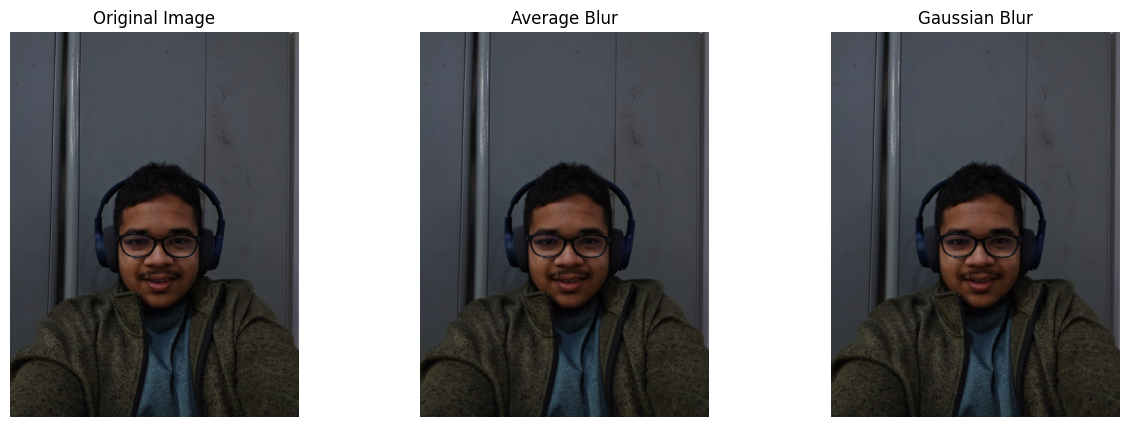

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(np.clip(img_rgb, 0, 255).astype(np.uint8))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(np.clip(avg_rgb, 0, 255).astype(np.uint8))
plt.title("Average Blur")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(np.clip(gauss_rgb, 0, 255).astype(np.uint8))
plt.title("Gaussian Blur")
plt.axis("off")

plt.show()


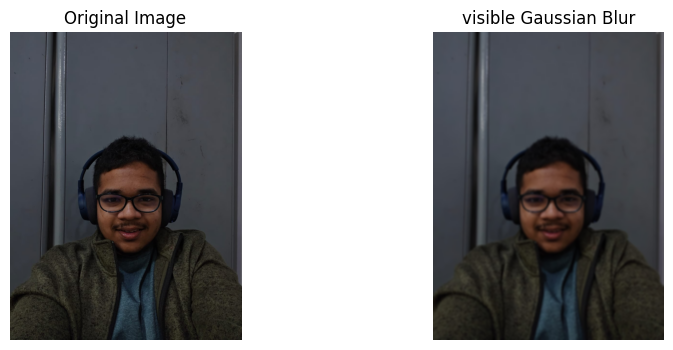

In [ ]:
ksize = 14
sigma = 4.0

gauss_rgb = gaussian_blur_rgb(img_rgb, ksize, sigma)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(np.clip(img_rgb, 0, 255).astype(np.uint8))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(np.clip(gauss_rgb, 0, 255).astype(np.uint8))
plt.title("visible Gaussian Blur")
plt.axis("off")

plt.show()


### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compu1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

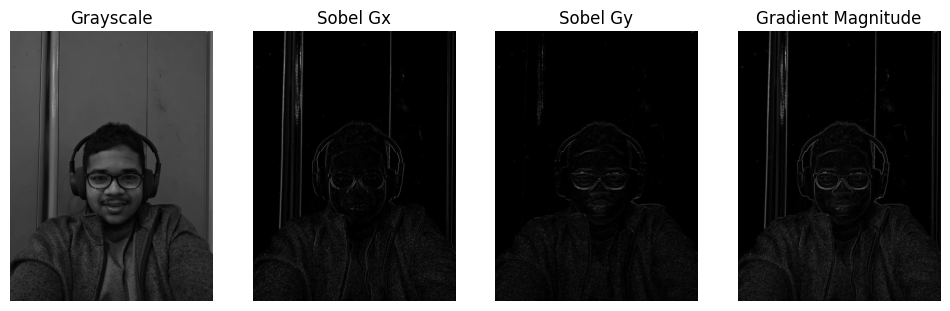

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img_gray = np.mean(img_rgb, axis=2).astype(np.float32)
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)
Gx = convolve(img_gray, sobel_x)
Gy = convolve(img_gray, sobel_y)
gradient_magnitude = np.sqrt(Gx**2 + Gy**2)


max_val = gradient_magnitude.max()
if max_val != 0:
    grad_norm = (gradient_magnitude / max_val) * 255
else:
    grad_norm = gradient_magnitude

grad_norm = grad_norm.astype(np.uint8)

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(np.abs(Gx), cmap='gray')
plt.title("Sobel Gx")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(np.abs(Gy), cmap='gray')
plt.title("Sobel Gy")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(grad_norm, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis('off')

plt.show()


### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [ ]:
import numpy as np
import cv2
img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY).astype(np.float64)
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]], dtype=np.float64)

def convolve(img, kernel):
    iH, iW = img.shape
    kH, kW = kernel.shape
    pad_h, pad_w = kH // 2, kW // 2
    padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')
    output = np.zeros_like(img, dtype=np.float64)
    for y in range(iH):
        for x in range(iW):
            region = padded[y:y+kH, x:x+kW]
            output[y, x] = np.sum(region * kernel)
    return output

lap = convolve(img, laplacian_kernel)
alpha = 1.0
sharp_numpy = np.clip(img - alpha * lap, 0, 255).astype(np.uint8)

lap_cv = cv2.filter2D(img, ddepth=cv2.CV_64F, kernel=laplacian_kernel)
sharp_cv = np.clip(img - lap_cv, 0, 255).astype(np.uint8)

are_equal = np.array_equal(sharp_numpy, sharp_cv)
max_diff = np.max(np.abs(sharp_numpy.astype(int) - sharp_cv.astype(int)))

print(are_equal)
print(max_diff)


True
0


### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

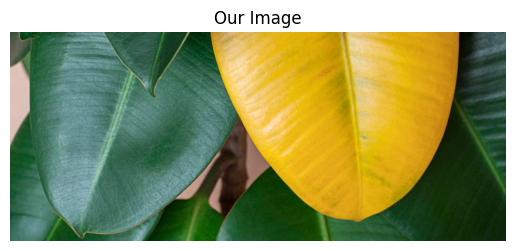

In [ ]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
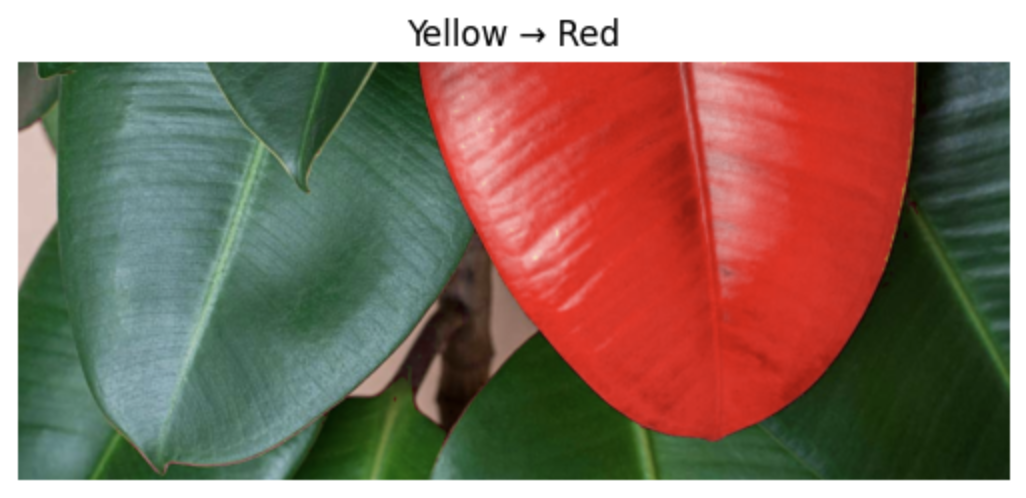

Also, we can change to a less brighter colour
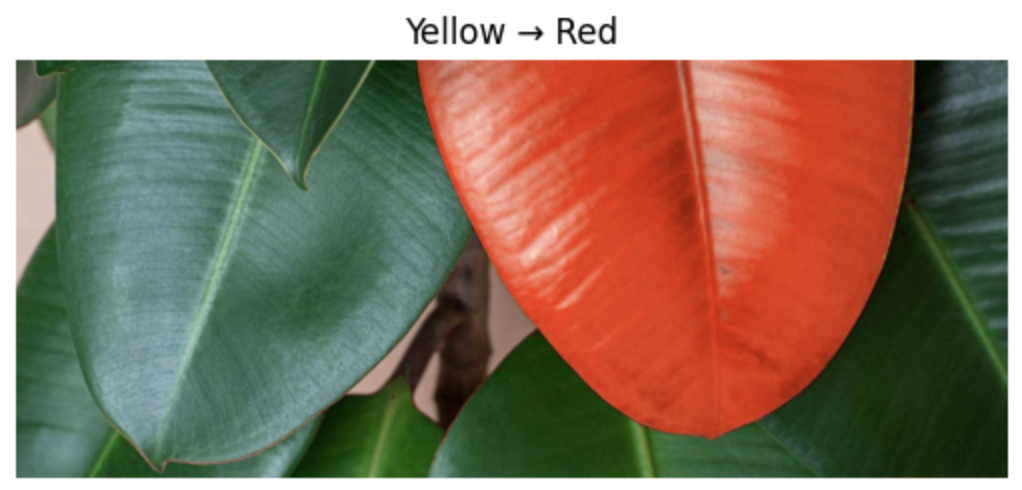

In [ ]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.